## Librerías

In [ ]:
!pip install statsmodels

In [ ]:
# Manejo de dataframes
import pandas as pd

# Manejo de vectores y matrices
import numpy as np

# Gráficas - EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modelamiento enfocado en predicción
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# Regresion Lineal
from scipy.stats import randint as sp_randint
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


## Carga de Datos

In [ ]:
# Monta el drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Datos de 2020 al 2024

In [ ]:
# Extrayendo los datos de 2020 al 2024
file_names = ['2020gas.csv', '2021gas.csv', '2022gas.csv', '2023gas.csv', '2024gas.csv']
path = '/content/drive/MyDrive/Colab Notebooks/0.TFM_VIU/datos'
dfs = []

for file_name in file_names:
    file_path = f"{path}/{file_name}"
    encoding_options = ['utf-8', 'latin-1', 'ISO-8859-1', 'cp1252', 'utf-16']
    for encoding in encoding_options:
        try:
            df = pd.read_csv(file_path, encoding=encoding, sep=",")
            dfs.append(df)
            print(f"Archivo '{file_name}' leído con codificación '{encoding}'.")
            break
        except Exception as e:
            print(f"Error al leer archivo '{file_name}' con codificación '{encoding}': {e}")

df1 = pd.concat(dfs, ignore_index=True)
df1.head(5)


Archivo '2020gas.csv' leído con codificación 'utf-8'.
Archivo '2021gas.csv' leído con codificación 'utf-8'.
Archivo '2022gas.csv' leído con codificación 'utf-8'.
Error al leer archivo '2023gas.csv' con codificación 'utf-8': 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte
Archivo '2023gas.csv' leído con codificación 'latin-1'.
Archivo '2024gas.csv' leído con codificación 'utf-8'.


Model year   Make              Model                 Vehicle class  \
0        2020  Acura                ILX                       Compact   
1        2020  Acura         MDX SH-AWD  Sport utility vehicle: Small   
2        2020  Acura  MDX SH-AWD A-SPEC  Sport utility vehicle: Small   
3        2020  Acura     MDX Hybrid AWD  Sport utility vehicle: Small   
4        2020  Acura                NSX                    Two-seater   

   Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0              2.4          4          AM8         Z              9.9   
1              3.5          6          AS9         Z             12.3   
2              3.5          6          AS9         Z             12.2   
3              3.0          6          AM7         Z              9.1   
4              3.5          6          AM9         Z             11.1   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 7.0                  8.6              33   
1                 9.2                 10.9              26   
2                 9.5                 11.0              26   
3                 9.0                  9.0              31   
4                10.8                 11.0              26   

   CO2 emissions (g/km)  CO2 rating  Smog rating  _id  
0                   199           6            3  NaN  
1                   254           4            3  NaN  
2                   258           4            3  NaN  
3                   210           5            3  NaN  
4                   261           4            3  NaN

In [ ]:
# Tamaño inicial
df1.shape

(4499, 16)

In [ ]:
# Elimina _id en df1
df1 = df1.drop('_id', axis=1)

In [ ]:
# Mostrando los datos
df1.head(5)

Model year   Make              Model                 Vehicle class  \
0        2020  Acura                ILX                       Compact   
1        2020  Acura         MDX SH-AWD  Sport utility vehicle: Small   
2        2020  Acura  MDX SH-AWD A-SPEC  Sport utility vehicle: Small   
3        2020  Acura     MDX Hybrid AWD  Sport utility vehicle: Small   
4        2020  Acura                NSX                    Two-seater   

   Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0              2.4          4          AM8         Z              9.9   
1              3.5          6          AS9         Z             12.3   
2              3.5          6          AS9         Z             12.2   
3              3.0          6          AM7         Z              9.1   
4              3.5          6          AM9         Z             11.1   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 7.0                  8.6              33   
1                 9.2                 10.9              26   
2                 9.5                 11.0              26   
3                 9.0                  9.0              31   
4                10.8                 11.0              26   

   CO2 emissions (g/km)  CO2 rating  Smog rating  
0                   199           6            3  
1                   254           4            3  
2                   258           4            3  
3                   210           5            3  
4                   261           4            3

In [ ]:
# Tamaño del dataset
df1.shape

(4499, 15)

### Datos del 2015 al 2019

In [ ]:
# Exrayendo los datos del 2015 al 2019
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0.TFM_VIU/datos/2015_2019gas.csv', encoding="utf-8", sep=",")
df2.head(5)

Model year   Make       Model                 Vehicle class  \
0        2015  Acura         ILX                       Compact   
1        2015  Acura         ILX                       Compact   
2        2015  Acura  ILX Hybrid                       Compact   
3        2015  Acura  MDX SH-AWD  Sport utility vehicle: Small   
4        2015  Acura     RDX AWD  Sport utility vehicle: Small   

   Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0              2.0          4          AS5         Z              9.7   
1              2.4          4           M6         Z             10.8   
2              1.5          4          AV7         Z              6.0   
3              3.5          6          AS6         Z             12.7   
4              3.5          6          AS6         Z             12.1   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 6.7                  8.3              34   
1                 7.4                  9.3              30   
2                 6.1                  6.1              46   
3                 9.1                 11.1              25   
4                 8.7                 10.6              27   

   CO2 emissions (g/km)  CO2 rating  Smog rating  
0                   191         NaN          NaN  
1                   214         NaN          NaN  
2                   140         NaN          NaN  
3                   255         NaN          NaN  
4                   244         NaN          NaN

In [ ]:
# Tamaño del dataset
df2.shape

(5431, 15)

### Unificando datos de 2015 al 2024

In [ ]:
# Se une los dataframes df1, df2 en uno solo
df_combined = pd.concat([df2, df1], ignore_index=True)
df_combined.head(5)

Model year   Make       Model                 Vehicle class  \
0        2015  Acura         ILX                       Compact   
1        2015  Acura         ILX                       Compact   
2        2015  Acura  ILX Hybrid                       Compact   
3        2015  Acura  MDX SH-AWD  Sport utility vehicle: Small   
4        2015  Acura     RDX AWD  Sport utility vehicle: Small   

   Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0              2.0          4          AS5         Z              9.7   
1              2.4          4           M6         Z             10.8   
2              1.5          4          AV7         Z              6.0   
3              3.5          6          AS6         Z             12.7   
4              3.5          6          AS6         Z             12.1   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 6.7                  8.3              34   
1                 7.4                  9.3              30   
2                 6.1                  6.1              46   
3                 9.1                 11.1              25   
4                 8.7                 10.6              27   

   CO2 emissions (g/km)  CO2 rating  Smog rating  
0                   191         NaN          NaN  
1                   214         NaN          NaN  
2                   140         NaN          NaN  
3                   255         NaN          NaN  
4                   244         NaN          NaN

### Exploración de datos unificados

In [ ]:
# Copia de df_combined
df = df_combined.copy()
df.head()

Model year   Make       Model                 Vehicle class  \
0        2015  Acura         ILX                       Compact   
1        2015  Acura         ILX                       Compact   
2        2015  Acura  ILX Hybrid                       Compact   
3        2015  Acura  MDX SH-AWD  Sport utility vehicle: Small   
4        2015  Acura     RDX AWD  Sport utility vehicle: Small   

   Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0              2.0          4          AS5         Z              9.7   
1              2.4          4           M6         Z             10.8   
2              1.5          4          AV7         Z              6.0   
3              3.5          6          AS6         Z             12.7   
4              3.5          6          AS6         Z             12.1   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 6.7                  8.3              34   
1                 7.4                  9.3              30   
2                 6.1                  6.1              46   
3                 9.1                 11.1              25   
4                 8.7                 10.6              27   

   CO2 emissions (g/km)  CO2 rating  Smog rating  
0                   191         NaN          NaN  
1                   214         NaN          NaN  
2                   140         NaN          NaN  
3                   255         NaN          NaN  
4                   244         NaN          NaN

In [ ]:
# Tamaño de df unificado del 2015 al 2024
df.shape


(9930, 15)

In [ ]:
# Información de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            9930 non-null   int64  
 1   Make                  9930 non-null   object 
 2   Model                 9930 non-null   object 
 3   Vehicle class         9930 non-null   object 
 4   Engine size (L)       9930 non-null   float64
 5   Cylinders             9930 non-null   int64  
 6   Transmission          9930 non-null   object 
 7   Fuel type             9930 non-null   object 
 8   City (L/100 km)       9930 non-null   float64
 9   Highway (L/100 km)    9930 non-null   float64
 10  Combined (L/100 km)   9930 non-null   float64
 11  Combined (mpg)        9930 non-null   int64  
 12  CO2 emissions (g/km)  9930 non-null   int64  
 13  CO2 rating            8802 non-null   float64
 14  Smog rating           7696 non-null   float64
dtypes: float64(6), int64(

In [ ]:
# Estadística descriptiva
df.describe()

Model year  Engine size (L)    Cylinders  City (L/100 km)  \
count  9930.000000      9930.000000  9930.000000      9930.000000   
mean   2019.188419         3.142618     5.612588        12.462810   
std       2.812796         1.344643     1.880845         3.409926   
min    2015.000000         0.900000     3.000000         4.000000   
25%    2017.000000         2.000000     4.000000        10.100000   
50%    2019.000000         3.000000     6.000000        12.100000   
75%    2022.000000         3.700000     6.000000        14.500000   
max    2024.000000         8.400000    16.000000        30.600000   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
count         9930.000000          9930.000000     9930.000000   
mean             9.125488            10.960745       27.492447   
std              2.182170             2.813145        7.340762   
min              3.900000             4.000000       11.000000   
25%              7.600000             9.000000       22.000000   
50%              8.800000            10.600000       27.000000   
75%             10.300000            12.600000       31.000000   
max             20.900000            26.100000       71.000000   

       CO2 emissions (g/km)   CO2 rating  Smog rating  
count           9930.000000  8802.000000  7696.000000  
mean             253.274924     4.628266     4.821985  
std               60.584273     1.581469     1.785805  
min               94.000000     1.000000     1.000000  
25%              209.000000     4.000000     3.000000  
50%              249.000000     5.000000     5.000000  
75%              292.000000     6.000000     6.000000  
max              608.000000    10.000000     8.000000

## Prepocesamiento de los datos

### Limpieza de nulos

In [ ]:
# Se retira las columnas del df CO2 rating, Smog rating  porque son también variables objetivos
df = df.drop(['CO2 rating', 'Smog rating'], axis=1)

In [ ]:
# Información actualizada del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            9930 non-null   int64  
 1   Make                  9930 non-null   object 
 2   Model                 9930 non-null   object 
 3   Vehicle class         9930 non-null   object 
 4   Engine size (L)       9930 non-null   float64
 5   Cylinders             9930 non-null   int64  
 6   Transmission          9930 non-null   object 
 7   Fuel type             9930 non-null   object 
 8   City (L/100 km)       9930 non-null   float64
 9   Highway (L/100 km)    9930 non-null   float64
 10  Combined (L/100 km)   9930 non-null   float64
 11  Combined (mpg)        9930 non-null   int64  
 12  CO2 emissions (g/km)  9930 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 1008.6+ KB


In [ ]:
# Se verifica los nulos
df.isnull().sum()

Model year              0
Make                    0
Model                   0
Vehicle class           0
Engine size (L)         0
Cylinders               0
Transmission            0
Fuel type               0
City (L/100 km)         0
Highway (L/100 km)      0
Combined (L/100 km)     0
Combined (mpg)          0
CO2 emissions (g/km)    0
dtype: int64

### Limpieza de duplicados

In [ ]:
# Se verifica si hay registros duplicados
duplicated_filas = df.duplicated().sum()

# Imprimiendo filas duplicadas
print("Filas duplicadas:", duplicated_filas)

Filas duplicadas: 0


In [ ]:
# Transponiendo el DataFrame
transposed_df = df.T

# Verificando y encontrando columnas duplicadas
duplicated_columns = transposed_df[transposed_df.duplicated()].index.tolist()

# Imprimiendo columnas duplicadas
print("Columnas duplicadas:", duplicated_columns)

Columnas duplicadas: []


### Limpieza de Outliers

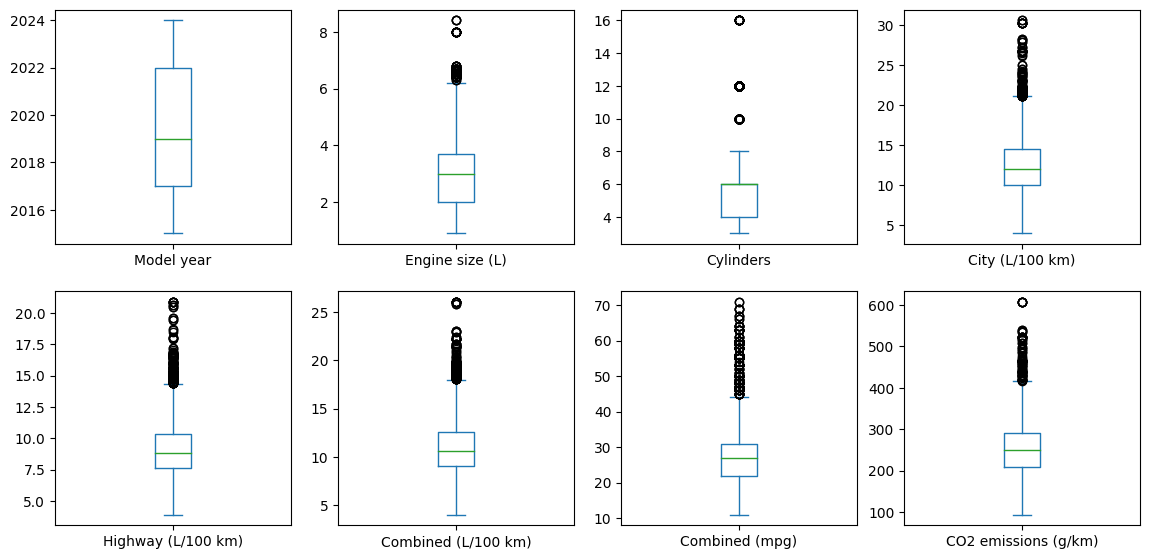

In [ ]:
# Diagrana boxplot para visualizar los Outliers
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

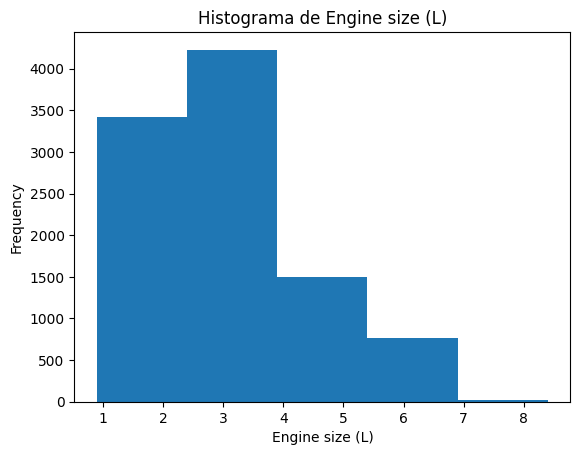

In [ ]:
# Histograma de frecuencia basado en la variable Engine size (L)
plt.hist(df['Engine size (L)'], bins=5)
plt.xlabel('Engine size (L)')
plt.ylabel('Frequency')
plt.title('Histograma de Engine size (L)')
plt.show()

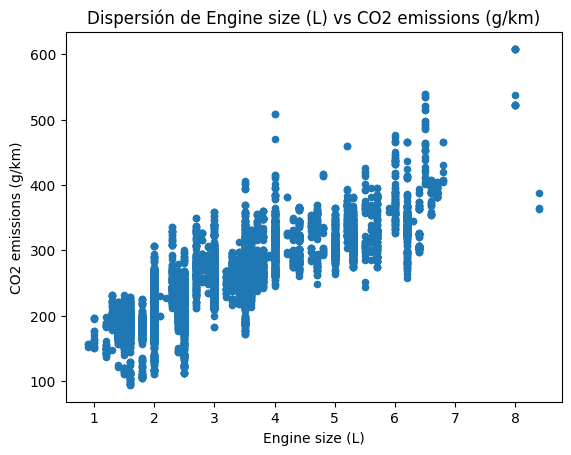

In [ ]:
# Gráfico de dispersión entre  Engine size (L)  y CO2 emissions (g/km)
df.plot.scatter(x='Engine size (L)', y='CO2 emissions (g/km)')
plt.title('Dispersión de Engine size (L) vs CO2 emissions (g/km)')
plt.show()

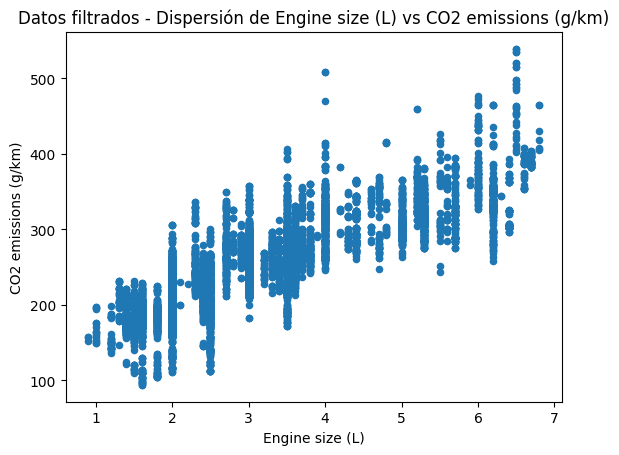

In [ ]:
# Filtrado de df en el campo Engine size (L) que sea menor o igual a 7
df_filtrado = df[df['Engine size (L)'] <= 7]

# Diagrama de dispersión entre  Engine size (L)  y CO2 emissions (g/km)
df_filtrado.plot.scatter(x='Engine size (L)', y='CO2 emissions (g/km)')
plt.title('Datos filtrados - Dispersión de Engine size (L) vs CO2 emissions (g/km)')
plt.show()

In [ ]:
# Tamaño de dataframe
df_filtrado.shape

(9914, 13)

In [ ]:
# ----- Función para rastreo del mejor percentil superior para ajuste de outliers superiores
def HallaMejorPercentilSup(micol,  maximo, minimo, miCotaSup, dataframeA):
	for x in range(maximo, minimo, -1):
		valor_tope_actual = np.quantile(dataframeA.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round_(valor_tope_actual,micol)},col = {micol}, CotaSup = {miCotaSup}")
		if(valor_tope_actual <= miCotaSup):
			return x , valor_tope_actual

In [ ]:
# Proceso de corrección de Outlier Superior
columnas =  [5, 8, 9, 10, 11]
for col in columnas:
  q3=np.quantile(df_filtrado.iloc[ : , col] , 0.75)
  q1=np.quantile(df_filtrado.iloc[ : , col] , 0.25)
  IQR=q3-q1
  CotaSup=q3+1.5*IQR
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, df_filtrado)
  df_filtrado.iloc[ : , col] = np.where(df_filtrado.iloc[ : , col] > ValorTecho, ValorTecho, df_filtrado.iloc[ : , col] )


Percentil 99 = 12.0,col = 5, CotaSup = 9.0
Percentil 98 = 12.0,col = 5, CotaSup = 9.0
Percentil 97 = 8.0,col = 5, CotaSup = 9.0
Percentil 99 = 21.7,col = 8, CotaSup = 21.1
Percentil 98 = 20.5,col = 8, CotaSup = 21.1
Percentil 99 = 15.3,col = 9, CotaSup = 14.350000000000001
Percentil 98 = 14.3,col = 9, CotaSup = 14.350000000000001
Percentil 99 = 18.974,col = 10, CotaSup = 18.0
Percentil 98 = 17.7,col = 10, CotaSup = 18.0
Percentil 99 = 53.0,col = 11, CotaSup = 44.5
Percentil 98 = 46.0,col = 11, CotaSup = 44.5
Percentil 97 = 42.0,col = 11, CotaSup = 44.5


<ipython-input-27-3457d4385edc>:8: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, df_filtrado)


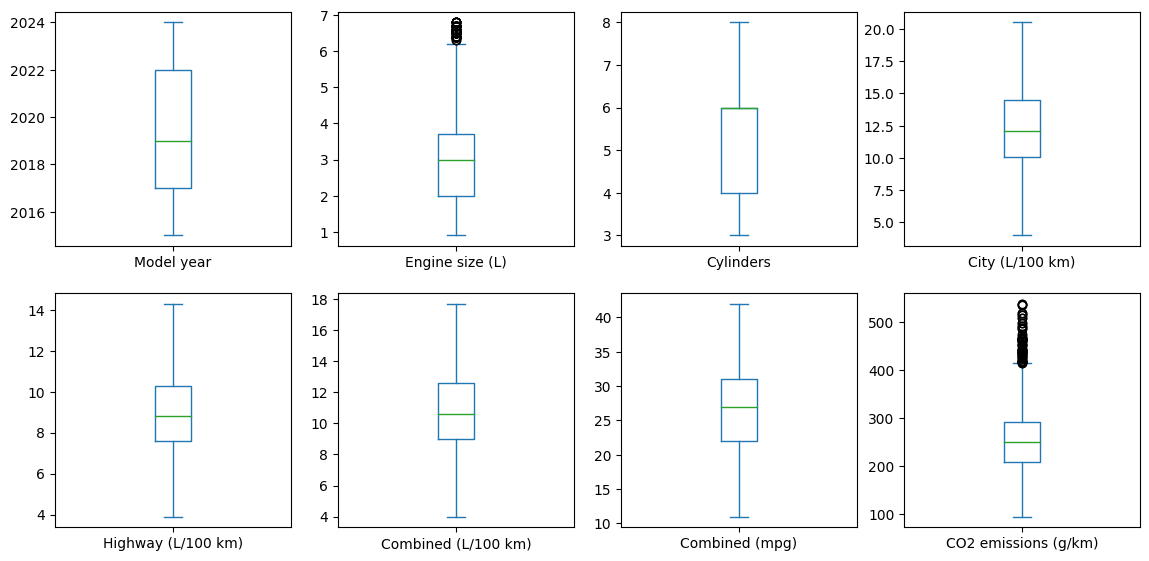

In [ ]:
# Boxplot - Verificando que ya no hay outliers en las variables numéricas explicativas
df_filtrado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

### Exploración de datos

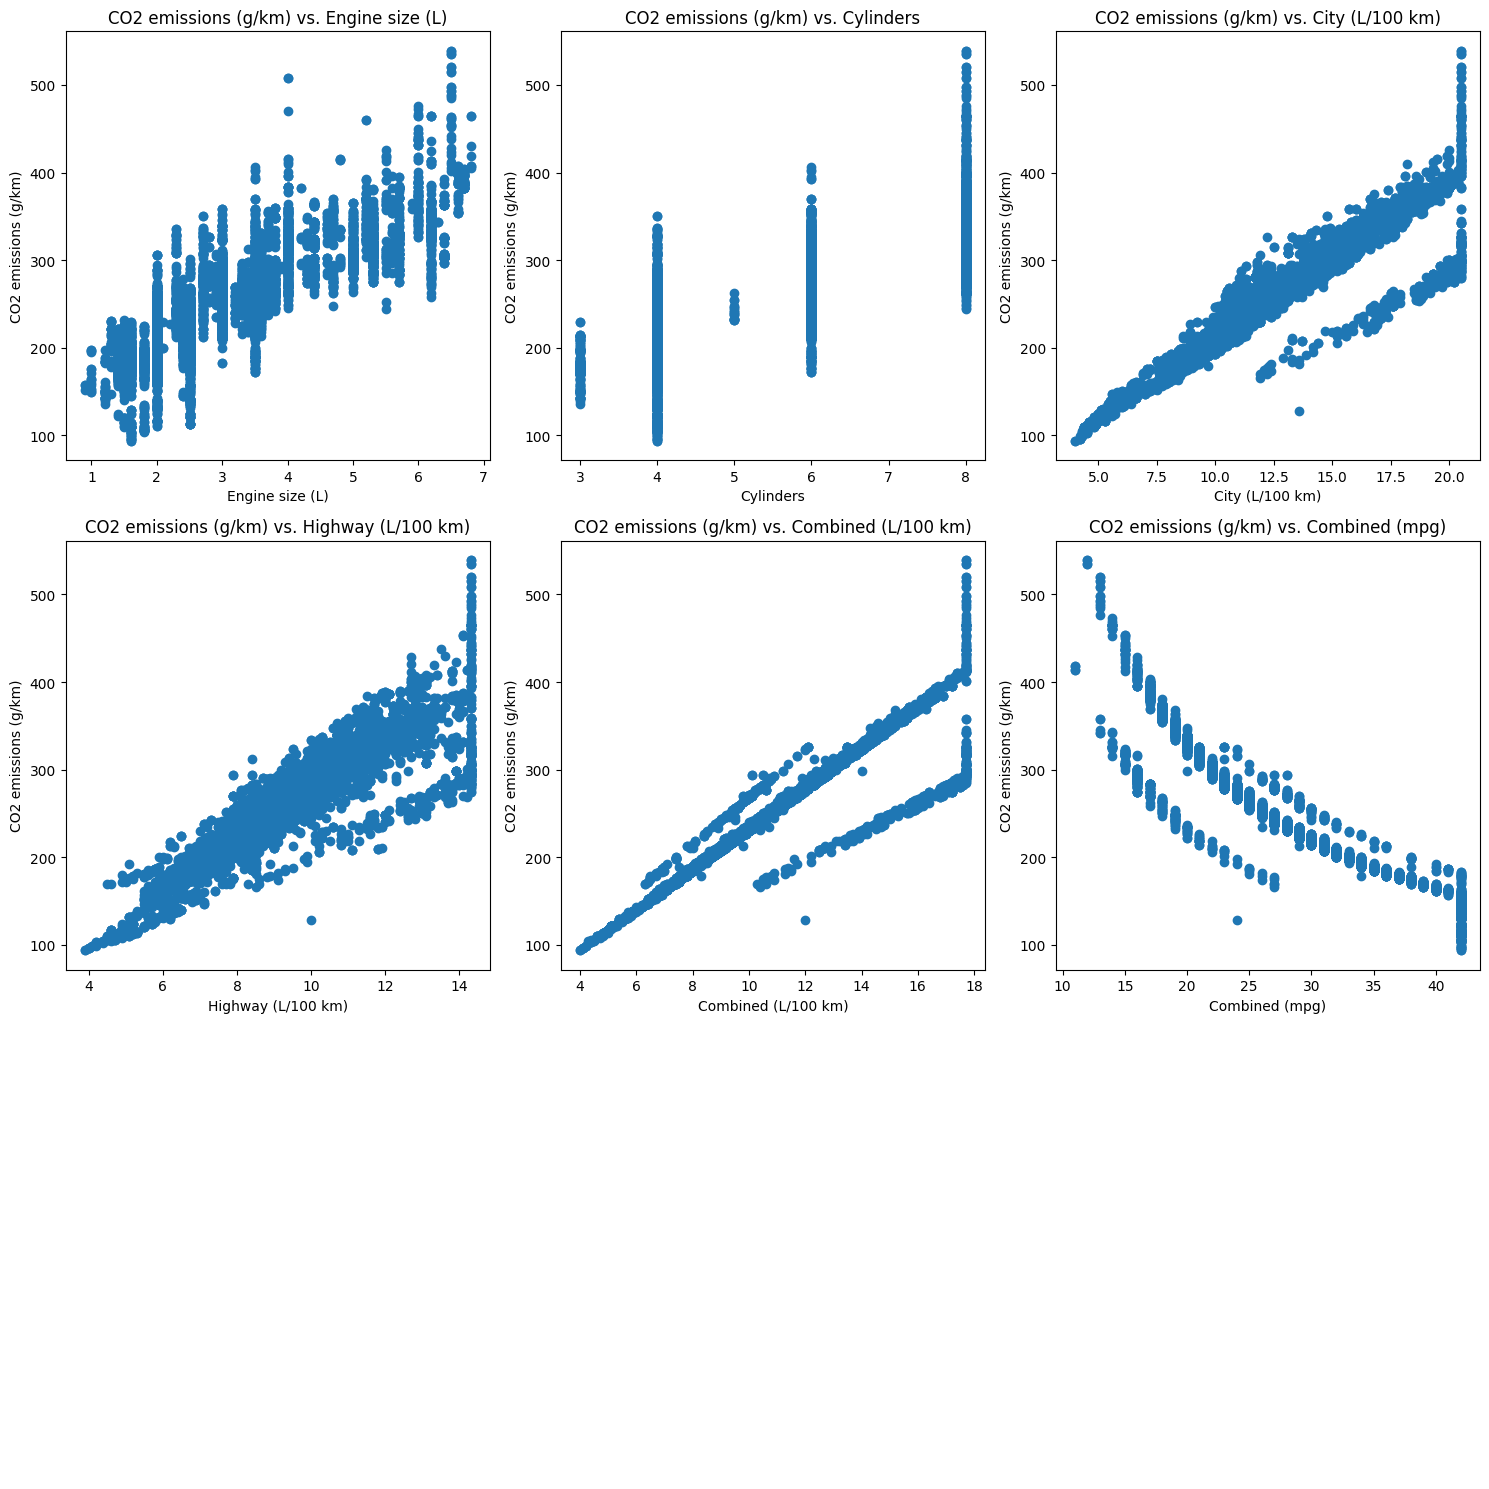

In [ ]:
# Crea una lista de las columnas para x-axis
x_columns = ['Engine size (L)', 'Cylinders', 'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)']

# Configura subgráficos con layout (3, 3)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Contador para recorrer los subgráficos
contador = 0

# Recorre cada columna para crear los gráficos de dispersión correspondientes
for i in range(3):
    for j in range(3):
        if contador < len(x_columns):
            # Crear un gráfico de dispersión para la columna actual
            axs[i, j].scatter(df_filtrado[x_columns[contador]], df_filtrado['CO2 emissions (g/km)'])
            axs[i, j].set_xlabel(x_columns[contador])
            axs[i, j].set_ylabel('CO2 emissions (g/km)')
            axs[i, j].set_title(f'CO2 emissions (g/km) vs. {x_columns[contador]}')
            contador += 1
        else:
            # Si se han mostrado todos los gráficos, ocultar el subgráfico
            axs[i, j].axis('off')

# Ajusta el espaciado entre subgráficos
plt.tight_layout()

# Muestra la figura con subgráficos
plt.show()

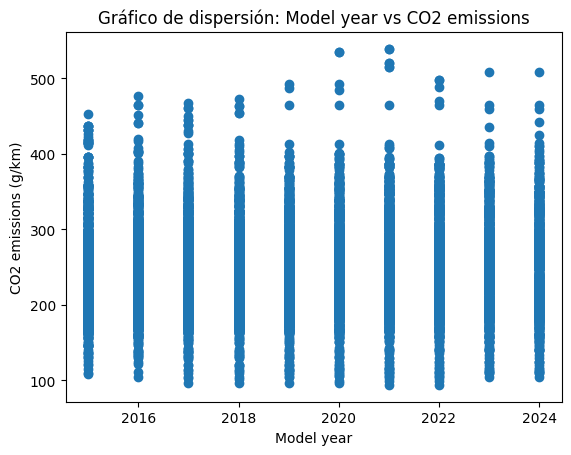

In [ ]:
# Gráfico de dispersion entre df_filtrado['Model year'] y df_filtrado['CO2 emissions']
plt.scatter(df_filtrado['Model year'], df_filtrado['CO2 emissions (g/km)'])
plt.xlabel('Model year')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Gráfico de dispersión: Model year vs CO2 emissions')
plt.show()

In [ ]:
# Conclusiones:
# Se observa que en general, las emisiones de CO2 tienden a disminuir a lo largo de los años. Esto es esperable ya que la industria automotriz ha implementado tecnologías y medidas para reducir las emisiones de los vehículos.
# Sin embargo, la relación no es perfecta y existen algunos puntos que se alejan de la tendencia general. Estos puntos podrían ser vehículos más antiguos que siguen en circulación o modelos con características especiales que generan mayores emisiones.
# Es importante tener en cuenta que la tecnología de los vehículos ha evolucionado a lo largo del tiempo y que la disminución de las emisiones no es lineal.
# Se puede explorar más a fondo la relación entre estas variables utilizando técnicas de regresión para modelar la tendencia y analizar la influencia de otras variables en las emisiones de CO2.

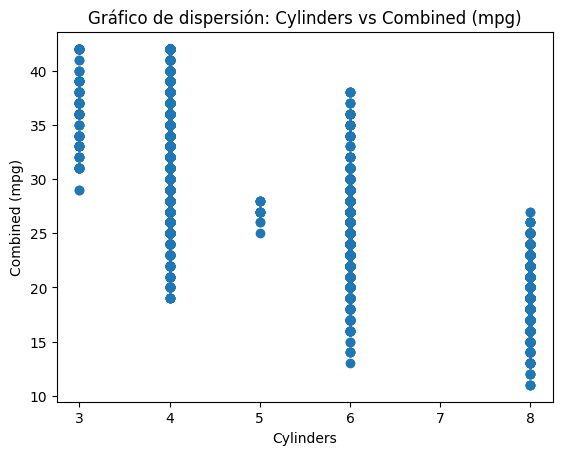

In [ ]:
# Gráfica de dispersion de df_filtrado entre la columna 'Cylinders' y 'Combined (mpg)'
plt.scatter(df_filtrado['Cylinders'], df_filtrado['Combined (mpg)'])
plt.xlabel('Cylinders')
plt.ylabel('Combined (mpg)')
plt.title('Gráfico de dispersión: Cylinders vs Combined (mpg)')
plt.show()

In [ ]:
# Conclusiones:
# Se observa una tendencia negativa entre el número de cilindros y el consumo de combustible combinado (mpg).
# Esto sugiere que a medida que aumenta el número de cilindros, el consumo de combustible tiende a disminuir.
# Esto es correcto ya que los motores con más cilindros generalmente tienen mayor desplazamiento y potencia, lo que puede resultar en un mayor consumo de combustible.
# Sin embargo, la relación no es perfecta y existen algunos puntos que se alejan de la tendencia general.
# Esto puede deberse a otros factores que influyen en el consumo de combustible, como el tamaño del vehículo, el peso, la aerodinámica, etc.
# Se puede explorar más a fondo la relación entre estas variables utilizando técnicas de regresión para modelar la tendencia y analizar la influencia de otras variables en el consumo de combustible.

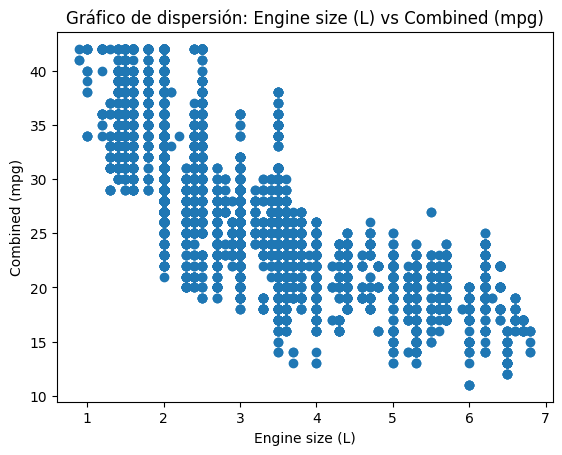

In [ ]:
# Gráfica de dispersion de df_filtrado entre la columna 'Engine size (L)' y 'Combined (mpg)'
plt.scatter(df_filtrado['Engine size (L)'], df_filtrado['Combined (mpg)'])
plt.xlabel('Engine size (L)')
plt.ylabel('Combined (mpg)')
plt.title('Gráfico de dispersión: Engine size (L) vs Combined (mpg)')
plt.show()

In [ ]:
# Conclusiones:
# Se observa una tendencia negativa entre el tamaño del motor (L) y el consumo de combustible combinado (mpg).
# Esto sugiere que a medida que aumenta el tamaño del motor, el consumo de combustible tiende a disminuir.
# Esto es correcto ya que los motores con mayor tamaño generalmente tienen mayor desplazamiento y potencia, lo que puede resultar en un mayor consumo de combustible.
# Sin embargo, la relación no es perfecta y existen algunos puntos que se alejan de la tendencia general.
# Esto puede deberse a otros factores que influyen en el consumo de combustible, como el número de cilindros, el peso del vehículo, la aerodinámica, etc.
# Se puede explorar más a fondo la relación entre estas variables utilizando técnicas de regresión para modelar la tendencia y analizar la influencia de otras variables en el consumo de combustible.

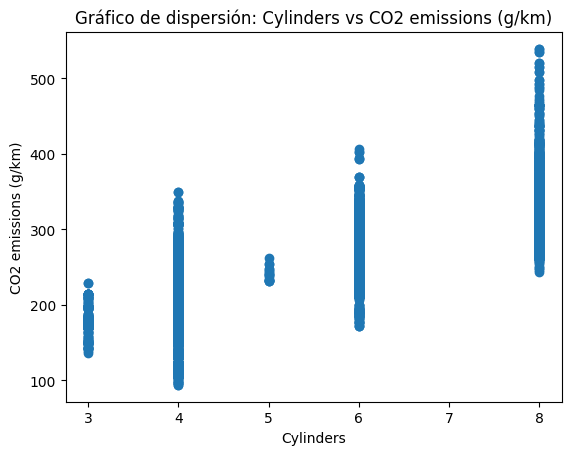

In [ ]:
# Gráfica de dispersión entre 'Cylinders' y 'CO2 emissions (g/km)'
plt.scatter(df_filtrado['Cylinders'], df_filtrado['CO2 emissions (g/km)'])
plt.xlabel('Cylinders')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Gráfico de dispersión: Cylinders vs CO2 emissions (g/km)')
plt.show()

In [ ]:
# Conclusiones:
# Se observa una tendencia positiva entre el número de cilindros y las emisiones de CO2.
# Esto sugiere que a medida que aumenta el número de cilindros, las emisiones de CO2 tienden a aumentar.
# Esto es correcto ya que los motores con más cilindros generalmente tienen mayor desplazamiento y potencia, lo que puede resultar en mayores emisiones de CO2.
# Sin embargo, la relación no es perfecta y existen algunos puntos que se alejan de la tendencia general.
# Esto puede deberse a otros factores que influyen en las emisiones de CO2, como el tamaño del motor, el tipo de combustible, la tecnología del motor, etc.



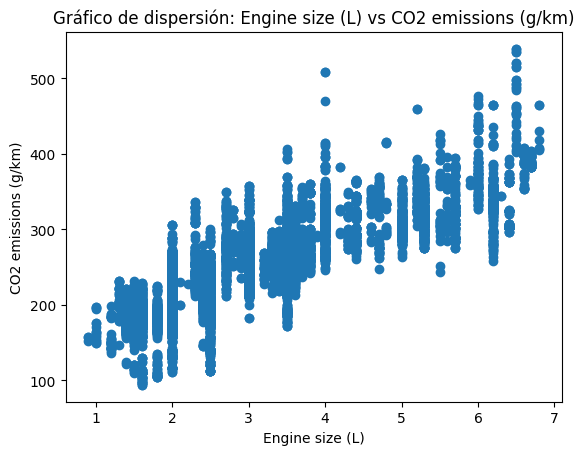

In [ ]:
# Gráfica de dispersión entre 'Engine size (L)' y 'CO2 emissions (g/km)'
plt.scatter(df_filtrado['Engine size (L)'], df_filtrado['CO2 emissions (g/km)'])
plt.xlabel('Engine size (L)')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Gráfico de dispersión: Engine size (L) vs CO2 emissions (g/km)')
plt.show()

In [ ]:
# Conclusiones:
# Se observa una tendencia positiva entre el tamaño del motor (L) y las emisiones de CO2.
# Esto sugiere que a medida que aumenta el tamaño del motor, las emisiones de CO2 tienden a aumentar.
# Esto es correcto ya que los motores con mayor tamaño generalmente tienen mayor desplazamiento y potencia, lo que puede resultar en mayores emisiones de CO2.
# Sin embargo, la relación no es perfecta y existen algunos puntos que se alejan de la tendencia general.
# Esto puede deberse a otros factores que influyen en las emisiones de CO2, como el número de cilindros, el tipo de combustible, la tecnología del motor, etc.



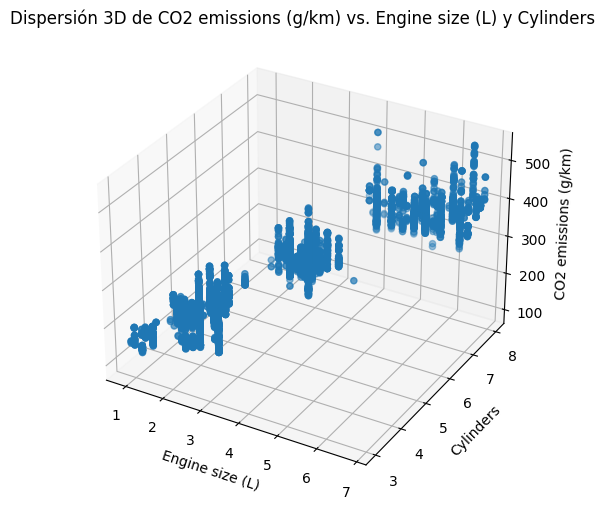

In [ ]:
# Gráfica de dispersión 3D entre 'Engine size (L)', 'Cylinders' y 'CO2 emissions (g/km)'
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_filtrado['Engine size (L)'], df_filtrado['Cylinders'], df_filtrado['CO2 emissions (g/km)'])

ax.set_xlabel('Engine size (L)')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 emissions (g/km)')
ax.set_title('Dispersión 3D de CO2 emissions (g/km) vs. Engine size (L) y Cylinders')

plt.show()

In [ ]:
# Conclusiones:
# 1. Existe una relación positiva entre el tamaño del motor ('Engine size (L)') y las emisiones de CO2 ('CO2 emissions (g/km)').
#    A mayor tamaño de motor, mayores emisiones de CO2.
# 2. También existe una relación positiva entre la cantidad de cilindros ('Cylinders') y las emisiones de CO2 ('CO2 emissions (g/km)').
#    A mayor número de cilindros, mayores emisiones de CO2.
# 3. La gráfica 3D nos permite visualizar la interacción entre el tamaño del motor y la cantidad de cilindros en relación con las emisiones de CO2.
#    Se observa que los vehículos con motores más grandes y más cilindros tienden a tener mayores emisiones de CO2.
# 4. Esta relación puede ser útil para predecir las emisiones de CO2 de un vehículo en función de su tamaño de motor y la cantidad de cilindros.

<ipython-input-42-4c54e43dc50e>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('coolwarm', len(years))


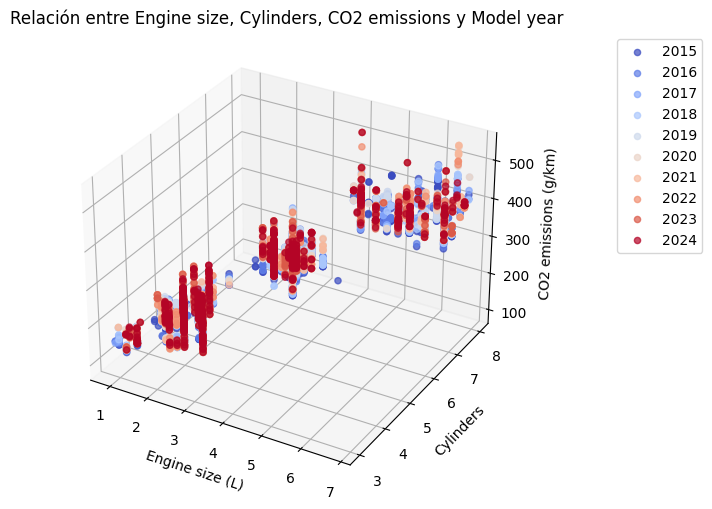

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos de Model year
years = df_filtrado['Model year'].unique()

# Crear una paleta de colores para cada año
colors = plt.cm.get_cmap('coolwarm', len(years))

# Iterar sobre los años y crear un gráfico de dispersión para cada uno
for i, year in enumerate(years):
    df_year = df_filtrado[df_filtrado['Model year'] == year]
    ax.scatter(df_year['Engine size (L)'], df_year['Cylinders'], df_year['CO2 emissions (g/km)'],
               c=[colors(i)], label=year, alpha=0.7)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Engine size (L)')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 emissions (g/km)')
ax.set_title('Relación entre Engine size, Cylinders, CO2 emissions y Model year')

# Agregar la leyenda
ax.legend()

# Agregar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')

# Mostrar la gráfica
plt.show()


In [ ]:
# Conclusiones:
# 1. Se observa una tendencia general a que los vehículos con motores más grandes y más cilindros tienen mayores emisiones de CO2.
# 2. La dispersión de los puntos en el gráfico muestra que la relación entre las variables no es lineal perfecta, pero sí existe una correlación.
# 3. La coloración por año permite identificar si existe una tendencia en el tiempo en las emisiones de CO2.
# 4. Si se observa una tendencia a que los puntos se mueven hacia abajo en el eje de emisiones de CO2 a lo largo del tiempo, se puede concluir que la eficiencia de los vehículos ha mejorado en cuanto a la reducción de emisiones.
# 5. Es importante tener en cuenta que el gráfico solo muestra una relación entre las variables, no causalidad.



<ipython-input-44-5e6037ba5ff2>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(vehicle_classes))


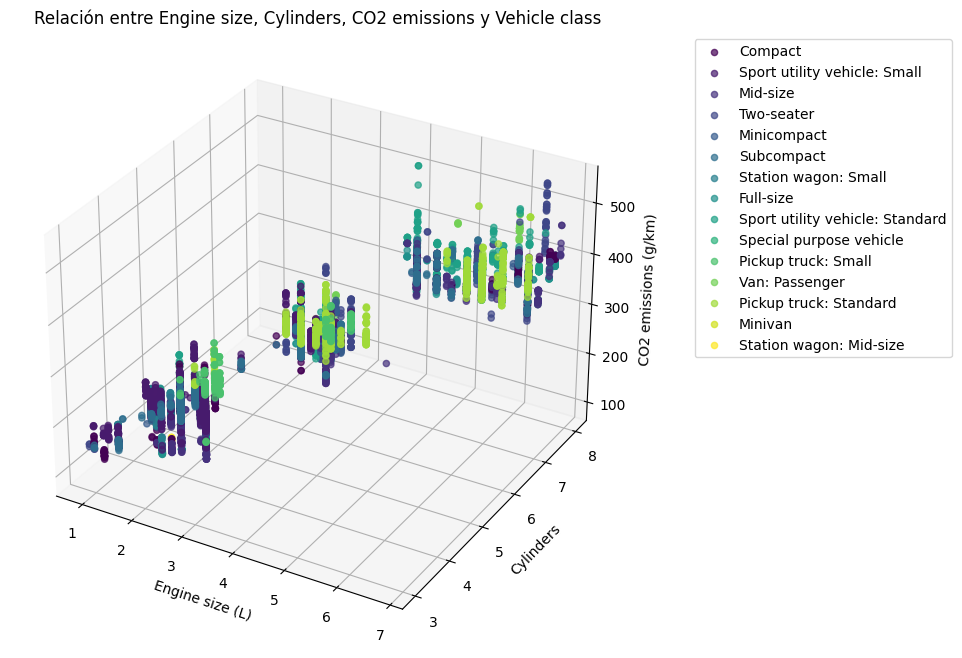

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos de Vehicle class
vehicle_classes = df_filtrado['Vehicle class'].unique()

# Crear una paleta de colores para cada clase de vehículo
colors = plt.cm.get_cmap('viridis', len(vehicle_classes))

# Iterar sobre las clases de vehículo y crear un gráfico de dispersión para cada una
for i, vehicle_class in enumerate(vehicle_classes):
    df_class = df_filtrado[df_filtrado['Vehicle class'] == vehicle_class]
    ax.scatter(df_class['Engine size (L)'], df_class['Cylinders'], df_class['CO2 emissions (g/km)'],
               c=[colors(i)], label=vehicle_class, alpha=0.7)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Engine size (L)')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 emissions (g/km)')
ax.set_title('Relación entre Engine size, Cylinders, CO2 emissions y Vehicle class')

# Agregar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

# Mostrar la gráfica
plt.show()


In [ ]:
# Conclusiones:
# 1. Se observa una tendencia general a que los vehículos con motores más grandes y más cilindros tienen mayores emisiones de CO2.
# 2. La dispersión de los puntos en el gráfico muestra que la relación entre las variables no es lineal perfecta, pero sí existe una correlación.
# 3. La coloración por clase de vehículo permite identificar si existe una diferencia en las emisiones de CO2 entre diferentes tipos de vehículos.
# 4. Se puede observar que algunas clases de vehículos tienden a tener mayores emisiones de CO2 que otras.
# 5. Es importante tener en cuenta que el gráfico solo muestra una relación entre las variables, no causalidad.


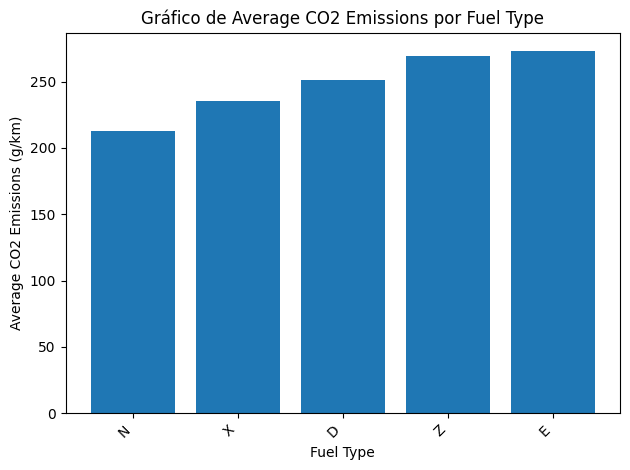

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por 'Fuel type' y calcular la media de 'CO2 emissions (g/km)'
emissions_by_fuel = df_filtrado.groupby('Fuel type')['CO2 emissions (g/km)'].mean()

# Ordenar los valores de emisiones de CO2 de menor a mayor
emissions_by_fuel_sorted = emissions_by_fuel.sort_values()

# Crear la gráfica de barras
plt.bar(emissions_by_fuel_sorted.index, emissions_by_fuel_sorted.values)
plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.title('Gráfico de Average CO2 Emissions por Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Conclusiones:
# 1. Se puede observar que el tipo de combustible tiene una influencia significativa en las emisiones de CO2.
# 2. Los combustibles como el Diesel y la Gasolina tienden a tener mayores emisiones de CO2 en comparación con otros tipos de combustibles.
# 3. Los vehículos que utilizan combustibles alternativos, como el Etanol, tienden a tener menores emisiones de CO2.
# 4. Es importante tener en cuenta que la eficiencia de los motores y otros factores también pueden influir en las emisiones de CO2.
# 5. La gráfica puede ser útil para identificar los tipos de combustibles que contribuyen más a las emisiones de CO2 y para tomar decisiones sobre la promoción de combustibles más limpios.

<ipython-input-48-c8f41ef41333>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(makes))


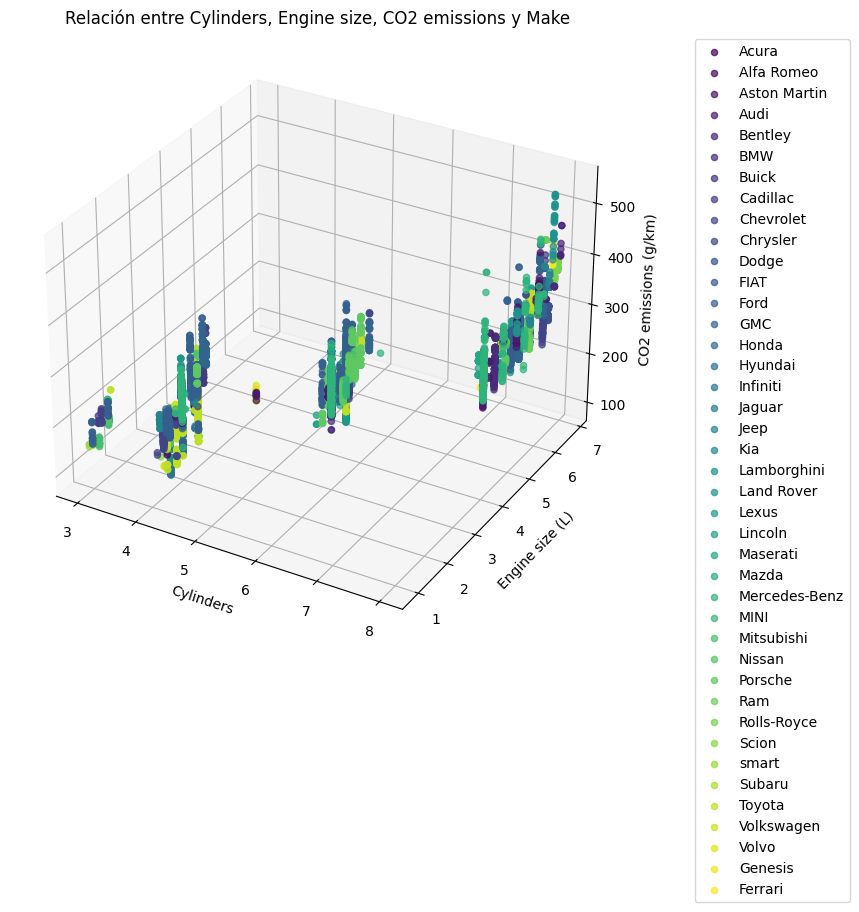

In [ ]:
# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos de Make
makes = df_filtrado['Make'].unique()

# Crear una paleta de colores para cada marca
colors = plt.cm.get_cmap('viridis', len(makes))

# Iterar sobre las marcas y crear un gráfico de dispersión para cada una
for i, make in enumerate(makes):
    df_make = df_filtrado[df_filtrado['Make'] == make]
    ax.scatter(df_make['Cylinders'], df_make['Engine size (L)'], df_make['CO2 emissions (g/km)'],
               c=[colors(i)], label=make, alpha=0.7)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Cylinders')
ax.set_ylabel('Engine size (L)')
ax.set_zlabel('CO2 emissions (g/km)')
ax.set_title('Relación entre Cylinders, Engine size, CO2 emissions y Make')

# Agregar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

# Mostrar la gráfica
plt.show()

In [ ]:
# Conclusiones:
# 1. Se observa una tendencia general a que los vehículos con motores más grandes y más cilindros tienen mayores emisiones de CO2.
# 2. La dispersión de los puntos en el gráfico muestra que la relación entre las variables no es lineal perfecta, pero sí existe una correlación.
# 3. La coloración por marca permite identificar si existe una diferencia en las emisiones de CO2 entre diferentes marcas.
# 4. Se puede observar que algunas marcas tienden a tener mayores emisiones de CO2 que otras.
# 5. Es importante tener en cuenta que el gráfico solo muestra una relación entre las variables, no causalidad.



<ipython-input-50-45d547be69b5>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(makes))


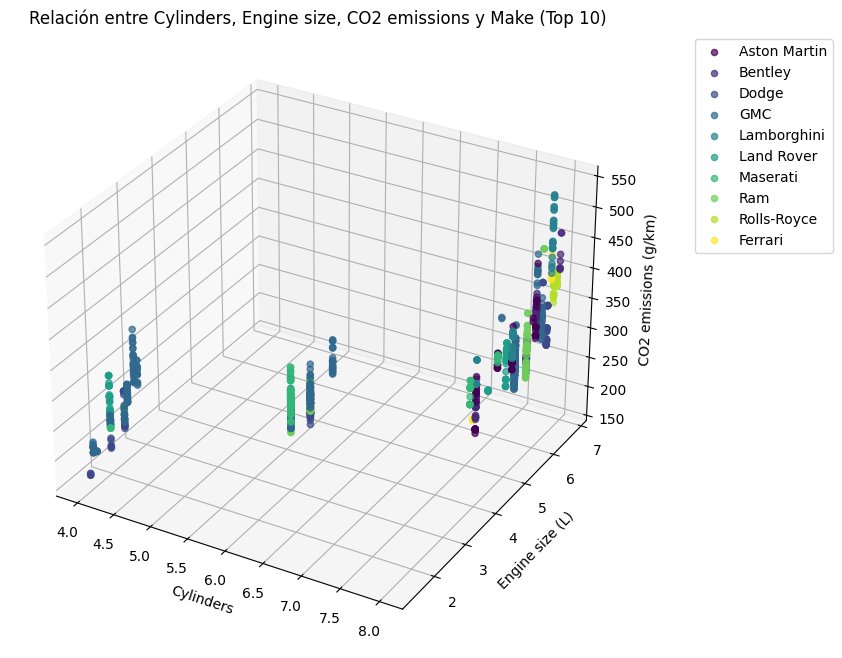

In [ ]:
# Agrupar por 'Make' y calcular la media de 'CO2 emissions (g/km)'
make_emissions = df_filtrado.groupby('Make')['CO2 emissions (g/km)'].mean()

# Ordenar las marcas por emisiones de CO2 de mayor a menor y seleccionar las 10 primeras
top_10_makes = make_emissions.sort_values(ascending=False).head(10).index

# Filtrar el DataFrame para incluir solo las 10 marcas con mayores emisiones
df_top_10_makes = df_filtrado[df_filtrado['Make'].isin(top_10_makes)]


# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos de Make
makes = df_top_10_makes['Make'].unique()

# Crear una paleta de colores para cada marca
colors = plt.cm.get_cmap('viridis', len(makes))

# Iterar sobre las marcas y crear un gráfico de dispersión para cada una
for i, make in enumerate(makes):
    df_make = df_top_10_makes[df_top_10_makes['Make'] == make]
    ax.scatter(df_make['Cylinders'], df_make['Engine size (L)'], df_make['CO2 emissions (g/km)'],
               c=[colors(i)], label=make, alpha=0.7)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Cylinders')
ax.set_ylabel('Engine size (L)')
ax.set_zlabel('CO2 emissions (g/km)')
ax.set_title('Relación entre Cylinders, Engine size, CO2 emissions y Make (Top 10)')

# Agregar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

# Mostrar la gráfica
plt.show()

In [ ]:
# Conclusiones:
# 1. Se observa una tendencia general a que los vehículos con motores más grandes y más cilindros tienen mayores emisiones de CO2, incluso cuando se analiza solo el top 10 de marcas con mayores emisiones.
# 2. La dispersión de los puntos en el gráfico muestra que la relación entre las variables no es lineal perfecta, pero sí existe una correlación.
# 3. La coloración por marca permite identificar si existe una diferencia en las emisiones de CO2 entre diferentes marcas dentro del top 10.
# 4. Se puede observar que algunas marcas dentro del top 10 tienden a tener mayores emisiones de CO2 que otras, lo que podría deberse a diferentes estrategias de diseño o a la preferencia por motores más grandes y potentes.
# 5. Es importante tener en cuenta que el gráfico solo muestra una relación entre las variables, no causalidad.



<ipython-input-52-66f4672592e8>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(models))


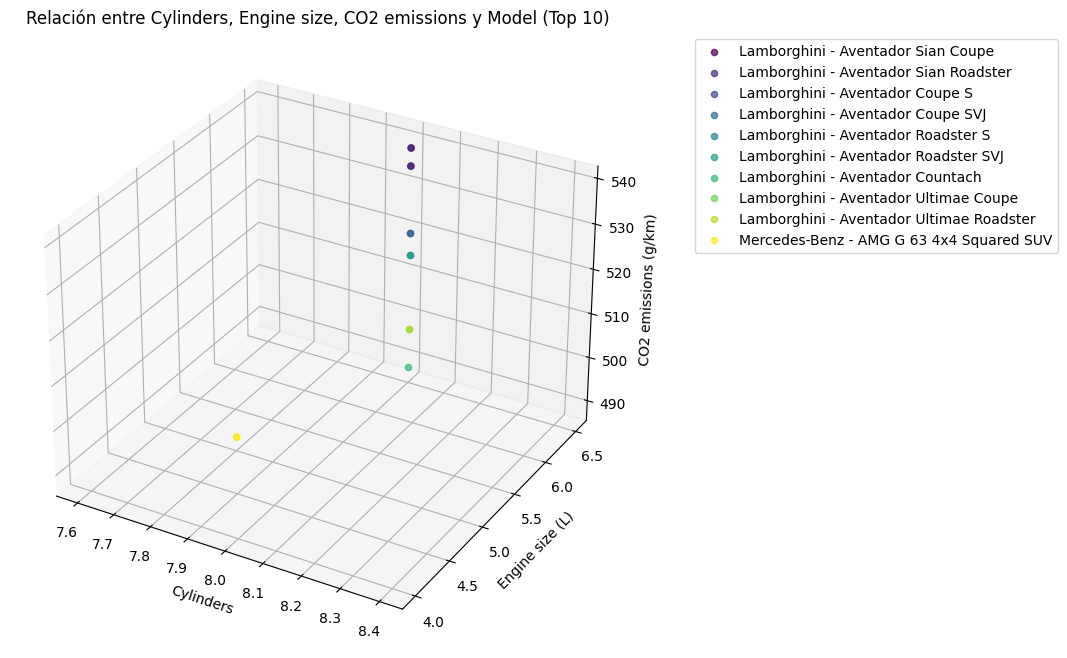

In [ ]:
# Agrupar por 'Model' y calcular la media de 'CO2 emissions (g/km)'
model_emissions = df_filtrado.groupby('Model')['CO2 emissions (g/km)'].mean()

# Ordenar los modelos por emisiones de CO2 de mayor a menor y seleccionar las 10 primeras
top_10_models = model_emissions.sort_values(ascending=False).head(10).index

# Filtrar el DataFrame para incluir solo los 10 modelos con mayores emisiones
df_top_10_models = df_filtrado[df_filtrado['Model'].isin(top_10_models)]

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos de Model
models = df_top_10_models['Model'].unique()

# Crear una paleta de colores para cada modelo
colors = plt.cm.get_cmap('viridis', len(models))

# Iterar sobre los modelos y crear un gráfico de dispersión para cada uno
for i, model in enumerate(models):
    df_model = df_top_10_models[df_top_10_models['Model'] == model]
    make = df_model['Make'].iloc[0]  # Obtener la marca del modelo
    ax.scatter(df_model['Cylinders'], df_model['Engine size (L)'], df_model['CO2 emissions (g/km)'],
               c=[colors(i)], label=f"{make} - {model}", alpha=0.7)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Cylinders')
ax.set_ylabel('Engine size (L)')
ax.set_zlabel('CO2 emissions (g/km)')
ax.set_title('Relación entre Cylinders, Engine size, CO2 emissions y Model (Top 10)')

# Agregar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

# Mostrar la gráfica
plt.show()

In [ ]:
# Conclusiones:
# 1. Se observa una tendencia general a que los vehículos con motores más grandes y más cilindros tienen mayores emisiones de CO2, incluso cuando se analiza solo el top 10 de modelos con mayores emisiones.
# 2. La dispersión de los puntos en el gráfico muestra que la relación entre las variables no es lineal perfecta, pero sí existe una correlación.
# 3. La coloración por modelo y la inclusión de la marca en la leyenda permite identificar si existe una diferencia en las emisiones de CO2 entre diferentes modelos y marcas dentro del top 10.
# 4. Se puede observar que algunos modelos dentro del top 10 tienden a tener mayores emisiones de CO2 que otros, lo que podría deberse a diferentes estrategias de diseño o a la preferencia por motores más grandes y potentes.
# 5. Es importante tener en cuenta que el gráfico solo muestra una relación entre las variables, no causalidad.



<ipython-input-54-e4a2cf41e3e1>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(fuel_types))


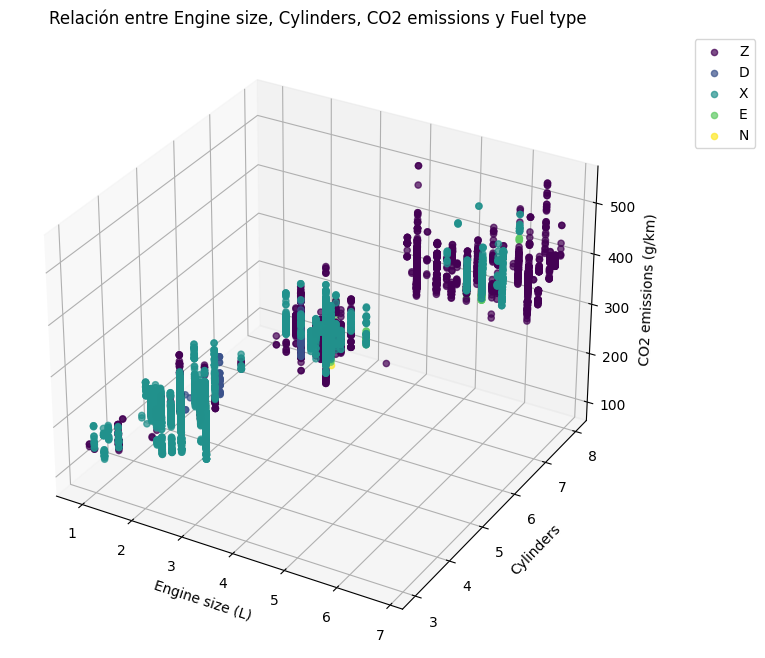

In [ ]:
# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos de Fuel type
fuel_types = df_filtrado['Fuel type'].unique()

# Crear una paleta de colores para cada tipo de combustible
colors = plt.cm.get_cmap('viridis', len(fuel_types))

# Iterar sobre los tipos de combustible y crear un gráfico de dispersión para cada uno
for i, fuel_type in enumerate(fuel_types):
    df_fuel = df_filtrado[df_filtrado['Fuel type'] == fuel_type]
    ax.scatter(df_fuel['Engine size (L)'], df_fuel['Cylinders'], df_fuel['CO2 emissions (g/km)'],
               c=[colors(i)], label=fuel_type, alpha=0.7)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Engine size (L)')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 emissions (g/km)')
ax.set_title('Relación entre Engine size, Cylinders, CO2 emissions y Fuel type')

# Agregar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

# Mostrar la gráfica
plt.show()

In [ ]:
# Conclusiones:
# 1. Se observa una tendencia general a que los vehículos con motores más grandes y más cilindros tienen mayores emisiones de CO2, independientemente del tipo de combustible.
# 2. La dispersión de los puntos en el gráfico muestra que la relación entre las variables no es lineal perfecta, pero sí existe una correlación.
# 3. La coloración por tipo de combustible permite identificar si existe una diferencia en las emisiones de CO2 entre diferentes tipos de combustibles.
# 4. Se puede observar que algunos tipos de combustibles tienden a tener mayores emisiones de CO2 que otros. Por ejemplo, los vehículos con motores de gasolina o diésel pueden tener mayores emisiones en comparación con los que utilizan combustibles alternativos.
# 5. Es importante tener en cuenta que el gráfico solo muestra una relación entre las variables, no causalidad.



<ipython-input-56-0b224d6f661c>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(transmissions))


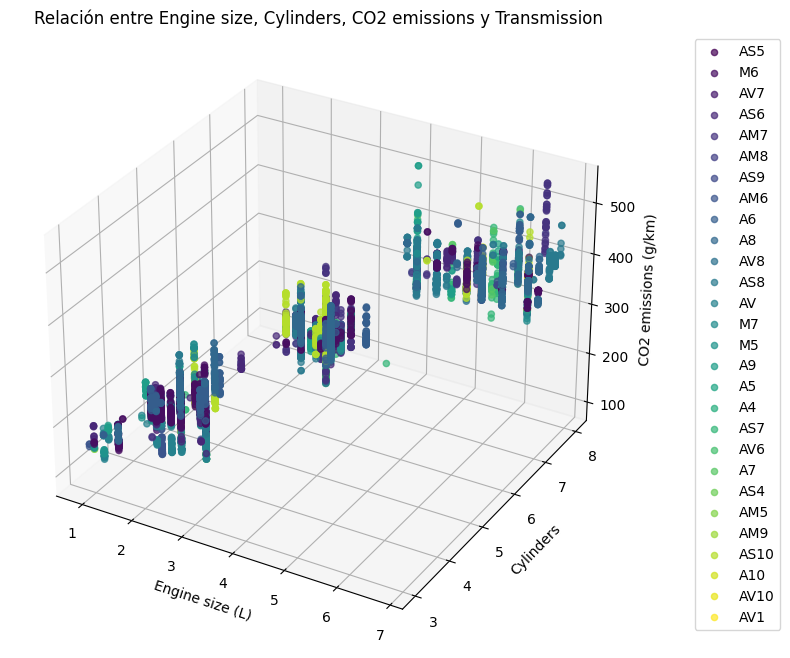

In [ ]:
# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos de Transmission
transmissions = df_filtrado['Transmission'].unique()

# Crear una paleta de colores para cada tipo de transmisión
colors = plt.cm.get_cmap('viridis', len(transmissions))

# Iterar sobre los tipos de transmisión y crear un gráfico de dispersión para cada uno
for i, transmission in enumerate(transmissions):
    df_transmission = df_filtrado[df_filtrado['Transmission'] == transmission]
    ax.scatter(df_transmission['Engine size (L)'], df_transmission['Cylinders'], df_transmission['CO2 emissions (g/km)'],
               c=[colors(i)], label=transmission, alpha=0.7)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Engine size (L)')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 emissions (g/km)')
ax.set_title('Relación entre Engine size, Cylinders, CO2 emissions y Transmission')

# Agregar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

# Mostrar la gráfica
plt.show()

In [ ]:
# Conclusiones:
# 1. Se observa una tendencia general a que los vehículos con motores más grandes y más cilindros tienen mayores emisiones de CO2, independientemente del tipo de transmisión.
# 2. La dispersión de los puntos en el gráfico muestra que la relación entre las variables no es lineal perfecta, pero sí existe una correlación.
# 3. La coloración por tipo de transmisión permite identificar si existe una diferencia en las emisiones de CO2 entre diferentes tipos de transmisiones.
# 4. Se puede observar que algunos tipos de transmisiones pueden tener una ligera tendencia a mayores o menores emisiones de CO2. Por ejemplo, las transmisiones automáticas pueden tener una tendencia a mayores emisiones en comparación con las manuales, pero esto puede depender de otros factores como el tamaño del motor y la cantidad de cilindros.
# 5. Es importante tener en cuenta que el gráfico solo muestra una relación entre las variables, no causalidad.


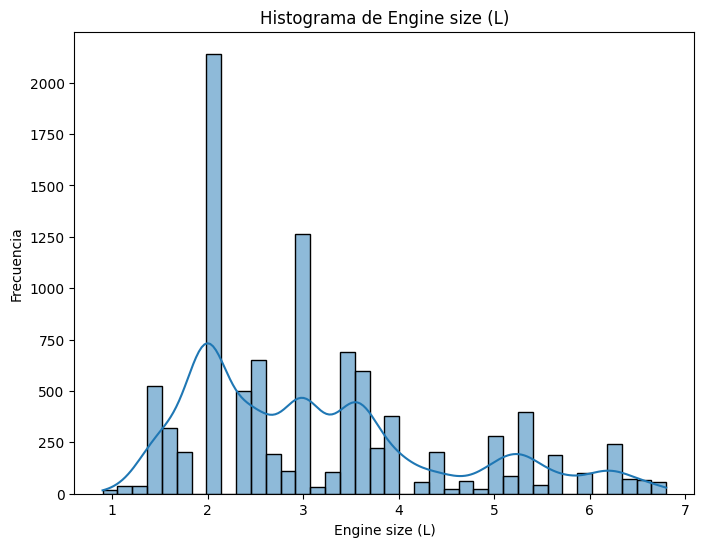

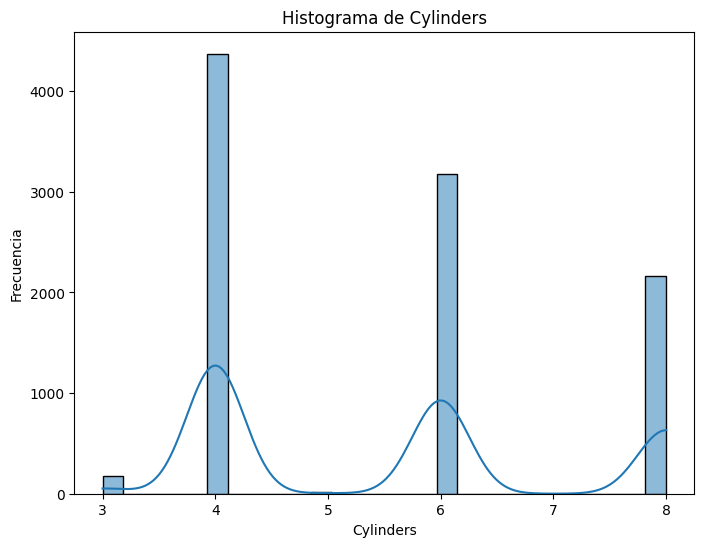

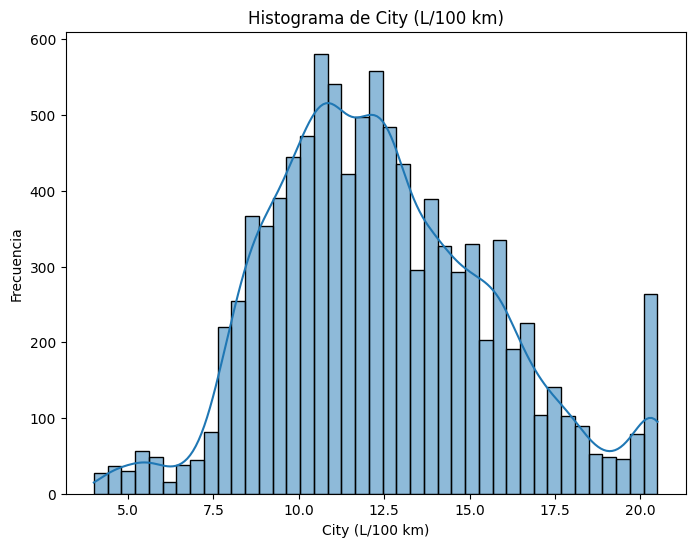

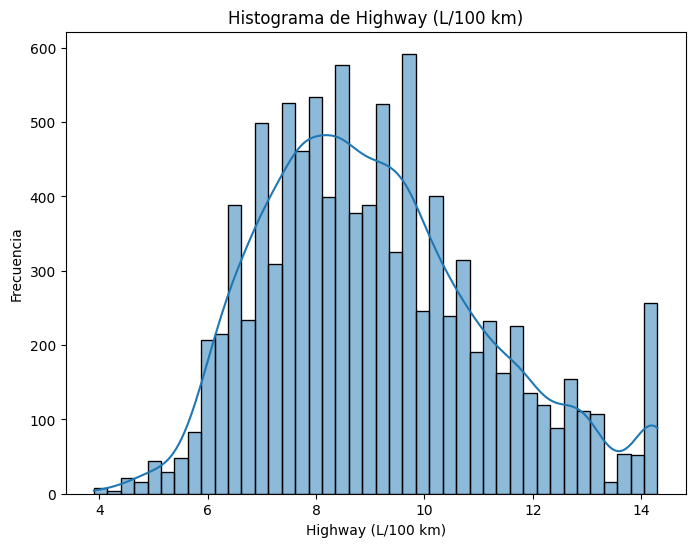

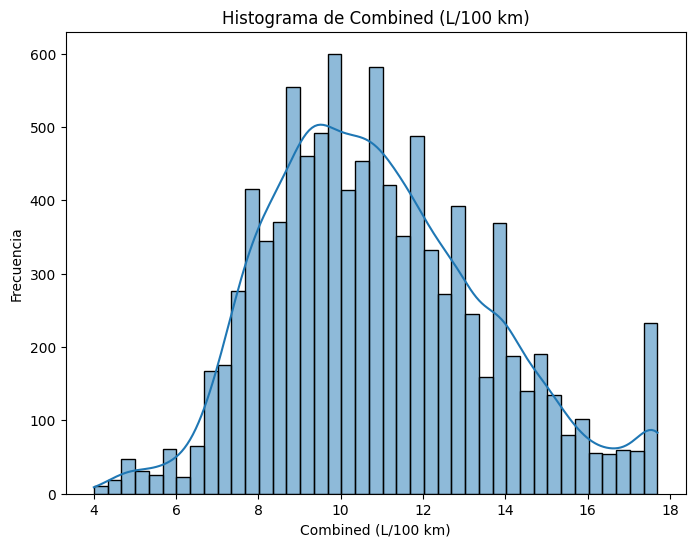

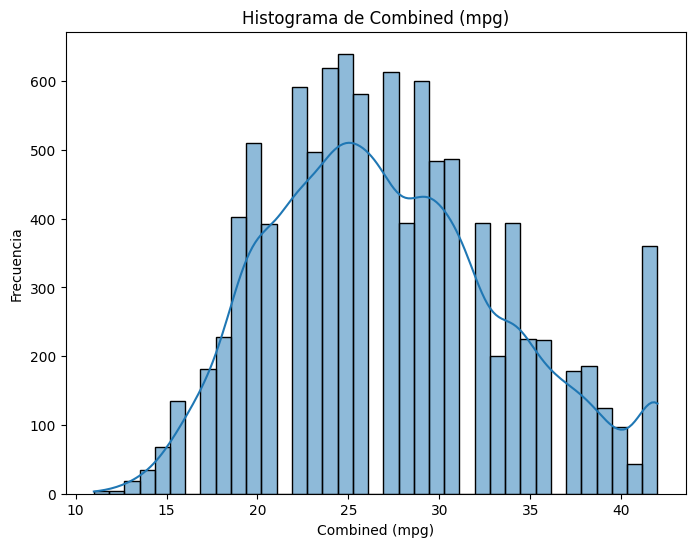

In [ ]:
# Lista de columnas para generar histogramas
columnas = ['Engine size (L)', 'Cylinders', 'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)']

# Generar histogramas para cada columna
for columna in columnas:
  plt.figure(figsize=(8, 6))
  sns.histplot(df_filtrado[columna], kde=True)  # kde=True agrega la línea de distribución
  plt.title(f'Histograma de {columna}')
  plt.xlabel(columna)
  plt.ylabel('Frecuencia')
  plt.show()


### Análisis estadístico

In [ ]:
df_filtrado.describe()

Model year  Engine size (L)    Cylinders  City (L/100 km)  \
count  9914.000000      9914.000000  9914.000000      9914.000000   
mean   2019.186504         3.134658     5.500000        12.403087   
std       2.812693         1.331020     1.597073         3.247080   
min    2015.000000         0.900000     3.000000         4.000000   
25%    2017.000000         2.000000     4.000000        10.100000   
50%    2019.000000         3.000000     6.000000        12.100000   
75%    2022.000000         3.700000     6.000000        14.500000   
max    2024.000000         6.800000     8.000000        20.500000   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
count         9914.000000          9914.000000     9914.000000   
mean             9.084678            10.911882       27.254186   
std              2.069910             2.680260        6.493255   
min              3.900000             4.000000       11.000000   
25%              7.600000             9.000000       22.000000   
50%              8.800000            10.600000       27.000000   
75%             10.300000            12.600000       31.000000   
max             14.300000            17.700000       42.000000   

       CO2 emissions (g/km)  
count           9914.000000  
mean             252.833266  
std               59.530990  
min               94.000000  
25%              209.000000  
50%              249.000000  
75%              291.000000  
max              539.000000

## Transformación de datos

### Contando la frecuencia de variables categóricas

In [ ]:
# Respaldo antes de aplicar LabelEncoder
df_filtradoRespaldo1 = df_filtrado.copy()

In [ ]:
# Cuenta la frecuencia de cada valor único en la columna "Make"
frecuencia_make = df_filtrado['Make'].value_counts()

# Muestra la frecuencia de cada valor único
print("Frecuencia de cada valor único en la columna 'Make':")
print(frecuencia_make)

Frecuencia de cada valor único en la columna 'Make':
Make
Ford             862
Chevrolet        782
BMW              690
Mercedes-Benz    600
Porsche          563
Toyota           478
GMC              469
Audi             408
Jeep             337
Nissan           321
Hyundai          289
Kia              289
Honda            282
Dodge            275
Lexus            264
MINI             253
Mazda            244
Volkswagen       226
Cadillac         226
Jaguar           192
Subaru           185
Volvo            158
Land Rover       155
Ram              126
Buick            117
Maserati         115
Infiniti         113
Lincoln          112
Mitsubishi       104
Acura             96
Chrysler          92
Rolls-Royce       78
Bentley           73
Lamborghini       72
FIAT              66
Aston Martin      63
Genesis           60
Alfa Romeo        55
Scion             13
Ferrari            6
smart              5
Name: count, dtype: int64


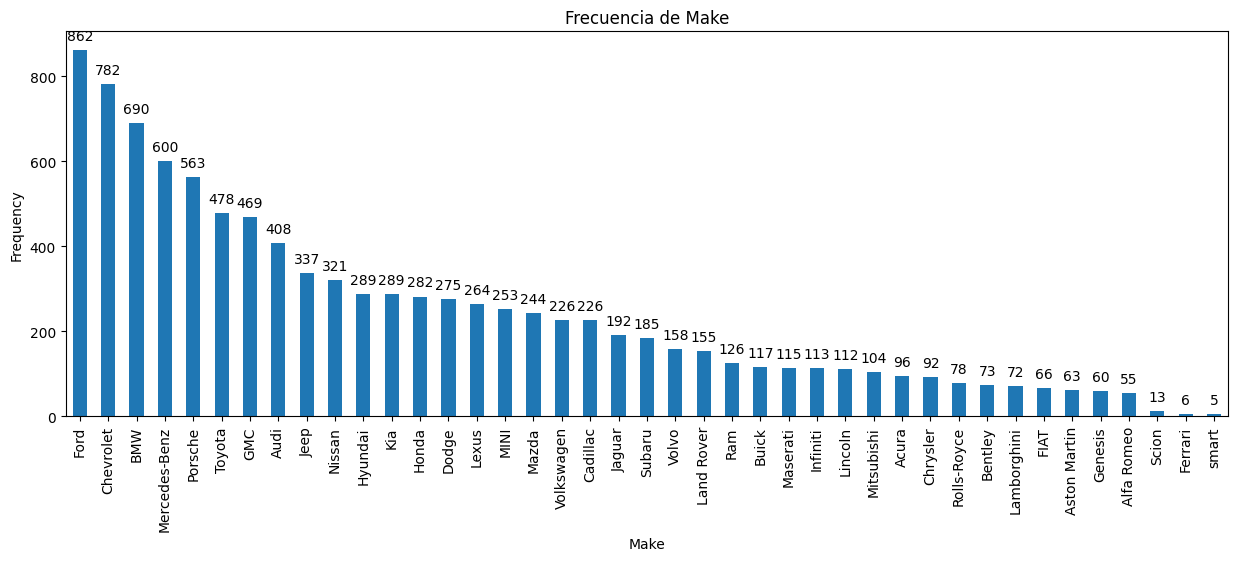

In [ ]:
# Gráfica de barras para la frecuencia de 'Make'
ax = df_filtrado['Make'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.title('Frecuencia de Make')

# Mostrar el valor de frecuencia en cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
# Cuenta la frecuencia de cada valor único en la columna "Model"
frecuencia_model = df_filtrado['Model'].value_counts()

# Muestra la frecuencia de cada valor único en la columna "Model"
print("\nFrecuencia de cada valor único en la columna 'Model':")
print(frecuencia_model)



Frecuencia de cada valor único en la columna 'Model':
Model
Mustang                48
Silverado 4WD          45
Sierra 4WD             45
Camaro                 38
Sierra                 37
                       ..
Defender 130 P400       1
GX 550                  1
TX 350 AWD              1
TX 500h AWD             1
Nautilus Hybrid AWD     1
Name: count, Length: 2051, dtype: int64


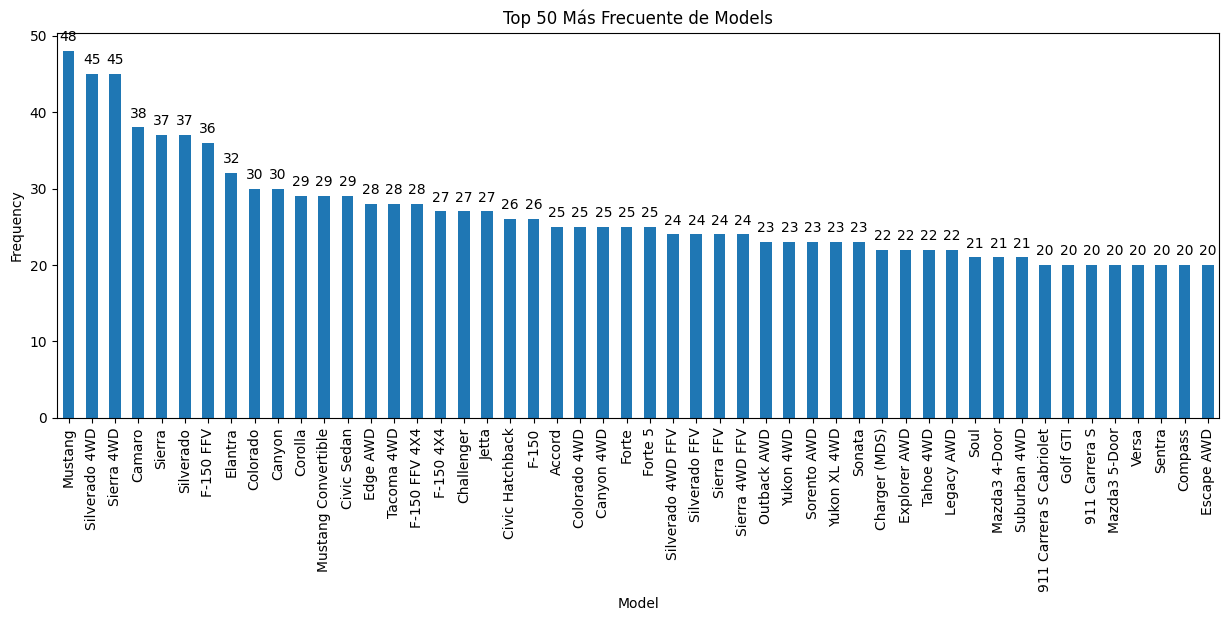

In [ ]:
# Obtener los 50 valores más frecuentes de la columna 'Model'
top_50_models = df_filtrado['Model'].value_counts().head(50)

# Crear la gráfica de barras
ax = top_50_models.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.title('Top 50 Más Frecuente de Models')

# Mostrar el valor de frecuencia en cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
# Cuenta la frecuencia de cada valor único en la columna "Vehicle class"
frecuencia_vehicleClass = df_filtrado['Vehicle class'].value_counts()

# Muestra la frecuencia de cada valor único en la columna "Model"
print("\nFrecuencia de cada valor único en la columna 'Vehicle class':")
print(frecuencia_vehicleClass)


Frecuencia de cada valor único en la columna 'Vehicle class':
Vehicle class
Sport utility vehicle: Small       1861
Mid-size                           1389
Sport utility vehicle: Standard    1206
Compact                            1127
Pickup truck: Standard              868
Subcompact                          845
Full-size                           765
Two-seater                          595
Minicompact                         431
Station wagon: Small                282
Pickup truck: Small                 220
Special purpose vehicle             103
Minivan                              95
Station wagon: Mid-size              82
Van: Passenger                       45
Name: count, dtype: int64


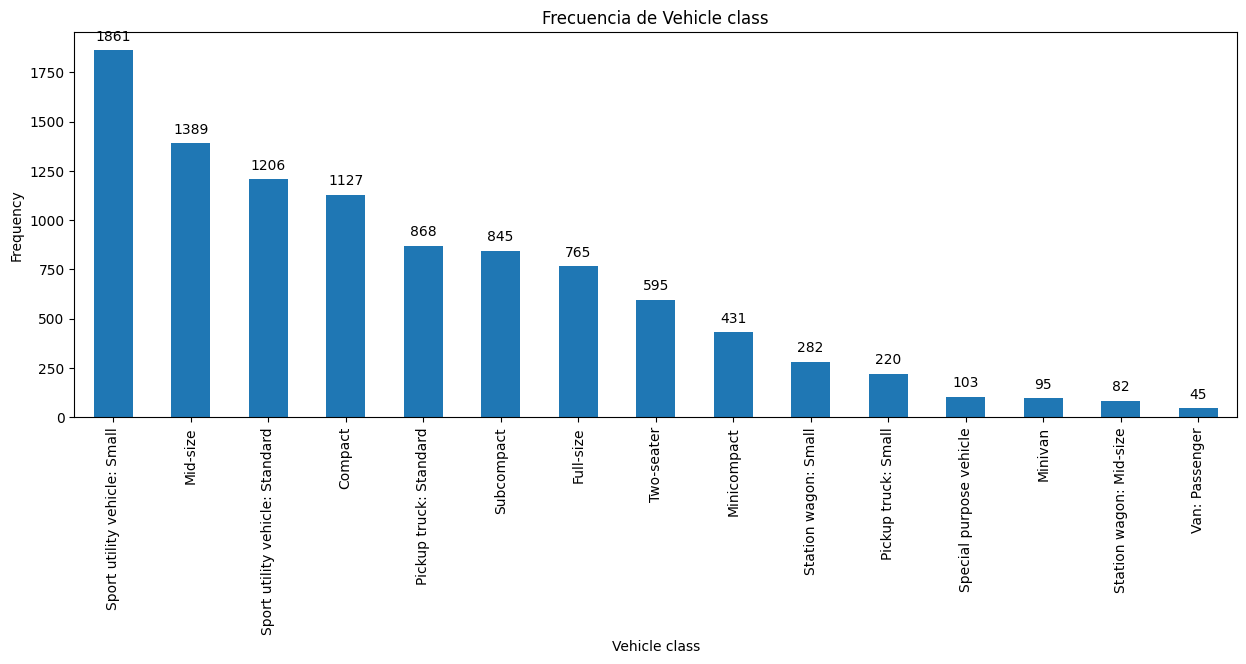

In [ ]:
# Gráfica de barras para la frecuencia de 'Vehicle class'
ax = df_filtrado['Vehicle class'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.xlabel('Vehicle class')
plt.ylabel('Frequency')
plt.title('Frecuencia de Vehicle class')

# Agregar valores de frecuencia a las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
# Cuenta la frecuencia de cada valor único en la columna "Transmission"
frecuencia_Transmission = df_filtrado['Transmission'].value_counts()

# Muestra la frecuencia de cada valor único en la columna "Transmission"
print("\nFrecuencia de cada valor único en la columna 'Transmission':")
print(frecuencia_Transmission)


Frecuencia de cada valor único en la columna 'Transmission':
Transmission
AS8     1987
AS6     1280
M6      1017
A8       787
AM7      665
A6       633
A9       626
AS10     506
AV       410
A10      279
AS7      265
AM8      232
AM6      162
M5       159
AS9      156
AV7      148
AV6      141
M7       130
AV8      120
A5        54
A7        46
AV10      39
AS5       24
A4        20
AV1       19
AM9        6
AM5        2
AS4        1
Name: count, dtype: int64


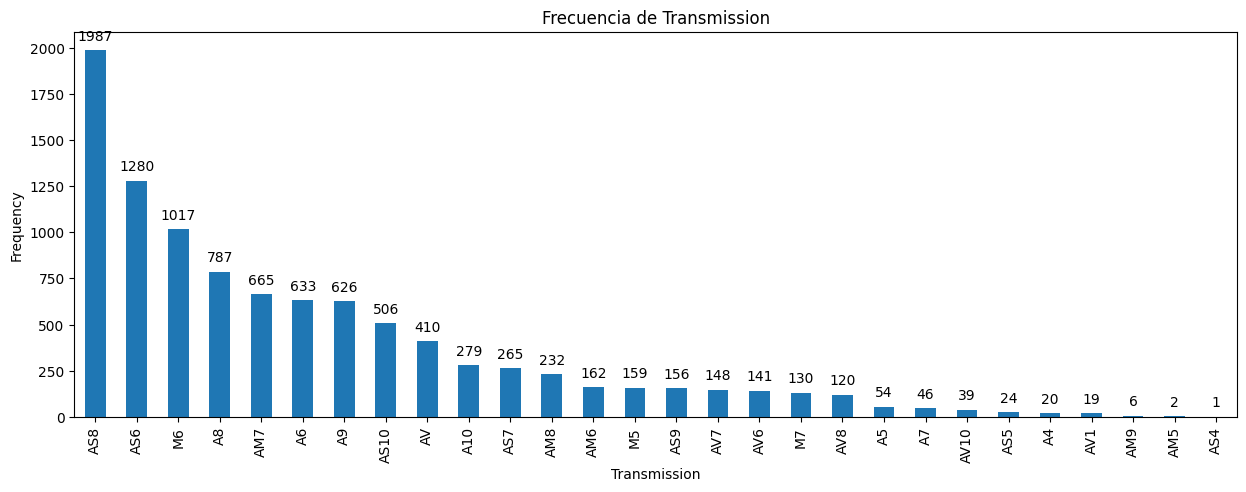

In [ ]:
# Gráfica de barras para la frecuencia de 'Transmission'
ax = df_filtrado['Transmission'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.xlabel('Transmission')
plt.ylabel('Frequency')
plt.title('Frecuencia de Transmission')

# Mostrar el valor de frecuencia en cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
# Cuenta la frecuencia de cada valor único en la columna "Fuel type"
frecuencia_FuelType = df_filtrado['Fuel type'].value_counts()

# Muestra la frecuencia de cada valor único en la columna "Fuel type"
print("\nFrecuencia de cada valor único en la columna 'Fuel type':")
print(frecuencia_FuelType)


Frecuencia de cada valor único en la columna 'Fuel type':
Fuel type
X    4745
Z    4605
E     327
D     236
N       1
Name: count, dtype: int64


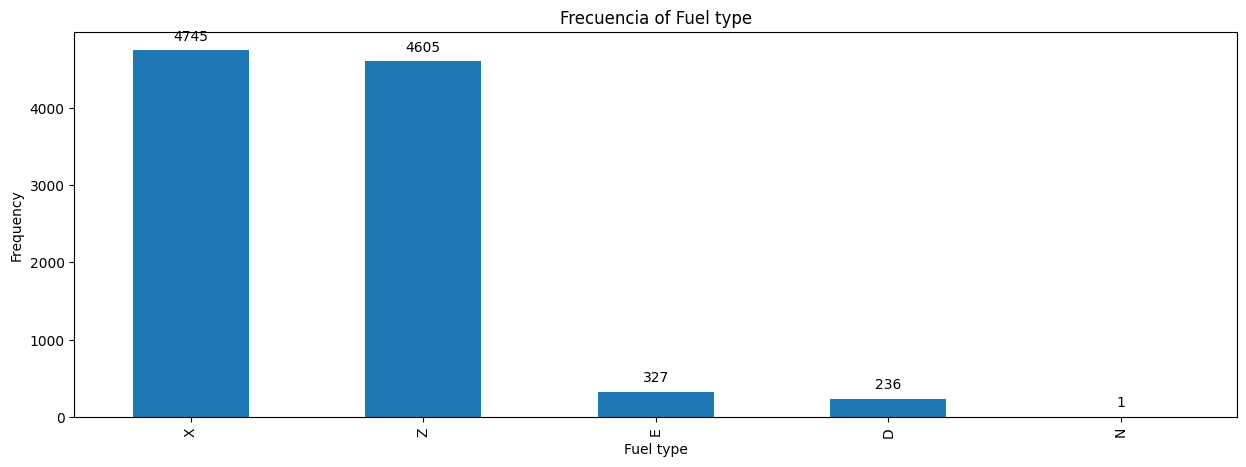

In [ ]:
# Gráfica de barras para la frecuencia de 'Fuel type'
ax = df_filtrado['Fuel type'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.xlabel('Fuel type')
plt.ylabel('Frequency')
plt.title('Frecuencia of Fuel type')

# Agrega el valor de la frecuencia encima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


### Codificando con LabelEncoder()

In [ ]:
# Lista de nombres de columnas categóricas
columnas_categoricas = ['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type']

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar los datos
df_filtrado['Make_le'] = label_encoder.fit_transform(df_filtrado['Make'])
df_filtrado['Model_le'] = label_encoder.fit_transform(df_filtrado['Model'])
df_filtrado['Vehicle class_le'] = label_encoder.fit_transform(df_filtrado['Vehicle class'])
df_filtrado['Fuel type_le'] = label_encoder.fit_transform(df_filtrado['Fuel type'])
df_filtrado['Transmission_le'] = label_encoder.fit_transform(df_filtrado['Transmission'])

<ipython-input-71-72a80d48542c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Make_le'] = label_encoder.fit_transform(df_filtrado['Make'])
<ipython-input-71-72a80d48542c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Model_le'] = label_encoder.fit_transform(df_filtrado['Model'])
<ipython-input-71-72a80d48542c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
# Mostrar el DataFrame con las nuevas columnas codificadas
df_filtrado.head()

Model year   Make       Model                 Vehicle class  \
0        2015  Acura         ILX                       Compact   
1        2015  Acura         ILX                       Compact   
2        2015  Acura  ILX Hybrid                       Compact   
3        2015  Acura  MDX SH-AWD  Sport utility vehicle: Small   
4        2015  Acura     RDX AWD  Sport utility vehicle: Small   

   Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0              2.0          4          AS5         Z              9.7   
1              2.4          4           M6         Z             10.8   
2              1.5          4          AV7         Z              6.0   
3              3.5          6          AS6         Z             12.7   
4              3.5          6          AS6         Z             12.1   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 6.7                  8.3              34   
1                 7.4                  9.3              30   
2                 6.1                  6.1              42   
3                 9.1                 11.1              25   
4                 8.7                 10.6              27   

   CO2 emissions (g/km)  Make_le  Model_le  Vehicle class_le  Fuel type_le  \
0                   191        0      1036                 0             4   
1                   214        0      1036                 0             4   
2                   140        0      1037                 0             4   
3                   255        0      1197                 8             4   
4                   244        0      1450                 8             4   

   Transmission_le  
0               14  
1               26  
2               23  
3               15  
4               15

In [ ]:
# Encuentra el valor mínimo de la variable "Make_le"
min_make = df_filtrado['Make_le'].min()

# Encuentra el valor máximo de la variable "Make_le"
max_make = df_filtrado['Make_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Make_le':")
print("Mínimo:", min_make)
print("Máximo:", max_make)


Rango de valores de 'Make_le':
Mínimo: 0
Máximo: 40


In [ ]:
# Encuentra el valor mínimo de la variable "Model"
min_make = df_filtrado['Model_le'].min()

# Encuentra el valor máximo de la variable "Model"
max_make = df_filtrado['Model_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Model':")
print("Mínimo:", min_make)
print("Máximo:", max_make)

Rango de valores de 'Model':
Mínimo: 0
Máximo: 2050


In [ ]:
# Encuentra el valor mínimo de la variable "Vehicle class_le"
min_make = df_filtrado['Vehicle class_le'].min()

# Encuentra el valor máximo de la variable "Vehicle class_le"
max_make = df_filtrado['Vehicle class_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Vehicle class_le':")
print("Mínimo:", min_make)
print("Máximo:", max_make)

Rango de valores de 'Vehicle class_le':
Mínimo: 0
Máximo: 14


In [ ]:
# Encuentra el valor mínimo de la variable "Transmission_le"
min_make = df_filtrado['Transmission_le'].min()

# Encuentra el valor máximo de la variable "Transmission_le"
max_make = df_filtrado['Transmission_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Transmission_le':")
print("Mínimo:", min_make)
print("Máximo:", max_make)

Rango de valores de 'Transmission_le':
Mínimo: 0
Máximo: 27


In [ ]:
# Encuentra el valor mínimo de la variable "Fuel type_le"
min_make = df_filtrado['Fuel type_le'].min()

# Encuentra el valor máximo de la variable "Fuel type_le"
max_make = df_filtrado['Fuel type_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Fuel type_le':")
print("Mínimo:", min_make)
print("Máximo:", max_make)

Rango de valores de 'Fuel type_le':
Mínimo: 0
Máximo: 4


In [ ]:
# Respaldo después de aplicar LaberEncoder() con las variables categóricas
df_filtradoRespaldo2 = df_filtrado.copy()

In [ ]:
# Elimina las columnas especificadas y asigna el resultado a un nuevo DataFrame
df_filtrado1 = df_filtrado.drop(['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type'], axis=1)

# Muestra el nuevo DataFrame -> con todas las 13 variables (numéricas y las categóricas codificadas)
df_filtrado1.head()


Model year  Engine size (L)  Cylinders  City (L/100 km)  \
0        2015              2.0          4              9.7   
1        2015              2.4          4             10.8   
2        2015              1.5          4              6.0   
3        2015              3.5          6             12.7   
4        2015              3.5          6             12.1   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 6.7                  8.3              34   
1                 7.4                  9.3              30   
2                 6.1                  6.1              42   
3                 9.1                 11.1              25   
4                 8.7                 10.6              27   

   CO2 emissions (g/km)  Make_le  Model_le  Vehicle class_le  Fuel type_le  \
0                   191        0      1036                 0             4   
1                   214        0      1036                 0             4   
2                   140        0      1037                 0             4   
3                   255        0      1197                 8             4   
4                   244        0      1450                 8             4   

   Transmission_le  
0               14  
1               26  
2               23  
3               15  
4               15

In [ ]:
# Elimina las columnas especificadas y asigna el resultado a un nuevo DataFrame
df_filtrado2 = df_filtrado.drop(['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type', 'Make_le', 'Model_le', 'Vehicle class_le', 'Transmission_le', 'Fuel type_le'], axis=1)

# Muestra el nuevo DataFrame -> con todas las 8 variables numéricas
df_filtrado2.head()

Model year  Engine size (L)  Cylinders  City (L/100 km)  \
0        2015              2.0          4              9.7   
1        2015              2.4          4             10.8   
2        2015              1.5          4              6.0   
3        2015              3.5          6             12.7   
4        2015              3.5          6             12.1   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 6.7                  8.3              34   
1                 7.4                  9.3              30   
2                 6.1                  6.1              42   
3                 9.1                 11.1              25   
4                 8.7                 10.6              27   

   CO2 emissions (g/km)  
0                   191  
1                   214  
2                   140  
3                   255  
4                   244

## Minería de datos

### Selección de variables numéricas

In [ ]:
# Correlación de variables numéricas df_filtrado2
"""
  Model year
  Engine size (L)
  Cylinders
  City (L/100 km)
  Highway (L/100 km)
  Combined (L/100 km)
  Combined (mpg)
  CO2 emissions (g/km)
"""

'\n  Model year\n  Engine size (L)\n  Cylinders\n  City (L/100 km)\n  Highway (L/100 km)\n  Combined (L/100 km)\n  Combined (mpg)\n  CO2 emissions (g/km)\n'

In [ ]:
# nombre de las columnas de df_filtrado2
column_names = df_filtrado2.columns.tolist()
column_names

['Model year',
 'Engine size (L)',
 'Cylinders',
 'City (L/100 km)',
 'Highway (L/100 km)',
 'Combined (L/100 km)',
 'Combined (mpg)',
 'CO2 emissions (g/km)']

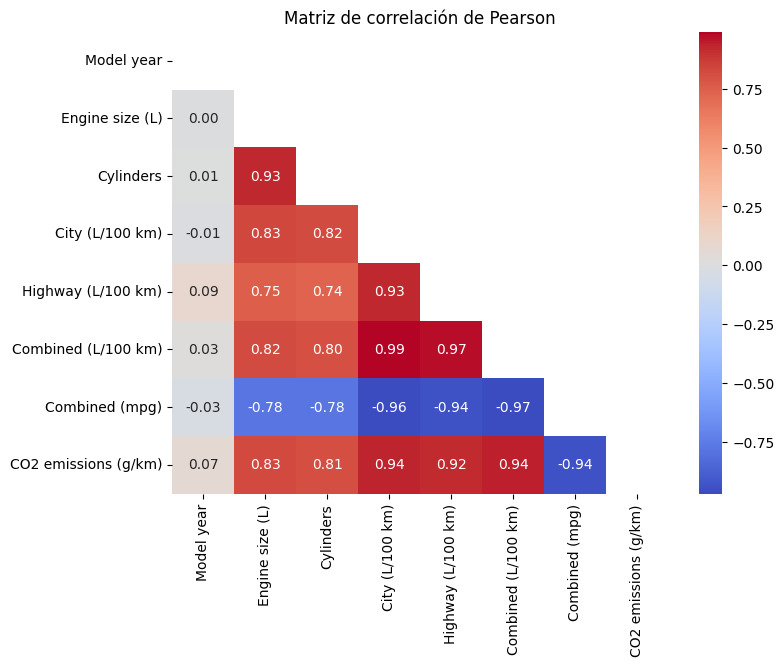

In [ ]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = df_filtrado2.corr(method='pearson')

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de Pearson')
plt.show()

Se puede escoger entre:

'Combined (L/100 km)' y 'City (L/100 km)' porque tienen un 0.99 de correlación aportando multicolinealidad

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Separar las características (variables independientes) y la variable objetivo (dependiente)
X = df_filtrado2[['Model year', 'Engine size (L)', 'Cylinders', 'City (L/100 km)',
                    'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)']]
y = df_filtrado2['CO2 emissions (g/km)']

# Aplicar SelectKBest con f_regression para seleccionar las 5 mejores características
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]

print("Nuevas características:\n", X_new)
print("\nCaracterísticas seleccionadas:", selected_features)



Nuevas características:
 [[ 2.   9.7  6.7  8.3 34. ]
 [ 2.4 10.8  7.4  9.3 30. ]
 [ 1.5  6.   6.1  6.1 42. ]
 ...
 [ 2.   9.9  7.8  9.  31. ]
 [ 2.  10.6  8.3  9.6 29. ]
 [ 2.  10.9  8.6  9.8 29. ]]

Características seleccionadas: Index(['Engine size (L)', 'City (L/100 km)', 'Highway (L/100 km)',
       'Combined (L/100 km)', 'Combined (mpg)'],
      dtype='object')


Con el método SelectKBest expresa que las 5 mejores variables explicativas son:

Características seleccionadas:

Index(['Engine size (L)', 'City (L/100 km)', 'Highway (L/100 km)',
       'Combined (L/100 km)', 'Combined (mpg)'],
      dtype='object')

In [ ]:
# columnas de df_filtrado1
columnas_df_filtrado1 = df_filtrado1.columns.tolist()
columnas_df_filtrado1

['Model year',
 'Engine size (L)',
 'Cylinders',
 'City (L/100 km)',
 'Highway (L/100 km)',
 'Combined (L/100 km)',
 'Combined (mpg)',
 'CO2 emissions (g/km)',
 'Make_le',
 'Model_le',
 'Vehicle class_le',
 'Fuel type_le',
 'Transmission_le']

In [ ]:
# columnas de df_filtrado2
columnas_df_filtrado2 = df_filtrado2.columns.tolist()
columnas_df_filtrado2

['Model year',
 'Engine size (L)',
 'Cylinders',
 'City (L/100 km)',
 'Highway (L/100 km)',
 'Combined (L/100 km)',
 'Combined (mpg)',
 'CO2 emissions (g/km)']

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extrae las columnas correspondientes del DataFrame
X = df_filtrado2[['Model year', 'Engine size (L)', 'Cylinders', 'City (L/100 km)',
                    'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)']]

# Añade una constante para el modelo de regresión
X = sm.add_constant(X)

# Calcula el VIF para cada variable explicativa
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrando el VIF
print(vif_data)


              Variable            VIF
0                const  557072.322895
1           Model year       1.078414
2      Engine size (L)       8.463908
3            Cylinders       7.701973
4      City (L/100 km)    1168.977239
5   Highway (L/100 km)     328.049878
6  Combined (L/100 km)    2576.616690
7       Combined (mpg)      17.406233


Se analiza el VIF y se determina que hay multicolinealidad potencialmente severa, ya que en las mayorías de las variables explicativas numéricas tienen un VIF superior a 5.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extrae las columnas correspondientes del DataFrame
X = df_filtrado1[['Model year', 'Engine size (L)', 'Cylinders', 'City (L/100 km)', 'Highway (L/100 km)',
                  'Combined (L/100 km)', 'Combined (mpg)', 'CO2 emissions (g/km)', 'Make_le',
                  'Model_le', 'Vehicle class_le', 'Fuel type_le', 'Transmission_le']]

# Añade una constante para el modelo de regresión
X = sm.add_constant(X)

# Calcula el VIF para cada variable explicativa
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrando el VIF
print(vif_data)

                Variable            VIF
0                  const  572779.374116
1             Model year       1.116816
2        Engine size (L)       8.977571
3              Cylinders       7.834137
4        City (L/100 km)    1171.167238
5     Highway (L/100 km)     330.423849
6    Combined (L/100 km)    2585.830685
7         Combined (mpg)      20.624550
8   CO2 emissions (g/km)      12.798582
9                Make_le       1.111521
10              Model_le       1.065571
11      Vehicle class_le       1.131534
12          Fuel type_le       1.303050
13       Transmission_le       1.306810


### Selección de variables categóricas

In [ ]:
# Influencia de variables categóricas
"""
Make
Model
Vehicle class
Transmission
Fuel type
"""

'\nMake\nModel\nVehicle class\nTransmission\nFuel type\n'

In [ ]:
df_filtradoRespaldo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9914 entries, 0 to 9929
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            9914 non-null   int64  
 1   Make                  9914 non-null   object 
 2   Model                 9914 non-null   object 
 3   Vehicle class         9914 non-null   object 
 4   Engine size (L)       9914 non-null   float64
 5   Cylinders             9914 non-null   int64  
 6   Transmission          9914 non-null   object 
 7   Fuel type             9914 non-null   object 
 8   City (L/100 km)       9914 non-null   float64
 9   Highway (L/100 km)    9914 non-null   float64
 10  Combined (L/100 km)   9914 non-null   float64
 11  Combined (mpg)        9914 non-null   int64  
 12  CO2 emissions (g/km)  9914 non-null   int64  
 13  Make_le               9914 non-null   int64  
 14  Model_le              9914 non-null   int64  
 15  Vehicle class_le      9914

In [ ]:
# Lista de de columnas
columnas_categoricas_salida = ['Make_le', 'Model_le', 'Vehicle class_le', 'Transmission_le', 'Fuel type_le', 'CO2 emissions (g/km)']

df_filtradoCategoricas = df_filtradoRespaldo2[columnas_categoricas_salida].copy()

df_filtradoCategoricas.rename(columns={'Vehicle class_le': 'Vehicle_class_le'}, inplace=True)
df_filtradoCategoricas.rename(columns={'Fuel type_le': 'Fuel_type_le'}, inplace=True)
df_filtradoCategoricas.rename(columns={'CO2 emissions (g/km)': 'CO2_emissions(g/km)'}, inplace=True)

df_filtradoCategoricas.head()

Make_le  Model_le  Vehicle_class_le  Transmission_le  Fuel_type_le  \
0        0      1036                 0               14             4   
1        0      1036                 0               26             4   
2        0      1037                 0               23             4   
3        0      1197                 8               15             4   
4        0      1450                 8               15             4   

   CO2_emissions(g/km)  
0                  191  
1                  214  
2                  140  
3                  255  
4                  244

In [ ]:
df_encoded = df_filtradoCategoricas.copy()

# Ajustar un modelo lineal utilizando ANOVA
formula = 'Q("CO2_emissions(g/km)") ~ C(Make_le) + C(Model_le) + C(Vehicle_class_le) + C(Transmission_le) + C(Fuel_type_le)'

model = ols(formula, data=df_encoded).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrando la tabla de ANOVA
print("Tabla de ANOVA:")
print(anova_table)

Tabla de ANOVA:
                           sum_sq      df           F         PR(>F)
C(Make_le)           3.429077e+06    40.0  463.168055   0.000000e+00
C(Model_le)          2.424305e+07  2050.0   63.893212   0.000000e+00
C(Vehicle_class_le)  1.120689e+06    14.0  432.492228   0.000000e+00
C(Transmission_le)   2.019247e+05    27.0   40.406118  3.270664e-198
C(Fuel_type_le)      1.403945e+05     4.0  189.631953  2.146826e-155
Residual             1.447945e+06  7823.0         NaN            NaN


De acuerdo al método ANOVA, se observa que p < 0.05 entonces todas las variables categóricas son significativas.

Se rechaza la hipótesis nula y se acepta la hipótesis alternativa.

Ho: No hay diferencia significativa

H1: Si hay diferencia significativa

### Separación de datos (train y test) y Normalización

In [ ]:
df_filtrado1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9914 entries, 0 to 9929
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            9914 non-null   int64  
 1   Engine size (L)       9914 non-null   float64
 2   Cylinders             9914 non-null   int64  
 3   City (L/100 km)       9914 non-null   float64
 4   Highway (L/100 km)    9914 non-null   float64
 5   Combined (L/100 km)   9914 non-null   float64
 6   Combined (mpg)        9914 non-null   int64  
 7   CO2 emissions (g/km)  9914 non-null   int64  
 8   Make_le               9914 non-null   int64  
 9   Model_le              9914 non-null   int64  
 10  Vehicle class_le      9914 non-null   int64  
 11  Fuel type_le          9914 non-null   int64  
 12  Transmission_le       9914 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 1.1 MB


In [ ]:
# Actualizando los nombres de las variables
df_filtrado1.rename(columns={'Model year': 'Model_year'}, inplace=True)
df_filtrado1.rename(columns={'Engine size (L)': 'Engine_size(L)'}, inplace=True)
df_filtrado1.rename(columns={'City (L/100 km)': 'City(L/100 km)'}, inplace=True)
df_filtrado1.rename(columns={'Highway (L/100 km)': 'Highway(L/100 km)'}, inplace=True)
df_filtrado1.rename(columns={'Combined (L/100 km)': 'Combined(L/100 km)'}, inplace=True)
df_filtrado1.rename(columns={'Combined (mpg)': 'Combined(mpg)'}, inplace=True)
df_filtrado1.rename(columns={'CO2 emissions (g/km)': 'CO2_emissions(g/km)'}, inplace=True)
df_filtrado1.rename(columns={'Vehicle class_le': 'Vehicle_class_le'}, inplace=True)
df_filtrado1.rename(columns={'Fuel type_le': 'Fuel_type_le'}, inplace=True)

df_filtrado1.head()

Model_year  Engine_size(L)  Cylinders  City(L/100 km)  Highway(L/100 km)  \
0        2015             2.0          4             9.7                6.7   
1        2015             2.4          4            10.8                7.4   
2        2015             1.5          4             6.0                6.1   
3        2015             3.5          6            12.7                9.1   
4        2015             3.5          6            12.1                8.7   

   Combined(L/100 km)  Combined(mpg)  CO2_emissions(g/km)  Make_le  Model_le  \
0                 8.3             34                  191        0      1036   
1                 9.3             30                  214        0      1036   
2                 6.1             42                  140        0      1037   
3                11.1             25                  255        0      1197   
4                10.6             27                  244        0      1450   

   Vehicle_class_le  Fuel_type_le  Transmission_le  
0                 0             4               14  
1                 0             4               26  
2                 0             4               23  
3                 8             4               15  
4                 8             4               15

In [ ]:
df_filtrado2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9914 entries, 0 to 9929
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            9914 non-null   int64  
 1   Engine size (L)       9914 non-null   float64
 2   Cylinders             9914 non-null   int64  
 3   City (L/100 km)       9914 non-null   float64
 4   Highway (L/100 km)    9914 non-null   float64
 5   Combined (L/100 km)   9914 non-null   float64
 6   Combined (mpg)        9914 non-null   int64  
 7   CO2 emissions (g/km)  9914 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 697.1 KB


In [ ]:
# Actualizando los nombres de las variables
df_filtrado2.rename(columns={'Model year': 'Model_year'}, inplace=True)
df_filtrado2.rename(columns={'Engine size (L)': 'Engine_size(L)'}, inplace=True)
df_filtrado2.rename(columns={'City (L/100 km)': 'City(L/100 km)'}, inplace=True)
df_filtrado2.rename(columns={'Highway (L/100 km)': 'Highway(L/100 km)'}, inplace=True)
df_filtrado2.rename(columns={'Combined (L/100 km)': 'Combined(L/100 km)'}, inplace=True)
df_filtrado2.rename(columns={'Combined (mpg)': 'Combined(mpg)'}, inplace=True)
df_filtrado2.rename(columns={'CO2 emissions (g/km)': 'CO2_emissions(g/km)'}, inplace=True)

df_filtrado2.head()

Model_year  Engine_size(L)  Cylinders  City(L/100 km)  Highway(L/100 km)  \
0        2015             2.0          4             9.7                6.7   
1        2015             2.4          4            10.8                7.4   
2        2015             1.5          4             6.0                6.1   
3        2015             3.5          6            12.7                9.1   
4        2015             3.5          6            12.1                8.7   

   Combined(L/100 km)  Combined(mpg)  CO2_emissions(g/km)  
0                 8.3             34                  191  
1                 9.3             30                  214  
2                 6.1             42                  140  
3                11.1             25                  255  
4                10.6             27                  244

In [ ]:
df_filtradoResp = df_filtrado1.copy()

In [ ]:
# Esta línea de código crea una nueva columna llamada 'Estrato' en el DataFrame df_filtrado1.
# La función pd.qcut() divide la columna 'CO2_emissions(g/km)' en 10 grupos (cuantiles) con igual número de observaciones.
# El argumento labels=False asigna un número entero a cada grupo, de 0 a 9.
# En resumen, esta línea crea una nueva columna que categoriza las emisiones de CO2 en 10 estratos.

df_filtrado1['Estrato'] = pd.qcut( df_filtrado1['CO2_emissions(g/km)'], 10, labels=False)
df_filtrado1.head()

Model_year  Engine_size(L)  Cylinders  City(L/100 km)  Highway(L/100 km)  \
0        2015             2.0          4             9.7                6.7   
1        2015             2.4          4            10.8                7.4   
2        2015             1.5          4             6.0                6.1   
3        2015             3.5          6            12.7                9.1   
4        2015             3.5          6            12.1                8.7   

   Combined(L/100 km)  Combined(mpg)  CO2_emissions(g/km)  Make_le  Model_le  \
0                 8.3             34                  191        0      1036   
1                 9.3             30                  214        0      1036   
2                 6.1             42                  140        0      1037   
3                11.1             25                  255        0      1197   
4                10.6             27                  244        0      1450   

   Vehicle_class_le  Fuel_type_le  Transmission_le  Estrato  
0                 0             4               14        1  
1                 0             4               26        2  
2                 0             4               23        0  
3                 8             4               15        5  
4                 8             4               15        4

In [ ]:
# Seleccionando las columnas escogidas por SelectKBest con chi2
X = df_filtrado1[['Model_year', 'Engine_size(L)', 'Cylinders', 'City(L/100 km)', 'Highway(L/100 km)', 'Combined(L/100 km)',
                  'Make_le', 'Model_le', 'Vehicle_class_le', 'Fuel_type_le', 'Transmission_le']]

                  #  'Combined(mpg)' se retira esta variable

# Convierte X a un arreglo NumPy
X = X.values
print(X)

[[2.015e+03 2.000e+00 4.000e+00 ... 0.000e+00 4.000e+00 1.400e+01]
 [2.015e+03 2.400e+00 4.000e+00 ... 0.000e+00 4.000e+00 2.600e+01]
 [2.015e+03 1.500e+00 4.000e+00 ... 0.000e+00 4.000e+00 2.300e+01]
 ...
 [2.024e+03 2.000e+00 4.000e+00 ... 8.000e+00 4.000e+00 1.700e+01]
 [2.024e+03 2.000e+00 4.000e+00 ... 8.000e+00 4.000e+00 1.700e+01]
 [2.024e+03 2.000e+00 4.000e+00 ... 9.000e+00 4.000e+00 1.700e+01]]


In [ ]:
df_X = df_filtrado1[['Model_year', 'Engine_size(L)', 'Cylinders', 'City(L/100 km)', 'Highway(L/100 km)', 'Combined(L/100 km)',
                   'Make_le', 'Model_le', 'Vehicle_class_le', 'Fuel_type_le', 'Transmission_le']]

                   # 'Combined(mpg)' se retira

In [ ]:
df_X.head()

Model_year  Engine_size(L)  Cylinders  City(L/100 km)  Highway(L/100 km)  \
0        2015             2.0          4             9.7                6.7   
1        2015             2.4          4            10.8                7.4   
2        2015             1.5          4             6.0                6.1   
3        2015             3.5          6            12.7                9.1   
4        2015             3.5          6            12.1                8.7   

   Combined(L/100 km)  Make_le  Model_le  Vehicle_class_le  Fuel_type_le  \
0                 8.3        0      1036                 0             4   
1                 9.3        0      1036                 0             4   
2                 6.1        0      1037                 0             4   
3                11.1        0      1197                 8             4   
4                10.6        0      1450                 8             4   

   Transmission_le  
0               14  
1               26  
2               23  
3               15  
4               15

In [ ]:
# Separación de los datos de la salida
# Dato de salida, variable dependiente
y = df_filtrado1['CO2_emissions(g/km)'].values
y = y.astype(int)
print(y)

[191 214 140 ... 210 226 230]


In [ ]:
# Partición de los datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.30,random_state=123,stratify= df_filtrado1['Estrato'])

# Impresión del tamaño de las particiones
print("Train_x :",X_train.shape)
print("Test_x :",X_test.shape)
print("Train_y :",y_train.shape)
print("Test_y :",y_test.shape)

Train_x : (6939, 11)
Test_x : (2975, 11)
Train_y : (6939,)
Test_y : (2975,)


In [ ]:
# Respaldo de X_train, X_test
X_train_backup = X_train.copy()
X_test_backup = X_test.copy()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# Define el scaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

# Fit el training dataset
scaler.fit(X_train)

# Scale el training dataset
X_train_scale = scaler.transform(X_train)

# Scale the test dataset
X_test_scale = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluar_modelo(y_train, y_pred_train, y_test, y_pred_test):
  """
  Calcula y muestra las métricas de evaluación para el modelo de regresión.

  Args:
    y_train: Valores reales de la variable objetivo en el conjunto de entrenamiento.
    y_pred_train: Valores predichos por el modelo en el conjunto de entrenamiento.
    y_test: Valores reales de la variable objetivo en el conjunto de prueba.
    y_pred_test: Valores predichos por el modelo en el conjunto de prueba.
  """

  print('---- Métricas de train -----')
  mae_train = mean_absolute_error(y_train, y_pred_train)
  print('MAE: ', mae_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  print('MSE: ', mse_train)
  r2_train = r2_score(y_train, y_pred_train)
  print('r2: ', r2_train)

  print('\n---- Métricas de test -----')
  mae_test = mean_absolute_error(y_test, y_pred_test)
  print('MAE: ', mae_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  print('MSE: ', mse_test)
  r2_test = r2_score(y_test, y_pred_test)
  print('r2: ', r2_test)

  return mae_train, mse_train, r2_train, mae_test, mse_test, r2_test

### Modelo de Regresión - LinearRegression (Ridge)

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# X_train_scale, X_test_scale, y_train, y_test

In [ ]:
SEED = 45
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressorLR = Ridge(random_state=random_state)
regressorLR

Ridge(random_state=45)

In [ ]:
# Parámetros para el Ridge
param_distRidge = {
    "alpha": stats.uniform(0.1, 10),  # Parámetro de regularización alpha
    "solver": ['auto', 'svd', 'cholesky', 'lsqr'] #, 'sparse_cg', 'sag', 'saga', 'lbfgs'],  # Solvers disponibles
}

In [ ]:
# RandomizedSearchCV
random_search_Ridge = RandomizedSearchCV(estimator=regressorLR, param_distributions=param_distRidge,
                                         n_iter=100, cv=10, #scoring='neg_mean_squared_error',
                                         n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_Ridge.fit(X_train_scale, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=Ridge(random_state=45), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e6068bf9e70>,
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr']},
                   random_state=45, verbose=4)

In [ ]:
# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search_Ridge.best_params_)

# Mejor estimador encontrado
print("\nMejor estimador encontrado:")
print(random_search_Ridge.best_estimator_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_Ridge.best_score_)


Mejores parámetros encontrados:
{'alpha': 10.007216847578, 'solver': 'auto'}

Mejor estimador encontrado:
Ridge(alpha=10.007216847578, random_state=45)

Mejor score obtenido:
0.9125364931780376


In [ ]:
# Seleccionando los mejores estimadores
best_randomLR = random_search_Ridge.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomLR.fit(X = X_train_scale, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainLR = best_randomLR.predict(X = X_train_scale)
y_pred_testLR = best_randomLR.predict(X = X_test_scale)

In [ ]:
# Obtener los coeficientes y el intercepto del mejor modelo
coeficientesRidge = best_randomLR.coef_
interceptoRidge = best_randomLR.intercept_

# Convierte numpy.ndarray X a dataframe
import pandas as pd
X1 = pd.DataFrame(X)

# Crea un DataFrame para visualizar las características y sus coeficientes
coef_dfRidge = pd.DataFrame({'Indice de columna': X1.columns, 'Coeficiente': coeficientesRidge})

print("\nCoeficientes de las características:")
print(coef_dfRidge)

print("\nIntercepto del modelo:")
print(interceptoRidge)


Coeficientes de las características:
    Indice de columna  Coeficiente
0                   0     1.947819
1                   1     7.909284
2                   2     2.225245
3                   3    15.524020
4                   4    14.673208
5                   5    17.647233
6                   6     0.384589
7                   7    -0.335957
8                   8     2.080723
9                   9     6.257199
10                 10    -1.105305

Intercepto del modelo:
252.8530047557287


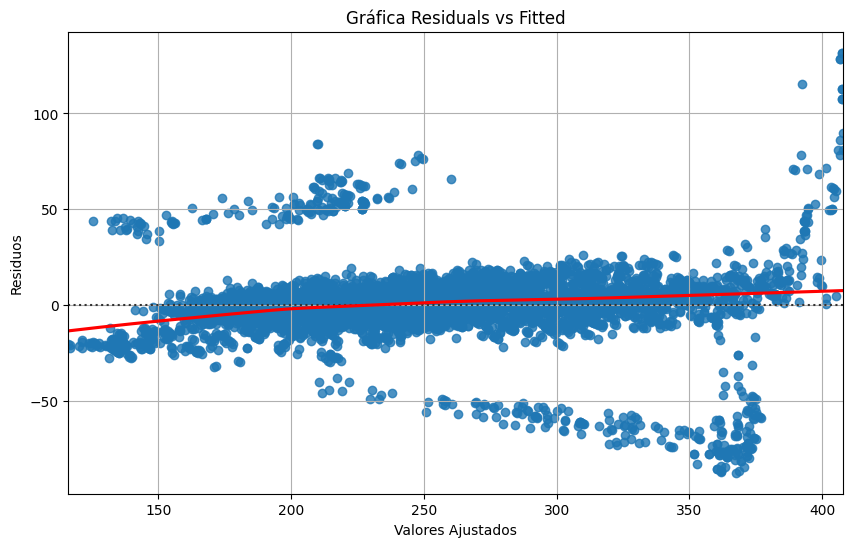

<Figure size 1000x600 with 0 Axes>

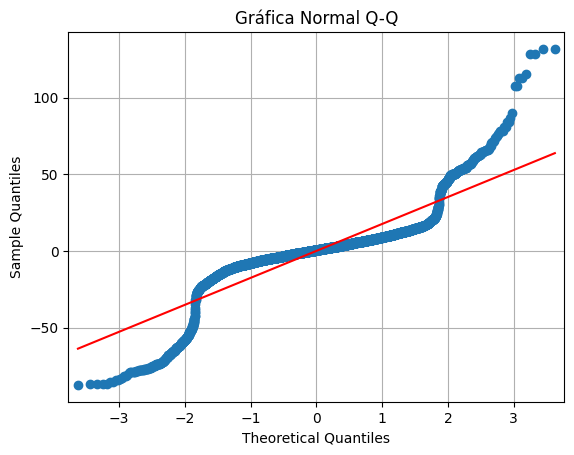

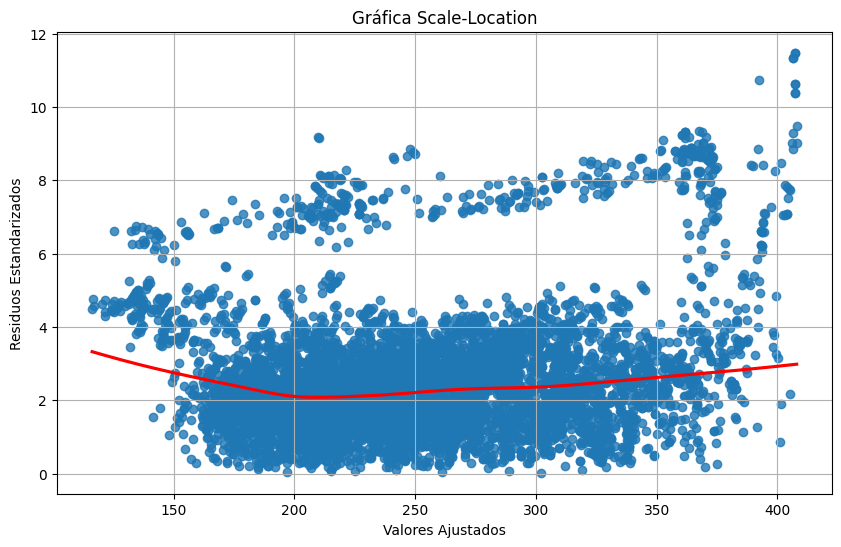

<Figure size 1500x600 with 0 Axes>

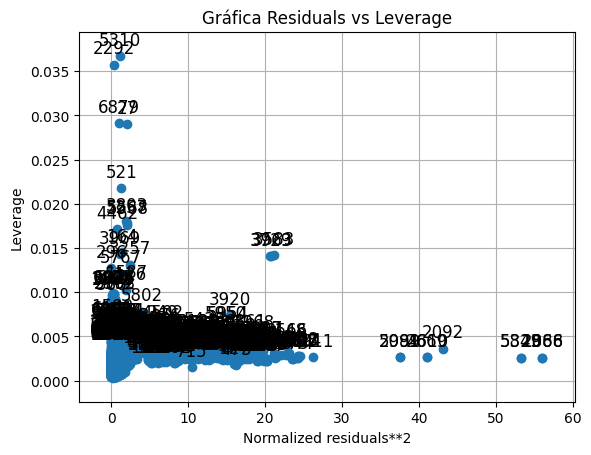

In [ ]:
# Obtener predicciones y residuos para los datos de entrenamiento
fitted_values = y_pred_trainLR
residuals = y_train - fitted_values

# Gráfica 1: Residuals vs Fitted (Residuos vs Ajustados)
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Gráfica Residuals vs Fitted')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

# Gráfica 2: Gráfica Normal Q-Q
plt.figure(figsize=(10, 6))
qqplot(residuals, line='s')
plt.title('Gráfica Normal Q-Q')
plt.grid(True)
plt.show()

# Gráfica 3: Scale-Location (Residuos estandarizados vs Ajustados)
plt.figure(figsize=(10, 6))
standardized_residuals = np.sqrt(np.abs(residuals))
sns.regplot(x=fitted_values, y=standardized_residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Gráfica Scale-Location')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estandarizados')
plt.grid(True)
plt.show()

# Gráfica 4: Residuals vs Leverage (usando OLS para obtener el leverage)
# Para obtener los valores de leverage se usa OLS, ya que Lasso no ofrece leverage directamente
X_train_with_const = sm.add_constant(X_train_scale)
ols_model = sm.OLS(y_train, X_train_with_const).fit()

plt.figure(figsize=(15, 6))
sm.graphics.plot_leverage_resid2(ols_model)
plt.title('Gráfica Residuals vs Leverage')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import kstest, norm

# Prueba de Kolmogorov-Smirnov para normalidad de los residuos
ks_stat, p_value = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))

print(f'Estadístico de Kolmogorov-Smirnov: {ks_stat}')
print(f'Valor p: {p_value}')

Estadístico de Kolmogorov-Smirnov: 0.170568542844804
Valor p: 5.674409743632866e-177


Según el estadístico de Kolmogorov-Smirnov p_value es mayor a 0.05 entonces se acepta la hipótesis nula

Ho: Los datos siguen una distribución normal

H1: Los datos no siguen una distribución normal

In [ ]:
# Ahora, ajustar el modelo de regresión con statsmodels para obtener AIC y BIC
# Añadir una columna de constante para el intercepto
X_train_sm = sm.add_constant(X_train_scale)

# Ajustar el modelo OLS usando los coeficientes de Lasso como aproximación
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Obtener el summary del modelo
summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     6634.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:01:16   Log-Likelihood:                -29742.
No. Observations:                6939   AIC:                         5.951e+04
Df Residuals:                    6927   BIC:                         5.959e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        252.8530      0.211   1196.441      0.0

In [ ]:
# Redondeando el resultado de predicciones train para convertirlo a entero
y = np.rint(y_pred_trainLR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_trainLR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_trainLR[y_pred_trainLR< 0] = 0
y_pred_trainLR

array([209, 180, 238, ..., 249, 186, 258])

In [ ]:
# Redondeando el resultado de predicciones test para convertirlo a entero
y = np.rint(y_pred_testLR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_testLR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_testLR[y_pred_testLR< 0] = 0
y_pred_testLR

array([328, 263, 266, ..., 185, 323, 370])

In [ ]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainRF
df_resultadosLR_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainLR})

# Imprimir el DataFrame con los resultados
print(df_resultadosLR_train)

      y_train  y_pred_train
0         214           209
1         188           180
2         252           238
3         375           360
4         298           295
...       ...           ...
6934      251           246
6935      329           328
6936      259           249
6937      188           186
6938      258           258

[6939 rows x 2 columns]


In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosLR_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testLR})

# Imprimir el DataFrame con los resultados
print(df_resultadosLR_test)

      y_test  y_pred_test
0        325          328
1        275          263
2        276          266
3        270          254
4        224          229
...      ...          ...
2970     196          205
2971     151          163
2972     182          185
2973     328          323
2974     370          370

[2975 rows x 2 columns]


In [ ]:
mae_trainLR, mse_trainLR, r2_trainLR, mae_testLR, mse_testLR, r2_testLR = evaluar_modelo(y_train, y_pred_trainLR, y_test, y_pred_testLR)

---- Métricas de train -----
MAE:  9.738290820002883
MSE:  309.49156939040205
r2:  0.9132731082684753

---- Métricas de test -----
MAE:  9.156302521008403
MSE:  268.11563025210086
r2:  0.9230719548313032


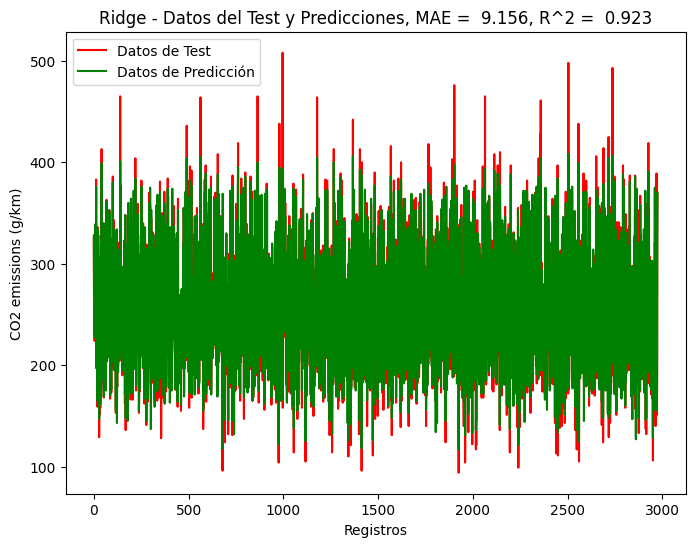

In [ ]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testLR, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Ridge - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testLR, r2_testLR))
plt.legend()
plt.show()

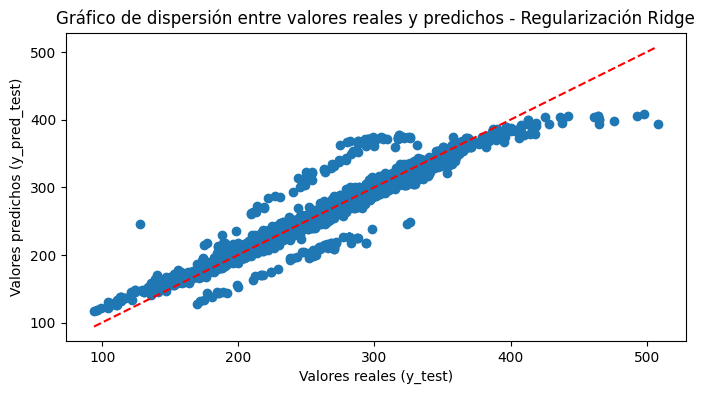

In [ ]:
# Gráfica entre Y_B vs Y_pred con la recta identidad

plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_testLR) #,alpha=0.7)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (y_pred_test)")
plt.title("Gráfico de dispersión entre valores reales y predichos - Regularización Ridge")

# Agregar la recta identidad
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


### Modelo de Regresión - LinearRegression (Lasso)

In [ ]:
# X_train_scale, X_test_scale, y_train, y_test
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso

In [ ]:
SEED = 45
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressorLR_Lasso = Lasso(random_state=random_state  )
regressorLR_Lasso

Lasso(random_state=45)

In [ ]:
# Rango de valores para el hiperparámetro 'alpha' (regularización L1):
param_distLasso = {'alpha': np.linspace(0.001, 10, 100)}

In [ ]:
# RandomizedSearchCV
random_search_Lasso = RandomizedSearchCV(estimator=regressorLR_Lasso, param_distributions=param_distLasso,
                                         n_iter=100, cv=10, #scoring='neg_mean_squared_error',
                                         n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_Lasso.fit(X_train_scale, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=Lasso(random_state=45), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'alpha': array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324...
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01])},
                   random_state=45, verbose=4)

In [ ]:
# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search_Lasso.best_params_)

# Mejor estimador encontrado
print("Mejor estimador encontrado:")
print(random_search_Lasso.best_estimator_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_Lasso.best_score_)


Mejores parámetros encontrados:
{'alpha': 0.10200000000000001}
Mejor estimador encontrado:
Lasso(alpha=0.10200000000000001, random_state=45)

Mejor score obtenido:
0.912488204591253


In [ ]:
# Seleccionando los mejores estimadores
best_randomLasso = random_search_Lasso.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomLasso.fit(X = X_train_scale, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainLasso = best_randomLasso.predict(X = X_train_scale)
y_pred_testLasso = best_randomLasso.predict(X = X_test_scale)

In [ ]:
# Obtener los coeficientes y el intercepto del mejor modelo
coeficientesLasso = best_randomLasso.coef_
interceptoLasso = best_randomLasso.intercept_

# numpy.ndarray X convertirlo a dataframe
import pandas as pd
X1 = pd.DataFrame(X)

# Crea un DataFrame para visualizar las características y sus coeficientes
coef_dfLasso = pd.DataFrame({'Indices de columnas': X1.columns, 'Coeficientes': coeficientesLasso})

print("\nCoeficientes de las características:")
print(coef_dfLasso)

print("\nIntercepto del modelo:")
print(interceptoLasso)


Coeficientes de las características:
    Indices de columnas  Coeficientes
0                     0      1.866662
1                     1      7.943993
2                     2      2.100435
3                     3     19.665555
4                     4     16.982660
5                     5     11.327599
6                     6      0.249890
7                     7     -0.239933
8                     8      1.977752
9                     9      6.181202
10                   10     -0.993173

Intercepto del modelo:
252.85300475572876


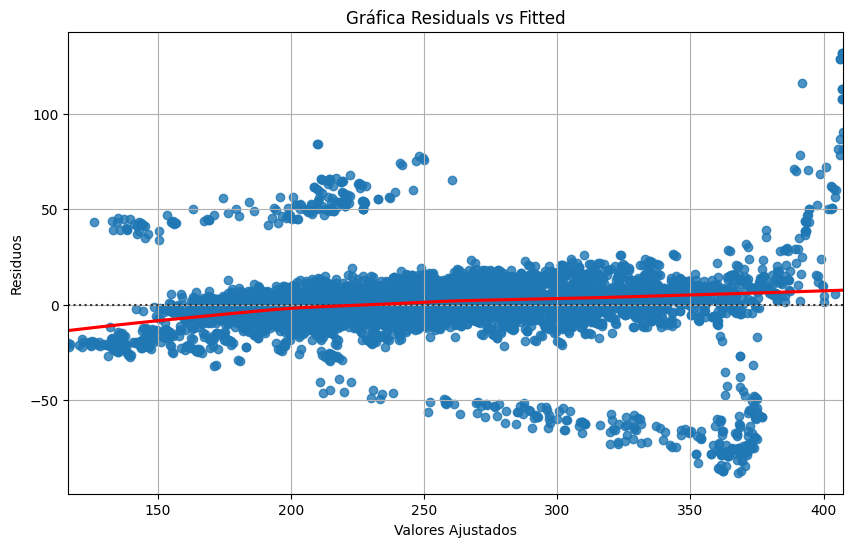

<Figure size 1000x600 with 0 Axes>

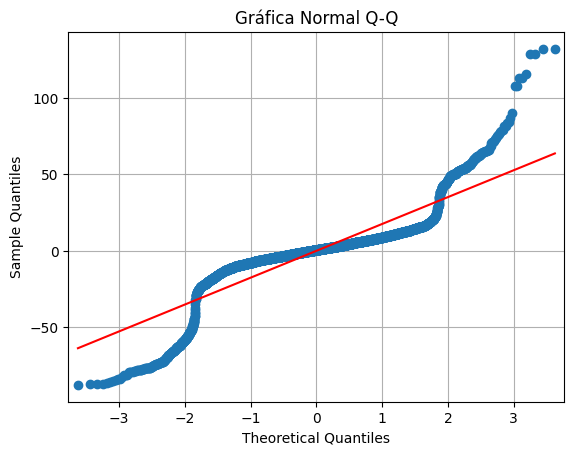

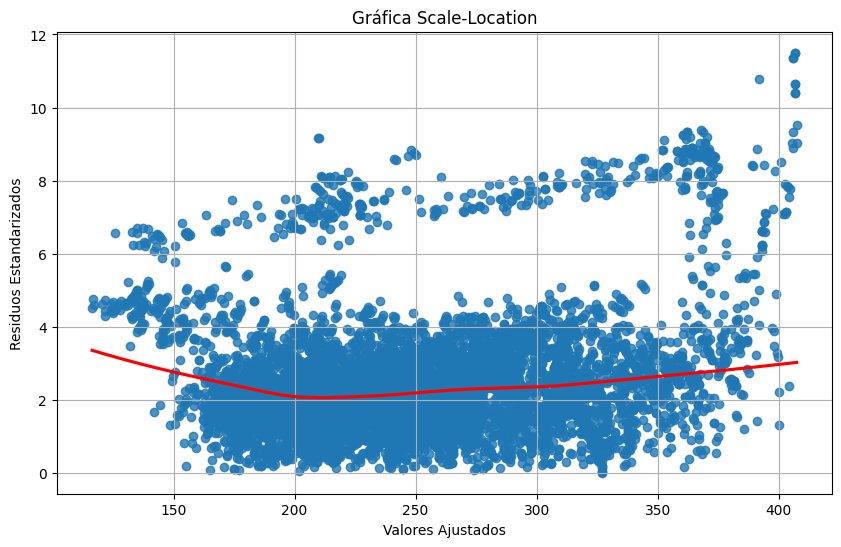

<Figure size 1500x600 with 0 Axes>

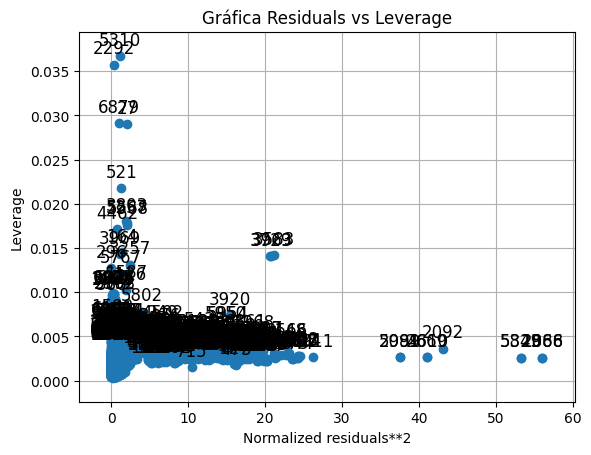

In [ ]:
# Obtener predicciones y residuos para los datos de entrenamiento
fitted_values = y_pred_trainLasso
residuals = y_train - fitted_values

# Gráfica 1: Residuals vs Fitted (Residuos vs Ajustados)
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Gráfica Residuals vs Fitted')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

# Gráfica 2: Gráfica Normal Q-Q
plt.figure(figsize=(10, 6))
qqplot(residuals, line='s')
plt.title('Gráfica Normal Q-Q')
plt.grid(True)
plt.show()

# Gráfica 3: Scale-Location (Residuos estandarizados vs Ajustados)
plt.figure(figsize=(10, 6))
standardized_residuals = np.sqrt(np.abs(residuals))
sns.regplot(x=fitted_values, y=standardized_residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Gráfica Scale-Location')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estandarizados')
plt.grid(True)
plt.show()

# Gráfica 4: Residuals vs Leverage (usando OLS para obtener el leverage)
# Para obtener los valores de leverage se usa OLS, ya que Lasso no ofrece leverage directamente
X_train_with_const = sm.add_constant(X_train_scale)
ols_model = sm.OLS(y_train, X_train_with_const).fit()

plt.figure(figsize=(15, 6))
sm.graphics.plot_leverage_resid2(ols_model)
plt.title('Gráfica Residuals vs Leverage')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import kstest, norm

# Prueba de Kolmogorov-Smirnov para normalidad de los residuos
ks_stat, p_value = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))

print(f'Estadístico de Kolmogorov-Smirnov: {ks_stat}')
print(f'Valor p: {p_value}')

Estadístico de Kolmogorov-Smirnov: 0.17354744922654017
Valor p: 3.1017438565337808e-183


In [ ]:
# Ahora, ajustar el modelo de regresión con statsmodels para obtener AIC y BIC
# Añadir una columna de constante para el intercepto
X_train_sm = sm.add_constant(X_train_scale)

# Ajustar el modelo OLS usando los coeficientes de Lasso como aproximación
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Obtener el summary del modelo
summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     6634.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:01:29   Log-Likelihood:                -29742.
No. Observations:                6939   AIC:                         5.951e+04
Df Residuals:                    6927   BIC:                         5.959e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        252.8530      0.211   1196.441      0.0

In [ ]:
# Redondeando el resultado de predicciones train para convertirlo a entero
y = np.rint(y_pred_trainLasso) # Redondeando
y = y.astype(int) # Cast a int

y_pred_trainLasso = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_trainLasso[y_pred_trainLasso< 0] = 0
y_pred_trainLasso

array([209, 181, 238, ..., 250, 186, 257])

In [ ]:
# Redondeando el resultado de predicciones test para convertirlo a entero
y = np.rint(y_pred_testLasso) # Redondeando
y = y.astype(int) # Cast a int

y_pred_testLasso = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_testLasso[y_pred_testLasso< 0] = 0
y_pred_testLasso

array([328, 264, 266, ..., 185, 323, 370])

In [ ]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainRF
df_resultadosLasso_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainLasso})

# Imprimir el DataFrame con los resultados
print(df_resultadosLasso_train)

      y_train  y_pred_train
0         214           209
1         188           181
2         252           238
3         375           360
4         298           295
...       ...           ...
6934      251           245
6935      329           327
6936      259           250
6937      188           186
6938      258           257

[6939 rows x 2 columns]


In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosLasso_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testLasso})

# Imprimir el DataFrame con los resultados
print(df_resultadosLasso_test)

      y_test  y_pred_test
0        325          328
1        275          264
2        276          266
3        270          254
4        224          228
...      ...          ...
2970     196          205
2971     151          163
2972     182          185
2973     328          323
2974     370          370

[2975 rows x 2 columns]


In [ ]:
mae_trainLasso, mse_trainLasso, r2_trainLasso, mae_testLasso, mse_testLasso, r2_testLasso = evaluar_modelo(y_train, y_pred_trainLasso, y_test, y_pred_testLasso)

---- Métricas de train -----
MAE:  9.693904020752269
MSE:  309.47312292837586
r2:  0.9132782774054509

---- Métricas de test -----
MAE:  9.128403361344537
MSE:  267.8289075630252
r2:  0.9231542216352019


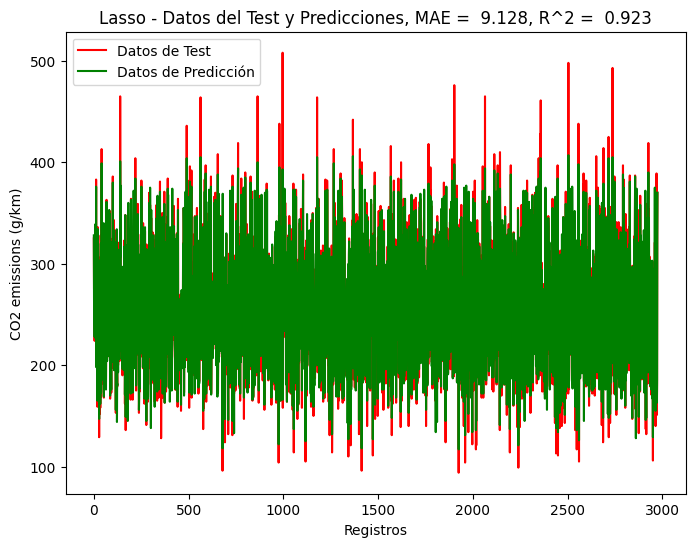

In [ ]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testLasso, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Lasso - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testLasso, r2_testLasso))
plt.legend()
plt.show()

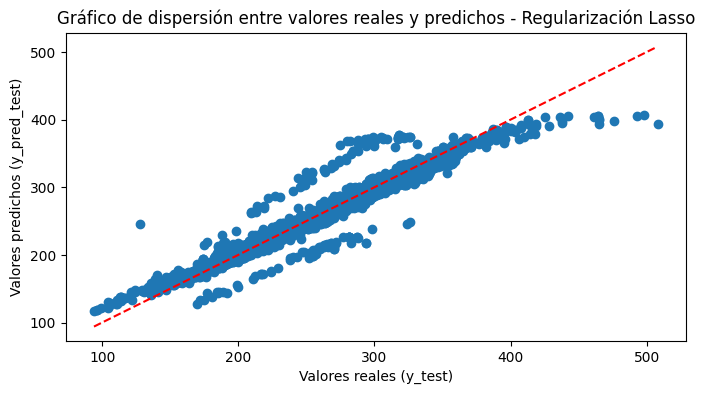

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_testLasso) #,alpha=0.7)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (y_pred_test)")
plt.title("Gráfico de dispersión entre valores reales y predichos - Regularización Lasso")

# Agregar la recta identidad
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Modelo de Regresión - DecisionTreeRegressor

In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
SEED = 45
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressorDTR = DecisionTreeRegressor(random_state=random_state)

In [ ]:
# Parámetros para el Decision Tree Regressor
param_distDTR = {
    "max_features": ['auto', 'sqrt', 'log2'],  # Número de características a considerar para el mejor split
    "max_depth": [None, 2, 4, 6, 8, 10, 12],  # Máximo número de niveles en el árbol
    "min_samples_split": stats.randint(2, 20),  # Mínimo número de muestras requeridas para dividir un nodo
    "min_samples_leaf": stats.randint(1, 20),  # Mínimo número de muestras requeridas para estar en un nodo hoja
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"]  # Función de medida para el split
}

In [ ]:
# RandomizedSearchCV
random_search_DTR = RandomizedSearchCV(estimator=regressorDTR, param_distributions=param_distDTR,
                                       n_iter=50, cv=5, #scoring='neg_mean_squared_error',
                                       n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_DTR.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
85 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=45),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e610e6c49d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e610e698760>},
                   random_state=45, verbose=4)

In [ ]:
# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search_DTR.best_params_)

# Mejor estimador encontrado
print("\n Mejor estimador encontrado:")
print(random_search_DTR.best_estimator_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_DTR.best_score_)


Mejores parámetros encontrados:
{'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 16}

 Mejor estimador encontrado:
DecisionTreeRegressor(criterion='absolute_error', max_depth=12,
                      max_features='log2', min_samples_leaf=2,
                      min_samples_split=16, random_state=45)

Mejor score obtenido:
0.9864679200003186


In [ ]:
# Seleccionando los mejores estimadores
best_randomDTR = random_search_DTR.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomDTR.fit(X = X_train, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainDTR = best_randomDTR.predict(X = X_train)
y_pred_testDTR = best_randomDTR.predict(X = X_test)

In [ ]:
# Redondeando el resultado de predicciones train para convertirlo a entero
y = np.rint(y_pred_trainDTR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_trainDTR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_trainDTR[y_pred_trainDTR< 0] = 0
y_pred_trainDTR

array([213, 188, 252, ..., 259, 185, 258])

In [ ]:
# Redondeando el resultado de predicciones test para convertirlo a entero
y = np.rint(y_pred_testDTR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_testDTR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_testDTR[y_pred_testDTR< 0] = 0
y_pred_testDTR

array([325, 267, 280, ..., 184, 328, 370])

In [ ]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainRF
df_resultadosDTR_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainDTR})

# Imprimir el DataFrame con los resultados
print(df_resultadosDTR_train)


      y_train  y_pred_train
0         214           213
1         188           188
2         252           252
3         375           382
4         298           312
...       ...           ...
6934      251           256
6935      329           331
6936      259           259
6937      188           185
6938      258           258

[6939 rows x 2 columns]


In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosDTR_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testDTR})

# Imprimir el DataFrame con los resultados
print(df_resultadosDTR_test)

      y_test  y_pred_test
0        325          325
1        275          267
2        276          280
3        270          269
4        224          225
...      ...          ...
2970     196          194
2971     151          151
2972     182          184
2973     328          328
2974     370          370

[2975 rows x 2 columns]


In [ ]:
mae_trainDTR, mse_trainDTR, r2_trainDTR, mae_testDTR, mse_testDTR, r2_testDTR = evaluar_modelo(y_train, y_pred_trainDTR, y_test, y_pred_testDTR)

---- Métricas de train -----
MAE:  1.9814094249891916
MSE:  27.233463035019454
r2:  0.9923685365492678

---- Métricas de test -----
MAE:  2.8396638655462185
MSE:  51.098487394957985
r2:  0.9853387631945393


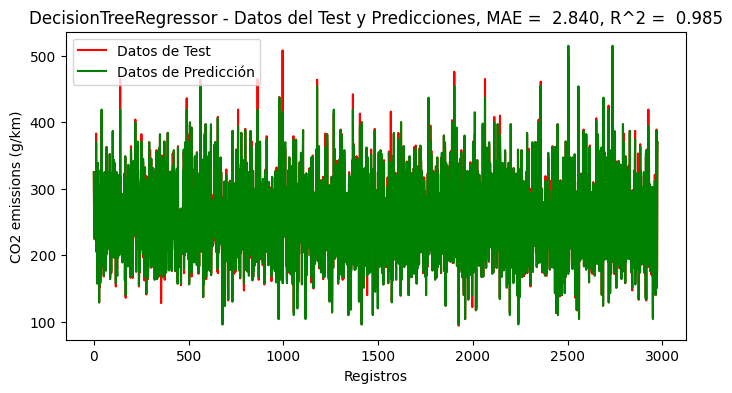

In [ ]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 4))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testDTR, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('DecisionTreeRegressor - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testDTR, r2_testDTR))
plt.legend()
plt.show()

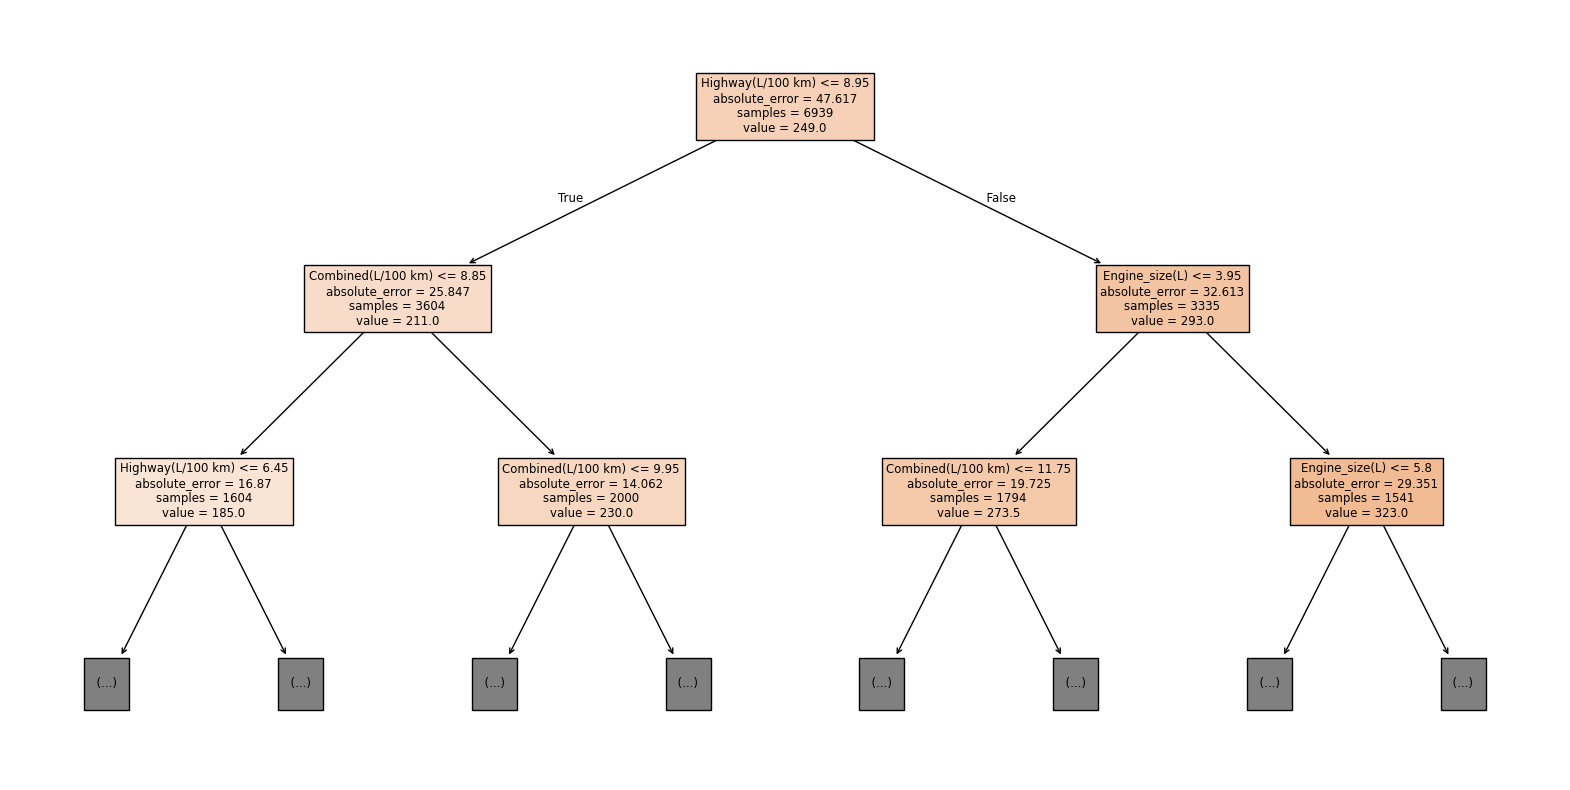

In [ ]:
# Gráfico del arbol con una profundidad de 2
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_randomDTR, max_depth=2, feature_names=df_X.columns, filled=True)
plt.show()

In [ ]:
# Obtener la importancia de las características
importancia_caracteristicas = best_randomDTR.feature_importances_

# Imprimir la importancia de las características
print("Importancia de las características:")
for i, importancia in enumerate(importancia_caracteristicas):
    print(f"{df_X.columns[i]}: {importancia:.3f}")

Importancia de las características:
Model_year: 0.005
Engine_size(L): 0.116
Cylinders: 0.003
City(L/100 km): 0.073
Highway(L/100 km): 0.480
Combined(L/100 km): 0.282
Make_le: 0.004
Model_le: 0.010
Vehicle_class_le: 0.002
Fuel_type_le: 0.021
Transmission_le: 0.004


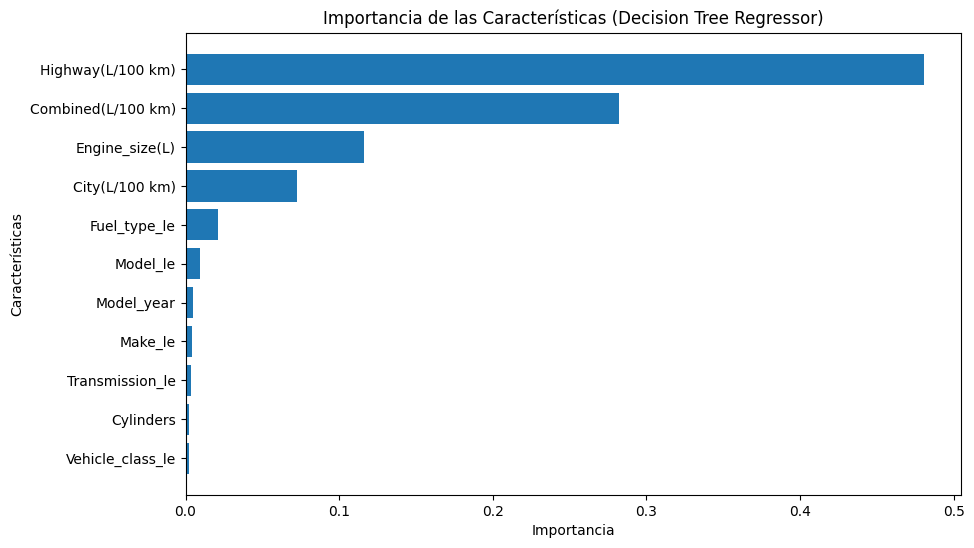

In [ ]:
# Obtener la importancia de las características del mejor modelo de Random Forest
importances = best_randomDTR.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importances = pd.DataFrame({'feature': df_X.columns, 'importance': importances})

# Ordenar el DataFrame por importancia de mayor a menor
feature_importances = feature_importances.sort_values('importance', ascending=True)

# Graficar la importancia de las características en un diagrama de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características (Decision Tree Regressor)')
plt.show()

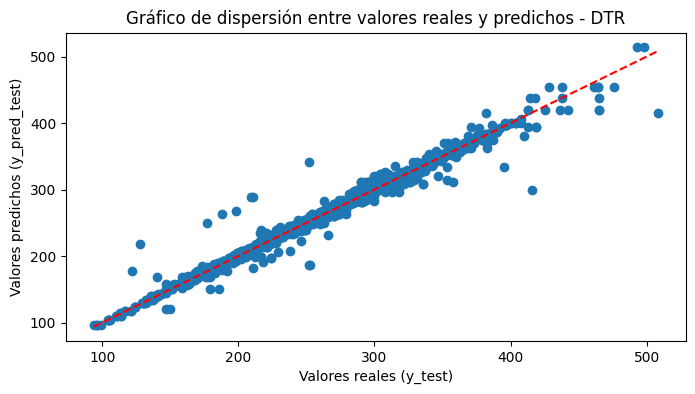

In [ ]:
# Gráfica entre Y_test vs Y_pred con la recta identidad
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_testDTR) #,alpha=0.7)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (y_pred_test)")
plt.title("Gráfico de dispersión entre valores reales y predichos - DTR")

# Agregar la recta identidad
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Modelo de Regresión - RandomForestRegressor

In [ ]:
# X_train, X_test, y_train, y_test
import numpy as np
import scipy.stats as stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
SEED = 45
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressor = RandomForestRegressor(random_state=random_state)
regressor

RandomForestRegressor(random_state=45)

In [ ]:
# Parámetros para el Random Forest
param_distRF = {
    "n_estimators": [4, 8, 16, 32, 64, 128], # Número de árboles en random forest
    "max_features": ['sqrt','log2'], # Features a considerar en el split
    "max_depth": [16, 12, 8, 4, 2, None], # Máximo número de niveles en el árbol
    "min_samples_split": stats.randint(2, 50), # Mínimo número de ejemplos requeridos en el split
    "min_samples_leaf": stats.randint(1, 50), # Mínimo número de ejemplos requeridos en cada leaf node
    "bootstrap": [True, False], # Método de selección de ejemplos para el entrenamiento de cada árbol
    "criterion": ["squared_error", "absolute_error"] # Criterio de evaluación
}

In [ ]:
# RandomizedSearchCV
random_search_RF = RandomizedSearchCV(estimator=regressor, param_distributions=param_distRF,
                                      n_iter=50, cv=5, #scoring='neg_mean_squared_error',
                                      n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=45),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e610e563040>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e610e56a770>,
                                        'n_estimators': [4, 8, 16, 32, 64,
                                                         128]},
                   random_state=45, verbose=4)

In [ ]:
# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search_RF.best_params_)

# Mejor estimador encontrado
print("\n Mejor estimador encontrado:")
print(random_search_RF.best_estimator_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_RF.best_score_)


Mejores parámetros encontrados:
{'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 32}

 Mejor estimador encontrado:
RandomForestRegressor(bootstrap=False, max_depth=12, max_features='log2',
                      min_samples_leaf=7, min_samples_split=4, n_estimators=32,
                      random_state=45)

Mejor score obtenido:
0.993250376414655


In [ ]:
# Seleccionando los mejores estimadores
best_randomRF = random_search_RF.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomRF.fit(X = X_train, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainRF = best_randomRF.predict(X = X_train)
y_pred_testRF = best_randomRF.predict(X = X_test)

In [ ]:
# Redondeando el resultado de predicciones train para convertirlo a entero
y = np.rint(y_pred_trainRF) # Redondeando
y = y.astype(int) # Cast a int

y_pred_trainRF = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_trainRF[y_pred_trainRF< 0] = 0
y_pred_trainRF

array([212, 186, 252, ..., 260, 188, 257])

In [ ]:
# Redondeando el resultado de predicciones test para convertirlo a entero
y = np.rint(y_pred_testRF) # Redondeando
y = y.astype(int) # Cast a int

y_pred_testRF = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_testRF[y_pred_testRF< 0] = 0
y_pred_testRF

array([325, 273, 276, ..., 185, 327, 370])

In [ ]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainRF
df_resultadosRF_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainRF})

# Imprimir el DataFrame con los resultados
print(df_resultadosRF_train)

      y_train  y_pred_train
0         214           212
1         188           186
2         252           252
3         375           374
4         298           299
...       ...           ...
6934      251           253
6935      329           330
6936      259           260
6937      188           188
6938      258           257

[6939 rows x 2 columns]


In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosRF_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testRF})

# Imprimir el DataFrame con los resultados
print(df_resultadosRF_test)

      y_test  y_pred_test
0        325          325
1        275          273
2        276          276
3        270          266
4        224          224
...      ...          ...
2970     196          195
2971     151          152
2972     182          185
2973     328          327
2974     370          370

[2975 rows x 2 columns]


In [ ]:
mae_trainRF, mse_trainRF, r2_trainRF, mae_testRF, mse_testRF, r2_testRF = evaluar_modelo(y_train, y_pred_trainRF, y_test, y_pred_testRF)

---- Métricas de train -----
MAE:  1.5539703127251765
MSE:  13.29168468078974
r2:  0.9962753541218878

---- Métricas de test -----
MAE:  1.9092436974789917
MSE:  21.80235294117647
r2:  0.9937444438048403


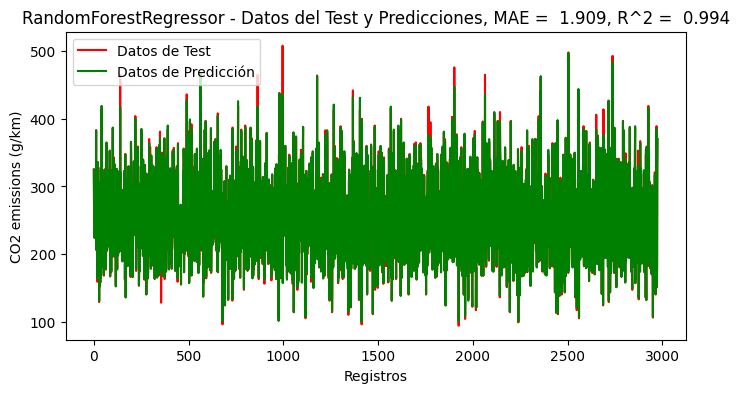

In [ ]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 4))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testRF, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('RandomForestRegressor - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testRF, r2_testRF))
plt.legend()
plt.show()

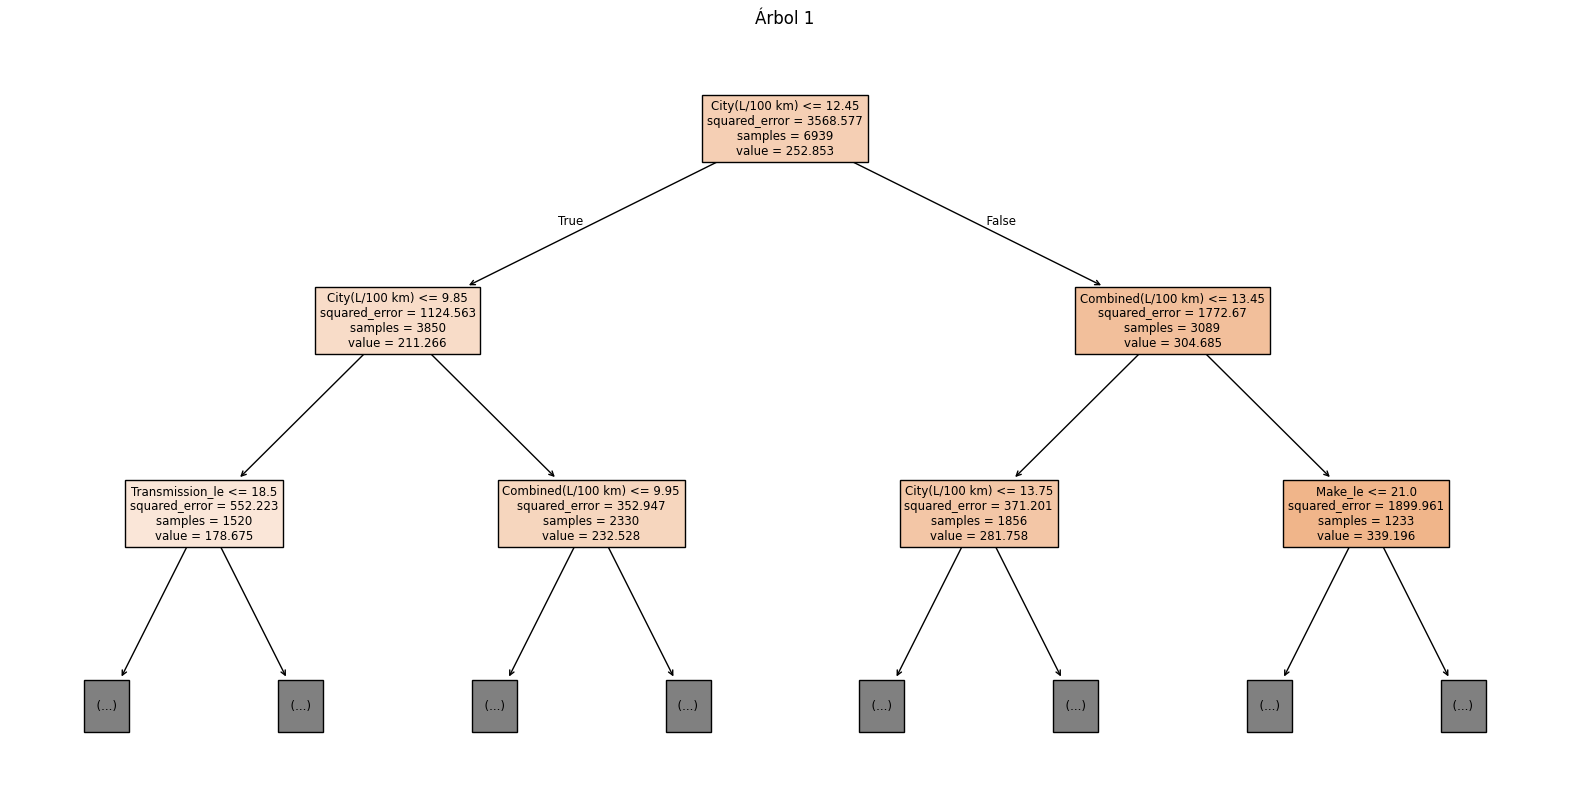

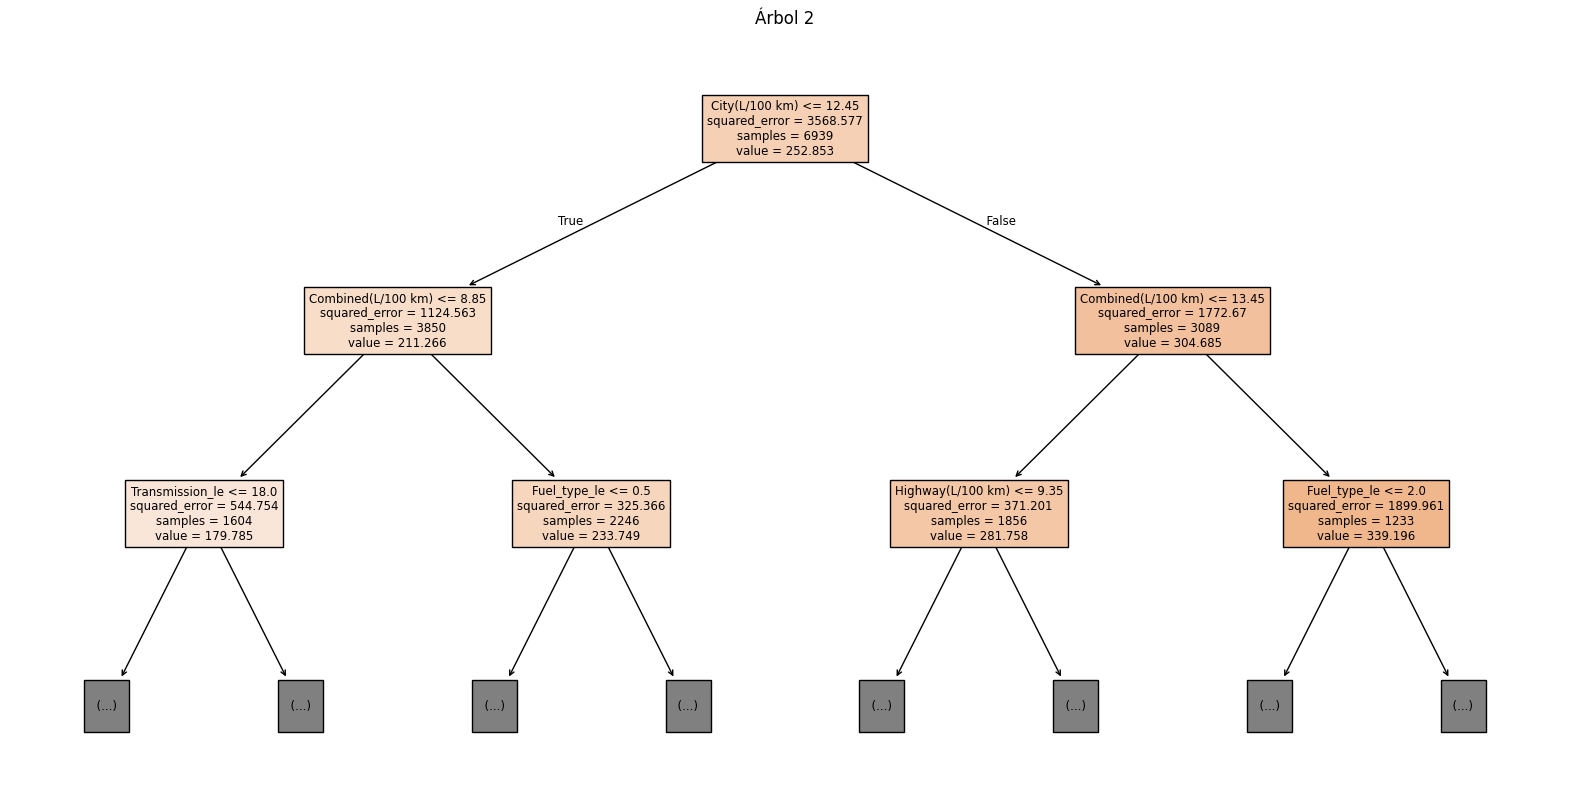

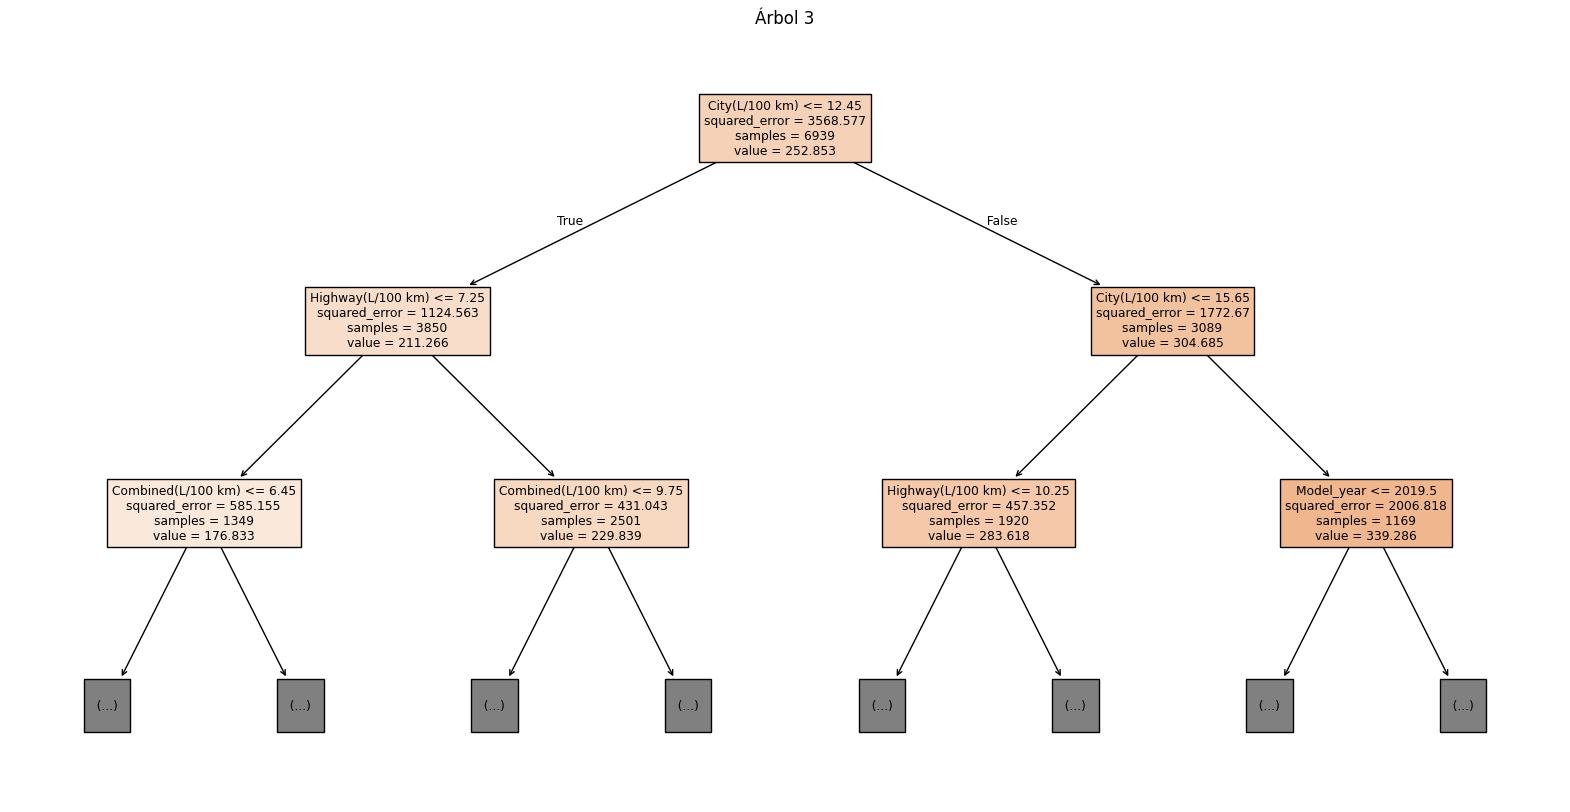

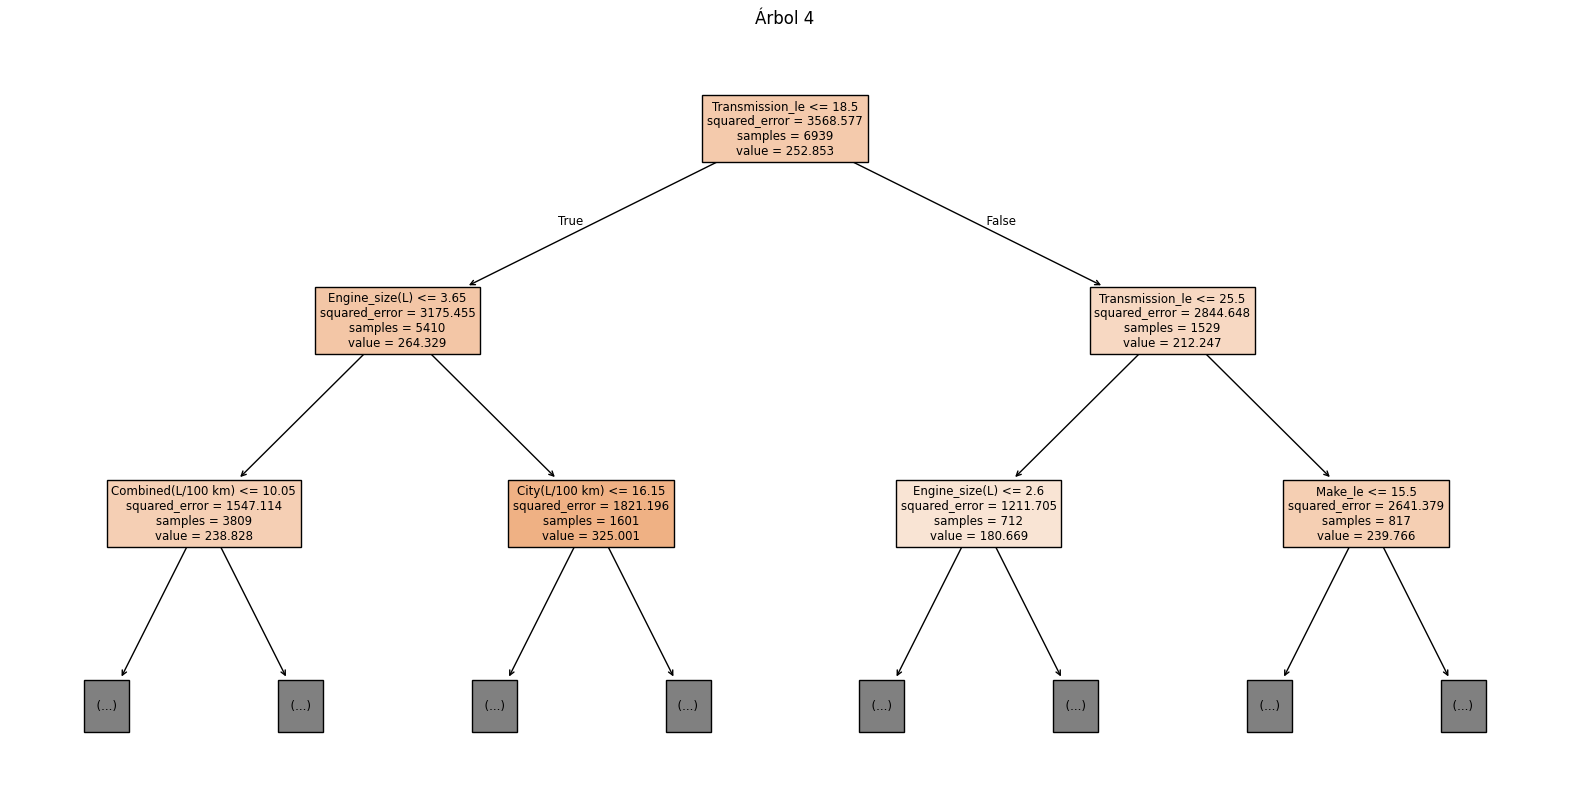

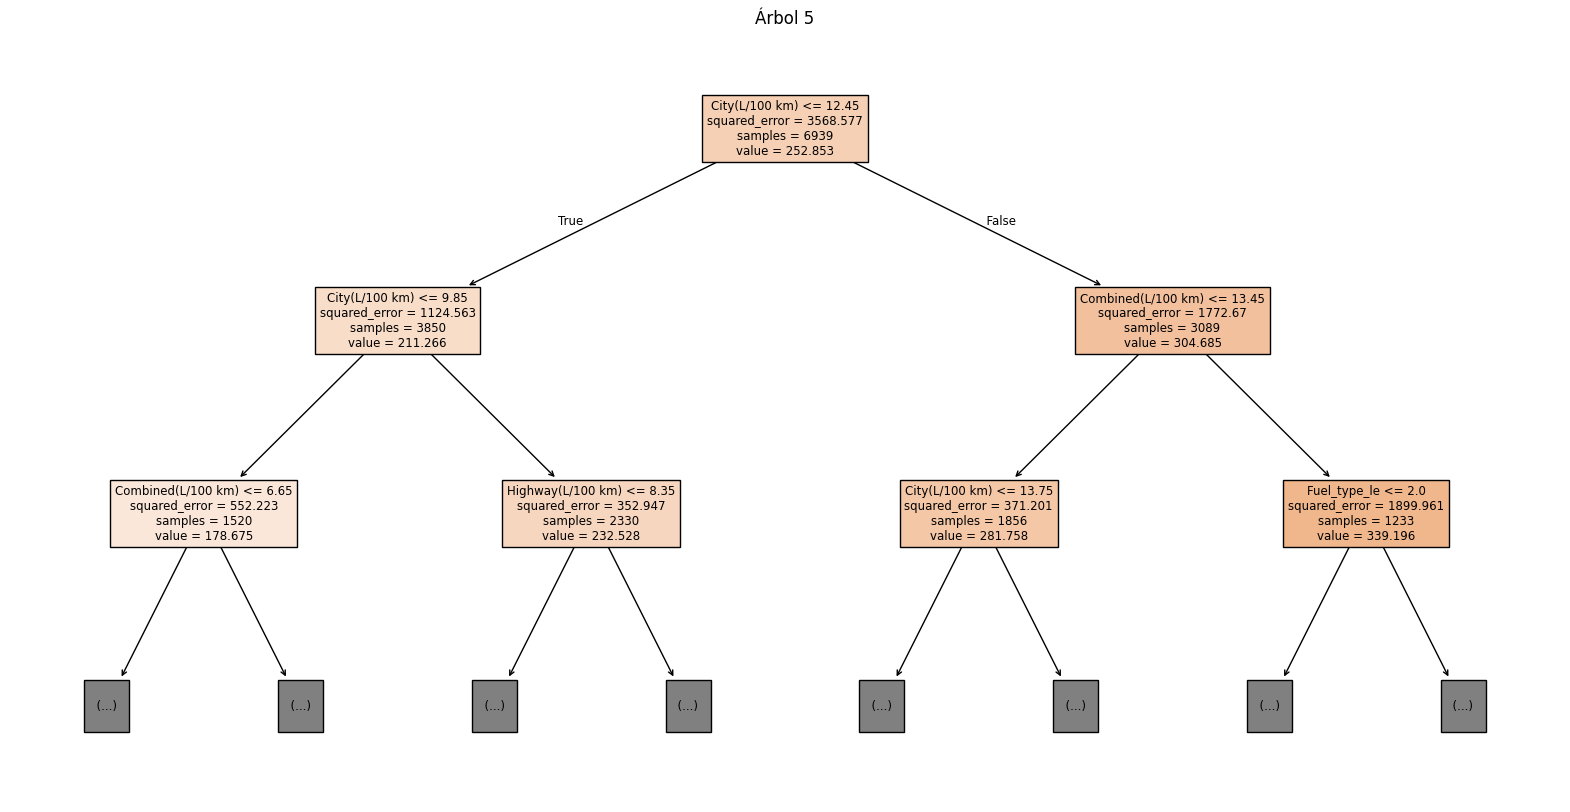

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Obtener los primeros 5 árboles del modelo RandomForest
for i in range(5):
  tree = best_randomRF.estimators_[i]

  # Graficar el árbol
  plt.figure(figsize=(20, 10))
  plot_tree(tree, max_depth=2, feature_names=df_X.columns, filled=True)
  plt.title(f"Árbol {i+1}")
  plt.show()

In [ ]:
# Obtener la importancia de las características
importancia_caracteristicas = best_randomRF.feature_importances_

# Imprimir la importancia de las características
print("Importancia de las características:")
for i, importancia in enumerate(importancia_caracteristicas):
    print(f"{df_X.columns[i]}: {importancia:.3f}")

Importancia de las características:
Model_year: 0.002
Engine_size(L): 0.096
Cylinders: 0.101
City(L/100 km): 0.353
Highway(L/100 km): 0.104
Combined(L/100 km): 0.274
Make_le: 0.005
Model_le: 0.004
Vehicle_class_le: 0.014
Fuel_type_le: 0.026
Transmission_le: 0.020


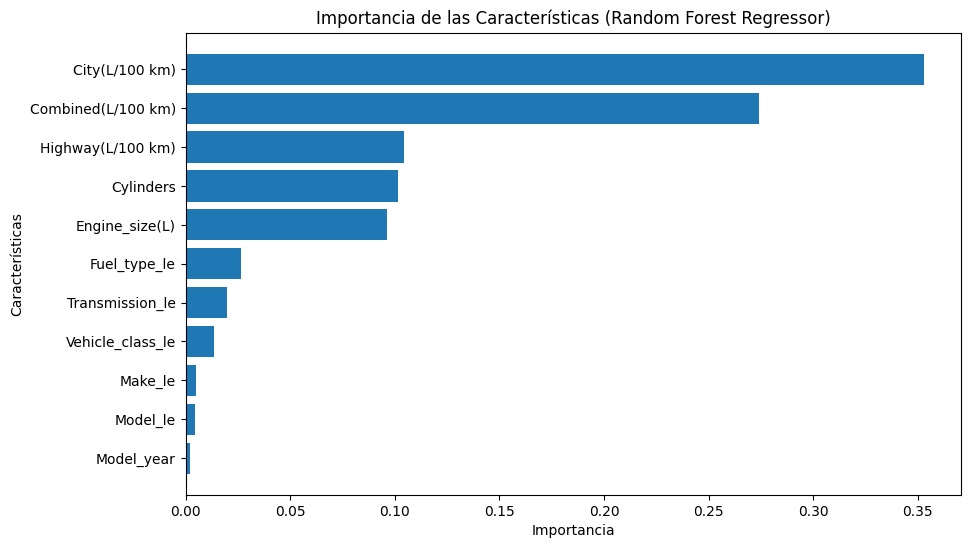

In [ ]:
# Obtener la importancia de las características del mejor modelo de Random Forest
importances = best_randomRF.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importances = pd.DataFrame({'feature': df_X.columns, 'importance': importances})

# Ordenar el DataFrame por importancia de mayor a menor
feature_importances = feature_importances.sort_values('importance', ascending=True)

# Graficar la importancia de las características en un diagrama de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características (Random Forest Regressor)')
plt.show()

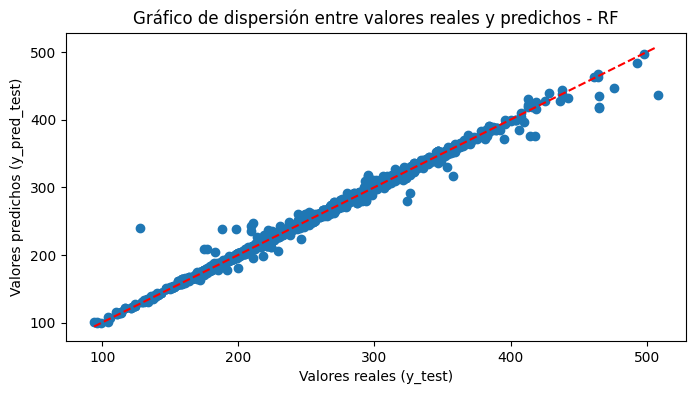

In [ ]:
# Gráfica entre Y_test vs Y_pred con la recta identidad
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_testRF) #,alpha=0.7)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (y_pred_test)")
plt.title("Gráfico de dispersión entre valores reales y predichos - RF")

# Agregar la recta identidad
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Modelo de Regresión - SVR

In [ ]:
# Define el scaler
scaler = StandardScaler()

# Fit el training dataset
scaler.fit(X_train)

# Scale el training dataset
X_train_scale = scaler.transform(X_train)

# Scale the test dataset
X_test_scale = scaler.transform(X_test)

In [ ]:
# X_train_scale, X_test_scale, y_train, y_test
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

In [ ]:
SEED = 45
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressorSVR = SVR( )
regressorSVR

SVR()

In [ ]:
# Parámetros para el SVR
param_distSVR = {
    "C": stats.uniform(1, 100),  # Penalty parameter C of the error term
    "epsilon": stats.uniform(0, 1),  # Epsilon in the epsilon-SVR model
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  # Specifies the kernel type to be used in the algorithm
    "degree": stats.randint(2, 5),  # Degree of the polynomial kernel function ('poly')
    "gamma": ["scale", "auto"]  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

In [ ]:
# RandomizedSearchCV
random_search_SVR = RandomizedSearchCV(estimator=regressorSVR, param_distributions=param_distSVR,
                                       n_iter=50, cv=2, #scoring='neg_mean_squared_error',
                                       n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_SVR.fit(X_train_scale, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=2, estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e60685081f0>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e6068509f00>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e606b0701f0>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=45, verbose=4)

In [ ]:
# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search_SVR.best_params_)

# Mejor estimador encontrado
print("\nMejor estimador encontrado:")
print(random_search_SVR.best_estimator_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_SVR.best_score_)


Mejores parámetros encontrados:
{'C': 82.93441575964331, 'degree': 4, 'epsilon': 0.9760033158175416, 'gamma': 'scale', 'kernel': 'rbf'}

Mejor estimador encontrado:
SVR(C=82.93441575964331, degree=4, epsilon=0.9760033158175416)

Mejor score obtenido:
0.9937677027289333


In [ ]:
# Seleccionando los mejores estimadores
best_randomSVR = random_search_SVR.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomSVR.fit(X = X_train_scale, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainSVR = best_randomSVR.predict(X = X_train_scale)
y_pred_testSVR = best_randomSVR.predict(X = X_test_scale)

In [ ]:
# Redondeando el resultado de predicciones train para convertirlo a entero
y = np.rint(y_pred_trainSVR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_trainSVR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_trainSVR[y_pred_trainSVR< 0] = 0
y_pred_trainSVR

array([213, 187, 251, ..., 260, 189, 258])

In [ ]:
# Redondeando el resultado de predicciones test para convertirlo a entero
y = np.rint(y_pred_testSVR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_testSVR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_testSVR[y_pred_testSVR< 0] = 0
y_pred_testSVR

array([325, 273, 276, ..., 182, 326, 375])

In [ ]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainRF
df_resultadosSVR_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainSVR})

# Imprimir el DataFrame con los resultados
print(df_resultadosSVR_train)

      y_train  y_pred_train
0         214           213
1         188           187
2         252           251
3         375           378
4         298           299
...       ...           ...
6934      251           250
6935      329           329
6936      259           260
6937      188           189
6938      258           258

[6939 rows x 2 columns]


In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosSVR_test = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_testSVR})

# Imprimir el DataFrame con los resultados
print(df_resultadosSVR_test)

      y_test  y_pred
0        325     325
1        275     273
2        276     276
3        270     269
4        224     224
...      ...     ...
2970     196     195
2971     151     151
2972     182     182
2973     328     326
2974     370     375

[2975 rows x 2 columns]


In [ ]:
mae_trainSVR, mse_trainSVR, r2_trainSVR, mae_testSVR, mse_testSVR, r2_testSVR = evaluar_modelo(y_train, y_pred_trainSVR, y_test, y_pred_testSVR)

---- Métricas de train -----
MAE:  1.2604121631358984
MSE:  11.25868280732094
r2:  0.9968450495540367

---- Métricas de test -----
MAE:  1.5018487394957982
MSE:  19.035966386554623
r2:  0.9945381786185395


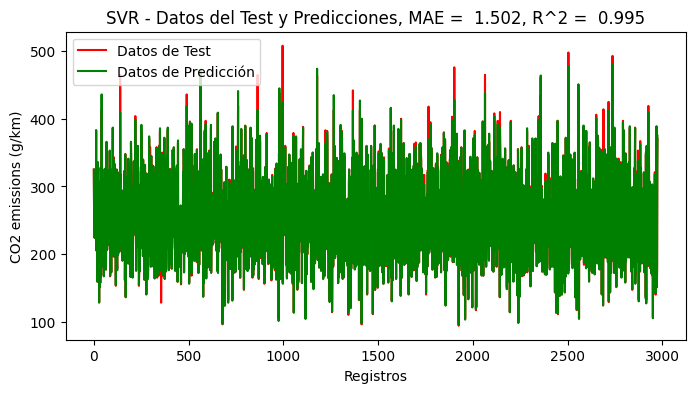

In [ ]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 4))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testSVR, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('SVR - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testSVR, r2_testSVR))
plt.legend()
plt.show()

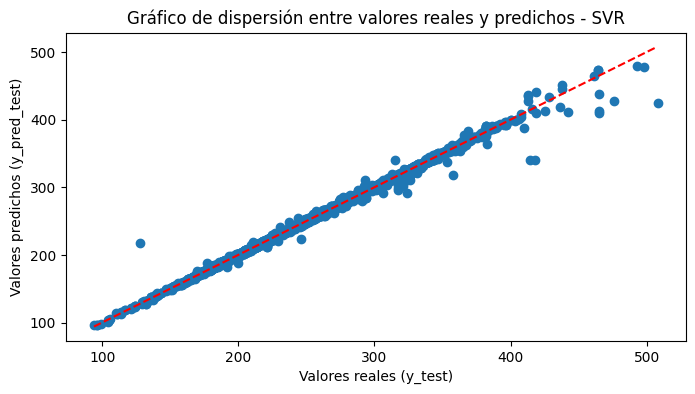

In [ ]:
# Gráfica entre Y_test vs Y_pred con la recta identidad
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_testSVR) #,alpha=0.7)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (y_pred_test)")
plt.title("Gráfico de dispersión entre valores reales y predichos - SVR")

# Agregar la recta identidad
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Modelo de Regresión - GradientBoostingRegressor

In [ ]:
# importa GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
SEED = 45
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressor = GradientBoostingRegressor(random_state=random_state)
regressor

GradientBoostingRegressor(random_state=45)

In [ ]:
# parámetros en el dicionario param_distGBR puedo poner para luego usar RandomSearchCV

param_distGBR = {
    "n_estimators": [50, 100, 200, 300],  # Número de árboles en el ensamble
    "learning_rate": [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    "max_depth": [3, 4, 5],  # Profundidad máxima de cada árbol
    "min_samples_split": [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4],  # Número mínimo de muestras en una hoja
    "subsample": [0.8, 0.9, 1.0],  # Fracción de muestras utilizadas para entrenar cada árbol
    "loss": ["squared_error", "absolute_error", "huber"]  # Función de pérdida
}

In [ ]:
# RandomizedSearchCV
random_search_GBR = RandomizedSearchCV(estimator=regressor, param_distributions=param_distGBR,
                                      n_iter=50, cv=5, #scoring='neg_mean_squared_error',
                                      n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_GBR.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=45),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber'],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=45, verbose=4)

In [ ]:
# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search_GBR.best_params_)

# Mejor estimador encontrado
print("\n Mejor estimador encontrado:")
print(random_search_GBR.best_estimator_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_GBR.best_score_)


Mejores parámetros encontrados:
{'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'loss': 'squared_error', 'learning_rate': 0.2}

 Mejor estimador encontrado:
GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                          n_estimators=300, random_state=45, subsample=0.8)

Mejor score obtenido:
0.9976386633981139


In [ ]:
# Seleccionando los mejores estimadores
best_randomGBR = random_search_GBR.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomGBR.fit(X = X_train, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainGBR = best_randomGBR.predict(X = X_train)
y_pred_testGBR = best_randomGBR.predict(X = X_test)

In [ ]:
# Redondeando el resultado de predicciones train para convertirlo a entero
y = np.rint(y_pred_trainGBR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_trainGBR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_trainGBR[y_pred_trainGBR< 0] = 0
y_pred_trainGBR

array([214, 188, 251, ..., 260, 187, 258])

In [ ]:
# Redondeando el resultado de predicciones test para convertirlo a entero
y = np.rint(y_pred_testGBR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_testGBR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_testGBR[y_pred_testGBR< 0] = 0
y_pred_testGBR

In [ ]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainGBR
df_resultadosGBR_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainGBR})

# Imprimir el DataFrame con los resultados
print(df_resultadosGBR_train)

In [254]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosGBR_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testGBR})

# Imprimir el DataFrame con los resultados
print(df_resultadosGBR_test)

      y_test  y_pred_test
0        325          325
1        275          274
2        276          277
3        270          270
4        224          224
...      ...          ...
2970     196          194
2971     151          152
2972     182          182
2973     328          328
2974     370          370

[2975 rows x 2 columns]


In [255]:
mae_trainGBR, mse_trainGBR, r2_trainGBR, mae_testGBR, mse_testGBR, r2_testGBR = evaluar_modelo(y_train, y_pred_trainGBR, y_test, y_pred_testGBR)

---- Métricas de train -----
MAE:  0.5718403228130855
MSE:  0.9845799106499495
r2:  0.9997240973139263

---- Métricas de test -----
MAE:  1.1428571428571428
MSE:  10.9290756302521
r2:  0.9968642170434241


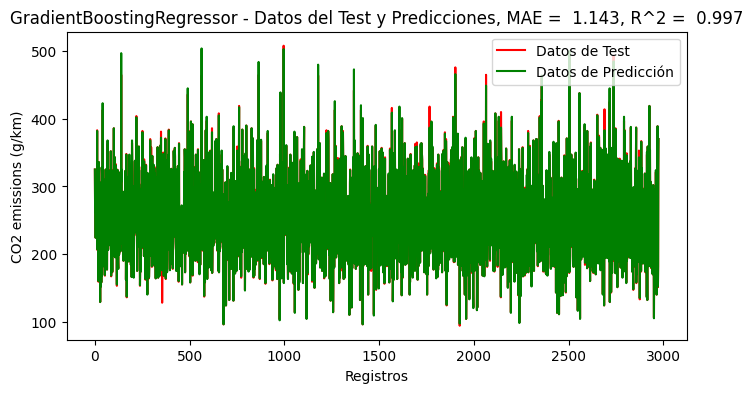

In [256]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 4))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testGBR, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('GradientBoostingRegressor - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testGBR, r2_testGBR))
plt.legend()
plt.show()

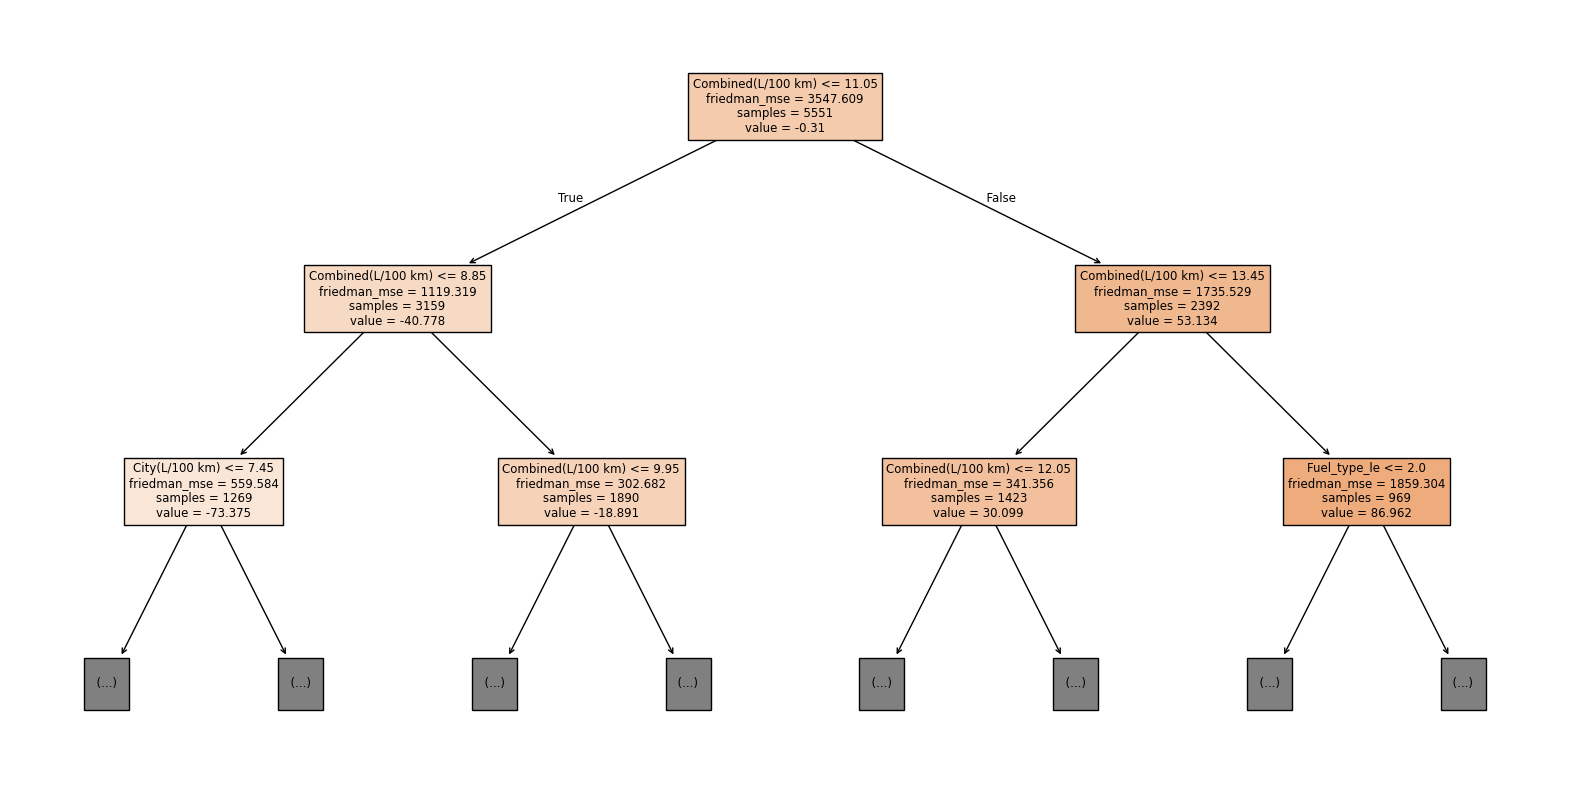

In [257]:
# Graficar el árbol del mejor modelo de GradientBoostingRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_randomGBR.estimators_[0,0], max_depth=2, feature_names=df_X.columns, filled=True)
plt.show()

In [258]:
# Obtener la importancia de las características
importancia_caracteristicas = best_randomGBR.feature_importances_

# Imprimir la importancia de las características
print("Importancia de las características:")
for i, importancia in enumerate(importancia_caracteristicas):
    print(f"{df_X.columns[i]}: {importancia:.3f}")

Importancia de las características:
Model_year: 0.002
Engine_size(L): 0.002
Cylinders: 0.000
City(L/100 km): 0.017
Highway(L/100 km): 0.003
Combined(L/100 km): 0.925
Make_le: 0.000
Model_le: 0.003
Vehicle_class_le: 0.001
Fuel_type_le: 0.048
Transmission_le: 0.000


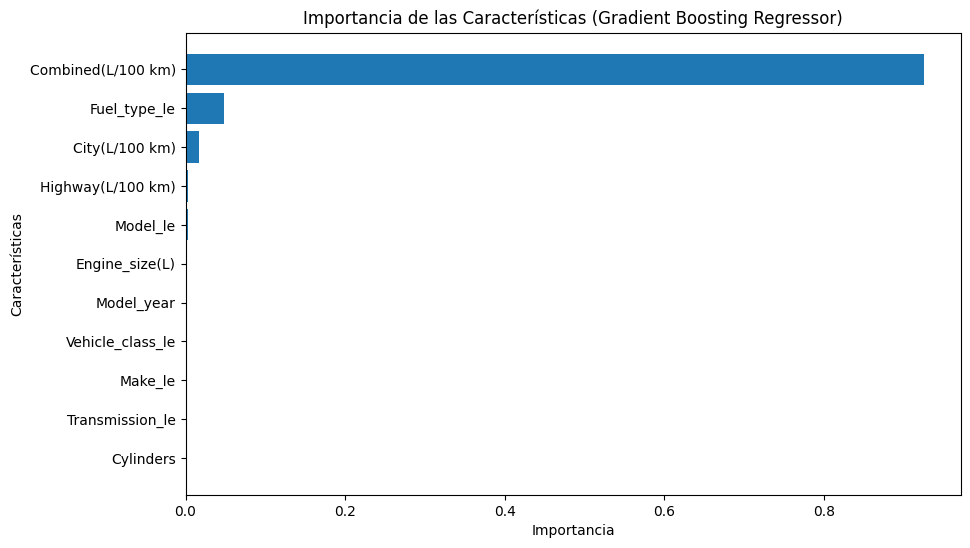

In [287]:
# Obtener la importancia de las características del mejor modelo de Random Forest
importances = best_randomGBR.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importances = pd.DataFrame({'feature': df_X.columns, 'importance': importances})

# Ordenar el DataFrame por importancia de mayor a menor
feature_importances = feature_importances.sort_values('importance', ascending=True)

# Graficar la importancia de las características en un diagrama de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características (Gradient Boosting Regressor)')
plt.show()

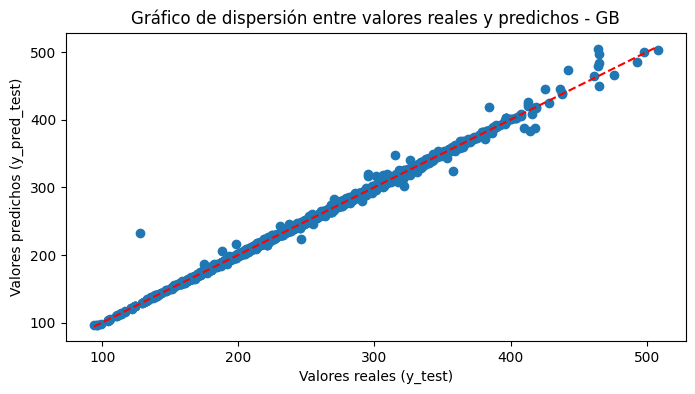

In [ ]:
# Gráfica entre Y_test vs Y_pred con la recta identidad
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_testGBR) #,alpha=0.7)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (y_pred_test)")
plt.title("Gráfico de dispersión entre valores reales y predichos - GB")

# Agregar la recta identidad
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

## Interpretación y Resultados

In [ ]:
# Imports de librería
import pandas as pd

# Crear el diccionario
resultado_modeloLR = {
    'Modelo': '1',
    'Algoritmo': 'Ridge',
    'MAE_train': mae_trainLR,
    'MSE_train': mse_trainLR,
    'R2_train': r2_trainLR,
    'MAE_test': mae_testLR,
    'MSE_test': mse_testLR,
    'R2:test': r2_testLR
}

# Crear el DataFrame a partir del diccionario
dataframeModels = pd.DataFrame([resultado_modeloLR])
dataframeModels

Modelo Algoritmo  MAE_train   MSE_train  R2_train  MAE_test   MSE_test  \
0      1     Ridge   9.738291  309.491569  0.913273  9.156303  268.11563   

    R2:test  
0  0.923072

In [ ]:
# Crear el diccionario
resultado_modeloLasso = {
    'Modelo': '2',
    'Algoritmo': 'Lasso',
    'MAE_train': mae_trainLasso,
    'MSE_train': mse_trainLasso,
    'R2_train': r2_trainLasso,
    'MAE_test': mae_testLasso,
    'MSE_test': mse_testLasso,
    'R2:test': r2_testLasso
}

# Agrega un registro al DataFrame a partir del diccionario
dataframeModels = pd.concat([dataframeModels, pd.DataFrame([resultado_modeloLasso])], ignore_index=True)
dataframeModels

Modelo Algoritmo  MAE_train   MSE_train  R2_train  MAE_test    MSE_test  \
0      1     Ridge   9.738291  309.491569  0.913273  9.156303  268.115630   
1      2     Lasso   9.693904  309.473123  0.913278  9.128403  267.828908   

    R2:test  
0  0.923072  
1  0.923154

In [ ]:
# Crear el diccionario
resultado_modeloDTR = {
    'Modelo': '3',
    'Algoritmo': 'DTR',
    'MAE_train': mae_trainDTR,
    'MSE_train': mse_trainDTR,
    'R2_train': r2_trainDTR,
    'MAE_test': mae_testDTR,
    'MSE_test': mse_testDTR,
    'R2:test': r2_testDTR
}

# Agrega un registro al DataFrame a partir del diccionario
dataframeModels = pd.concat([dataframeModels, pd.DataFrame([resultado_modeloDTR])], ignore_index=True)
dataframeModels

Modelo Algoritmo  MAE_train   MSE_train  R2_train  MAE_test    MSE_test  \
0      1     Ridge   9.738291  309.491569  0.913273  9.156303  268.115630   
1      2     Lasso   9.693904  309.473123  0.913278  9.128403  267.828908   
2      3       DTR   1.981409   27.233463  0.992369  2.839664   51.098487   

    R2:test  
0  0.923072  
1  0.923154  
2  0.985339

In [ ]:
# Crear el diccionario
resultado_modeloRF = {
    'Modelo': '4',
    'Algoritmo': 'RF',
    'MAE_train': mae_trainRF,
    'MSE_train': mse_trainRF,
    'R2_train': r2_trainRF,
    'MAE_test': mae_testRF,
    'MSE_test': mse_testRF,
    'R2:test': r2_testRF
}

# Agrega un registro al DataFrame a partir del diccionario
dataframeModels = pd.concat([dataframeModels, pd.DataFrame([resultado_modeloRF])], ignore_index=True)
dataframeModels

Modelo Algoritmo  MAE_train   MSE_train  R2_train  MAE_test    MSE_test  \
0      1     Ridge   9.738291  309.491569  0.913273  9.156303  268.115630   
1      2     Lasso   9.693904  309.473123  0.913278  9.128403  267.828908   
2      3       DTR   1.981409   27.233463  0.992369  2.839664   51.098487   
3      4        RF   1.553970   13.291685  0.996275  1.909244   21.802353   

    R2:test  
0  0.923072  
1  0.923154  
2  0.985339  
3  0.993744

In [ ]:
# Crear el diccionario
resultado_modeloSVR = {
    'Modelo': '5',
    'Algoritmo': 'SVR',
    'MAE_train': mae_trainSVR,
    'MSE_train': mse_trainSVR,
    'R2_train': r2_trainSVR,
    'MAE_test': mae_testSVR,
    'MSE_test': mse_testSVR,
    'R2:test': r2_testSVR
}

# Agrega un registro al DataFrame a partir del diccionario
dataframeModels = pd.concat([dataframeModels, pd.DataFrame([resultado_modeloSVR])], ignore_index=True)
dataframeModels

Modelo Algoritmo  MAE_train   MSE_train  R2_train  MAE_test    MSE_test  \
0      1     Ridge   9.738291  309.491569  0.913273  9.156303  268.115630   
1      2     Lasso   9.693904  309.473123  0.913278  9.128403  267.828908   
2      3       DTR   1.981409   27.233463  0.992369  2.839664   51.098487   
3      4        RF   1.553970   13.291685  0.996275  1.909244   21.802353   
4      5       SVR   1.260412   11.258683  0.996845  1.501849   19.035966   

    R2:test  
0  0.923072  
1  0.923154  
2  0.985339  
3  0.993744  
4  0.994538

In [ ]:
# Crear el diccionario
resultado_modeloGBR = {
    'Modelo': '6',
    'Algoritmo': 'GB',
    'MAE_train': mae_trainGBR,
    'MSE_train': mse_trainGBR,
    'R2_train': r2_trainGBR,
    'MAE_test': mae_testGBR,
    'MSE_test': mse_testGBR,
    'R2:test': r2_testGBR
}

# Agrega un registro al DataFrame a partir del diccionario
dataframeModels = pd.concat([dataframeModels, pd.DataFrame([resultado_modeloGBR])], ignore_index=True)
dataframeModels

Modelo Algoritmo  MAE_train   MSE_train  R2_train  MAE_test    MSE_test  \
0      1     Ridge   9.738291  309.491569  0.913273  9.156303  268.115630   
1      2     Lasso   9.693904  309.473123  0.913278  9.128403  267.828908   
2      3       DTR   1.981409   27.233463  0.992369  2.839664   51.098487   
3      4        RF   1.553970   13.291685  0.996275  1.909244   21.802353   
4      5       SVR   1.260412   11.258683  0.996845  1.501849   19.035966   
5      6        GB   0.571840    0.984580  0.999724  1.142857   10.929076   

    R2:test  
0  0.923072  
1  0.923154  
2  0.985339  
3  0.993744  
4  0.994538  
5  0.996864

# Probando el mejor modelo lineal y mejor modelo no lineal

In [ ]:
df_filtrado1.head(1)

Model_year  Engine_size(L)  Cylinders  City(L/100 km)  Highway(L/100 km)  \
0        2015             2.0          4             9.7                6.7   

   Combined(L/100 km)  Combined(mpg)  CO2_emissions(g/km)  Make_le  Model_le  \
0                 8.3             34                  191        0      1036   

   Vehicle_class_le  Fuel_type_le  Transmission_le  Estrato  
0                 0             4               14        1

Con modelo lineal con regularización Ridge

In [277]:
import joblib

# Guarda el modelo entrenado en un archivo .pkl
joblib.dump(best_randomLR, 'ridge_model.pkl')
# También guardamos el escalador
joblib.dump(scaler, 'scaler.pkl')

print("Modelo guardado en ridge_model.pkl y escalador guardado en scaler.pkl")

Modelo guardado en ridge_model.pkl y escalador guardado en scaler.pkl


In [278]:
import joblib
import numpy as np

# Carga el modelo y el escalador
ridge_model = joblib.load('ridge_model.pkl')
scaler = joblib.load('scaler.pkl')

# Supongamos que tenemos nuevos datos para predecir
nuevos_datos = np.array([[2023,	2.0, 4,	8.7, 5.7,	7.3, 0,	1032,	0,	3,	12]])

# Estandariza los nuevos datos con el mismo escalador usado para entrenar
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Hace predicciones con el modelo cargado
prediccion = ridge_model.predict(nuevos_datos_scaled)

print(f"Predicción para los nuevos datos con Regularización Ridge. Valor de C02: {prediccion}")


Predicción para los nuevos datos con Regularización Ridge. Valor de C02: [175.54221342]


## Con modelo lineal con regularización Lasso

In [279]:
import joblib

# Guarda el modelo entrenado en un archivo .pkl
joblib.dump(best_randomLasso, 'lasso_model.pkl')
# También guardamos el escalador
joblib.dump(scaler, 'scaler.pkl')

print("Modelo guardado en lasso_model.pkl y escalador guardado en scaler.pkl")

Modelo guardado en lasso_model.pkl y escalador guardado en scaler.pkl


In [280]:
import joblib
import numpy as np

# Carga el modelo y el escalador
lasso_model = joblib.load('lasso_model.pkl')
scaler = joblib.load('scaler.pkl')

# Supongamos que tenemos nuevos datos para predecir
nuevos_datos = np.array([[2023,	2.0, 4,	8.7, 5.7,	7.3, 0,	1032,	0,	3,	12]])

# Estandariza los nuevos datos con el mismo escalador usado para entrenar
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Hace predicciones con el modelo cargado
prediccion = lasso_model.predict(nuevos_datos_scaled)

print(f"Predicción para los nuevos datos con Regularización Lasso. Valor de C02: {prediccion}")


Predicción para los nuevos datos con Regularización Lasso. Valor de C02: [175.92066556]


## Con modelo no lineal con Random Forest

In [281]:
import joblib

# Guarda el modelo entrenado en un archivo .pkl
joblib.dump(best_randomRF, 'RF_model.pkl')

print("Modelo guardado en RF_model.pkl")

Modelo guardado en RF_model.pkl


In [282]:
import joblib
import numpy as np

# Carga el modelo y el escalador
RF_model = joblib.load('RF_model.pkl')

# Supongamos que tenemos nuevos datos para predecir
nuevos_datos = np.array([[2023,	2.0, 4,	8.7, 5.7,	7.3, 0,	1032,	0,	3,	12]])

# Hace predicciones con el modelo cargado
prediccion = RF_model.predict(nuevos_datos)

print(f"Predicción para los nuevos datos con Random Forest. Valor de C02: {prediccion}")

Predicción para los nuevos datos con Random Forest. Valor de C02: [174.02743901]


## Con modelo no lineal con SVR

In [283]:
import joblib

# Guarda el modelo entrenado en un archivo .pkl
joblib.dump(best_randomSVR, 'SVR_model.pkl')

# También guardamos el escalador
joblib.dump(scaler, 'scaler.pkl')

print("Modelo guardado en SVR_model.pkl y escalador guardado en scaler.pkl")

Modelo guardado en SVR_model.pkl y escalador guardado en scaler.pkl


In [284]:
import joblib
import numpy as np

# Carga el modelo y el escalador
SVR_model = joblib.load('SVR_model.pkl')
scaler = joblib.load('scaler.pkl')

# Supongamos que tenemos nuevos datos para predecir
nuevos_datos = np.array([[2023,	2.0, 4,	8.7, 5.7,	7.3, 0,	1032,	0,	3,	12]])

# Estandariza los nuevos datos con el mismo escalador usado para entrenar
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Hace predicciones con el modelo cargado
prediccion = SVR_model.predict(nuevos_datos_scaled)

print(f"Predicción para los nuevos datos con SVR. Valor de C02: {prediccion}")

Predicción para los nuevos datos con SVR. Valor de C02: [171.8375183]


## Con modelo no lineal con Gradient Boosting

In [285]:
import joblib

# Guarda el modelo entrenado en un archivo .pkl
joblib.dump(best_randomGBR, 'GB_model.pkl')

print("Modelo guardado en GB_model.pkl")

Modelo guardado en GB_model.pkl


In [286]:
import joblib
import numpy as np

# Carga el modelo y el escalador
GBR_model = joblib.load('GB_model.pkl')

# Supongamos que tenemos nuevos datos para predecir
nuevos_datos = np.array([[2023,	2.0, 4,	8.7, 5.7,	7.3, 0,	1032,	0,	3,	12]])

# Hace predicciones con el modelo cargado
prediccion = GBR_model.predict(nuevos_datos)

print(f"Predicción para los nuevos datos con Gradient Boosting. Valor de C02: {prediccion}")

Predicción para los nuevos datos con Gradient Boosting. Valor de C02: [169.55009665]
